In [1]:
'''
Visualize force measurement of ATI Nano-17 force sensor
Author: Yitian Shao
Created on 2022.08.16
'''

import time
from os import walk
import os.path as ospa
import numpy as np
import re
import matplotlib.pyplot as plt
from matplotlib.pyplot import cm
import pandas as pd
import scipy.io as scio
from scipy import signal
import seaborn as sns

plt.rc('font', size=10, family='Verdana') # 'Tahoma', 'DejaVu Sans', 'Verdana'"
plt.rc('axes', edgecolor='0.5', linewidth=0.75)
plt.rc('axes.spines', **{'bottom':True, 'left':True, 'right':False, 'top':False})
plt.rcParams.update({'errorbar.capsize': 4})

figSize_inch = (3.2, 2.4)

In [2]:
'''
General Functions
'''

def aPlot(figName='', is3D = False, dpi=72):
    ax = []
    
    fig1 = plt.figure(figsize = (6,3), dpi=dpi)
    
    fig1.suptitle(figName, fontsize=16)
    if(is3D):
        ax = fig1.add_subplot(111, projection='3d')
    else:
        ax = fig1.add_subplot(111)
        
    return ax, fig1

def lowpassSmooth(datain, cutFreqRatio = 0.05, order = 8):
    b, a = signal.butter(order, 2 * cutFreqRatio, btype='low')
    dataout = signal.filtfilt(b, a, datain)
    return dataout

def decodeData(fileName, numFormat, frontCode='', rearCode=''):
    segStr = re.findall(frontCode+numFormat+rearCode, fileName)
    if segStr:
        numData = float(re.findall(numFormat, segStr[0])[0])
    else:
        numData = None
    return numData

def cutRepeatTrial(datain, Fs, expectedTrialNum, disp=False):
    rawData = -datain[:,2]
    
    smData = lowpassSmooth(rawData, cutFreqRatio = (10/Fs), order = 8)
    
    smData = smData - smData[0]
    
#     smData = signal.detrend(smData, type='linear')
    
    samp = np.arange(len(rawData))
    
    maxRawValue = np.max(smData)
    
    ''' Fine tunning needed for individual measurement session'''
    segPointInd = np.squeeze(np.argwhere(smData[10:] > 0.25 * maxRawValue)) # Find value larger than 25% of peak as valid segment data point
    segGapInd = np.squeeze(np.argwhere(np.diff(segPointInd) > 1))# Index of point where large gap occurs (end and start of a seg)
    cutInd = (0.5 * (segPointInd[segGapInd] + segPointInd[segGapInd+1])).astype(int) # Cut in the middle of a end and a start point
    
    if not isinstance(cutInd,np.ndarray) or len(cutInd) < expectedTrialNum-1:
        if disp:
            ax0, _ = aPlot(); 
            ax0.plot(samp, rawData, color='k'); 
            plt.show();       
        return []
    
    if len(cutInd) > expectedTrialNum-1:
        cutInd = cutInd[:expectedTrialNum]
    elif len(cutInd) == expectedTrialNum-1:
        cutInd = np.insert(cutInd, expectedTrialNum-1, len(rawData)-1)

    avgSegLen = np.mean(np.diff(cutInd))
    cutInd = np.insert(cutInd, 0, max(cutInd[0]-avgSegLen, 0))
    
    if disp:
        ax0, _ = aPlot(); 
        ax0.plot(samp, rawData, color='k'); 
        ax0.plot(samp, smData, color='tab:blue')
        ax0.plot(cutInd, np.zeros(cutInd.shape), '*r')
        plt.show();
    
    return cutInd

def getDataArray(dFrame, indList, colName, toFlat=False):
    compValue = (dFrame.loc[indList,colName]).to_numpy()  
    
    if toFlat:
        flatValue = []
        for aRow in compValue:
            flatValue.extend(aRow)
        flatValue = np.array(flatValue)
        return flatValue
            
    return compValue
    
def getMeanSTD(compValue): # Compute errorbar of data mixing all conditions (rows of input array)
    if len(compValue) == 0:
        return None, None
        
    compValue = np.array(compValue)
    
    meanValue = np.mean(compValue)
    stdValue = np.std(compValue)
    
    return meanValue, stdValue

100mm trial2 []


C:\Program Files\Python36\lib\site-packages\scipy\io\matlab\mio.py:224: MatReadWarning: Duplicate variable name "None" in stream - replacing previous with new
Consider mio5.varmats_from_mat to split file into single variable files
  matfile_dict = MR.get_variables(variable_names)


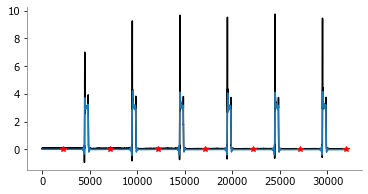

100mm trial3 []


C:\Program Files\Python36\lib\site-packages\scipy\io\matlab\mio.py:224: MatReadWarning: Duplicate variable name "None" in stream - replacing previous with new
Consider mio5.varmats_from_mat to split file into single variable files
  matfile_dict = MR.get_variables(variable_names)


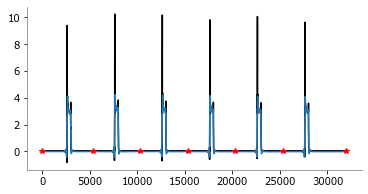

60mm trial6 []


C:\Program Files\Python36\lib\site-packages\scipy\io\matlab\mio.py:224: MatReadWarning: Duplicate variable name "None" in stream - replacing previous with new
Consider mio5.varmats_from_mat to split file into single variable files
  matfile_dict = MR.get_variables(variable_names)


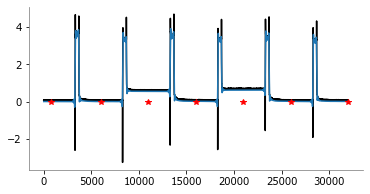

C:\Program Files\Python36\lib\site-packages\scipy\io\matlab\mio.py:224: MatReadWarning: Duplicate variable name "None" in stream - replacing previous with new
Consider mio5.varmats_from_mat to split file into single variable files
  matfile_dict = MR.get_variables(variable_names)


60mm trial7 []


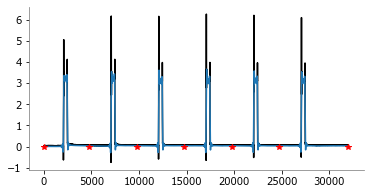

70mm trial1 []


C:\Program Files\Python36\lib\site-packages\scipy\io\matlab\mio.py:224: MatReadWarning: Duplicate variable name "None" in stream - replacing previous with new
Consider mio5.varmats_from_mat to split file into single variable files
  matfile_dict = MR.get_variables(variable_names)


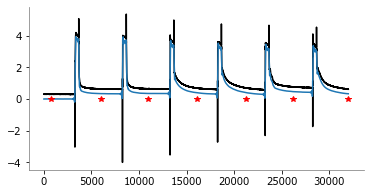

70mm trial3 []


C:\Program Files\Python36\lib\site-packages\scipy\io\matlab\mio.py:224: MatReadWarning: Duplicate variable name "None" in stream - replacing previous with new
Consider mio5.varmats_from_mat to split file into single variable files
  matfile_dict = MR.get_variables(variable_names)


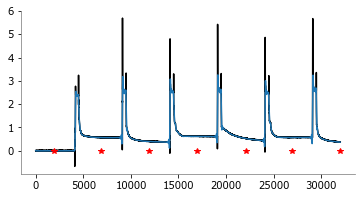

80mm trial1 []


C:\Program Files\Python36\lib\site-packages\scipy\io\matlab\mio.py:224: MatReadWarning: Duplicate variable name "None" in stream - replacing previous with new
Consider mio5.varmats_from_mat to split file into single variable files
  matfile_dict = MR.get_variables(variable_names)


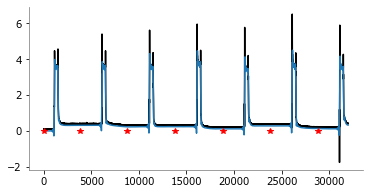

80mm trial2 []


C:\Program Files\Python36\lib\site-packages\scipy\io\matlab\mio.py:224: MatReadWarning: Duplicate variable name "None" in stream - replacing previous with new
Consider mio5.varmats_from_mat to split file into single variable files
  matfile_dict = MR.get_variables(variable_names)


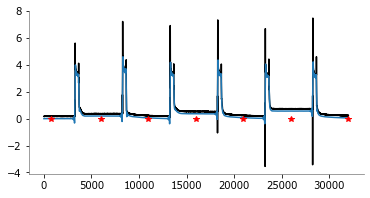

90mm trial1 ['Sil']


C:\Program Files\Python36\lib\site-packages\scipy\io\matlab\mio.py:224: MatReadWarning: Duplicate variable name "None" in stream - replacing previous with new
Consider mio5.varmats_from_mat to split file into single variable files
  matfile_dict = MR.get_variables(variable_names)


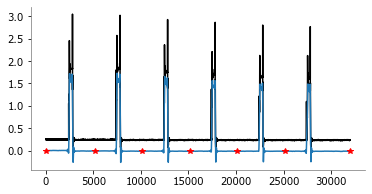

C:\Program Files\Python36\lib\site-packages\scipy\io\matlab\mio.py:224: MatReadWarning: Duplicate variable name "None" in stream - replacing previous with new
Consider mio5.varmats_from_mat to split file into single variable files
  matfile_dict = MR.get_variables(variable_names)


90mm trial2 ['Sil']


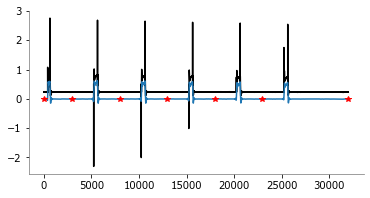

Label  TubeLength_mm  PulseFreq_Hz  Trial  \
0    100mm          100.0           0.2    2.0   
1    100mm          100.0           0.2    3.0   
2     60mm           60.0           0.2    6.0   
3     60mm           60.0           0.2    7.0   
4     70mm           70.0           0.2    1.0   
5     70mm           70.0           0.2    3.0   
6     80mm           80.0           0.2    1.0   
7     80mm           80.0           0.2    2.0   
8  90mmSil           90.0           0.2    1.0   
9  90mmSil           90.0           0.2    2.0   

                                                Data  
0  [[[-0.013465677606923387, 0.017823816986597178...  
1  [[[0.0035437559192981376, 0.007604713071787813...  
2  [[[-0.010063859313519406, -0.02449411804092525...  
3  [[[0.005581551374555412, 0.0013923778184132232...  
4  [[[0.014183850558607759, 0.03585644756777396, ...  
5  [[[0.0024877610683357075, 0.008070545656167053...  
6  [[[0.0036006498977469367, 0.020429745419758723...  
7  [[[-0.014924057883011594, 0.010518020611392717...  
8  [[[0.0192367679898631, 0.03200660937602391, -0...  
9  [[[0.02840955268605521, 0.03192124381637425, -...

In [3]:
'''
Load, preprocess and segment force sensor data
'''

measureDataPath = './NanoData20220815'

Fs = 1000 # Sampling frequency of the Nano sensor is set to be 1000 Hz by default

nanoData = []

''' Data preprocess and segmentation '''
for root, directories, files in walk(measureDataPath):
    for fileName in files:
        tubeLen = decodeData(fileName, '\d+', rearCode='mm')
        pulseFreq = decodeData(fileName, '[\d+\.]*\d+', rearCode='mHz')  
        trialNum = decodeData(fileName, '\d+', frontCode='try')
        isSilInsulated = re.findall('Sil', fileName)
        data = []
        
        infoStr = "%dmm trial%d %s" % (tubeLen, trialNum, isSilInsulated)
        print(infoStr)
        
        dLabel = "%dmm" % tubeLen
        if isSilInsulated:
            dLabel = dLabel + "Sil"
        
        matData = scio.loadmat(ospa.join(root, fileName))
        if matData:
            forceData = matData['forceNano']
            
            cutInd = cutRepeatTrial(forceData, Fs, 6, disp=True)
            segNum = len(cutInd)-1
            
            if segNum > 0: 
                for j in range(segNum):
                    segData = forceData[cutInd[j]:cutInd[j+1],:]
                    data.append(segData)  
        
        nanoData.append([dLabel, tubeLen, pulseFreq/1000, trialNum, data])

nanoData = pd.DataFrame(nanoData, columns = ['Label', 'TubeLength_mm','PulseFreq_Hz','Trial','Data'])  

nanoData.head(10)

['100mm' '60mm' '70mm' '80mm' '90mmSil']


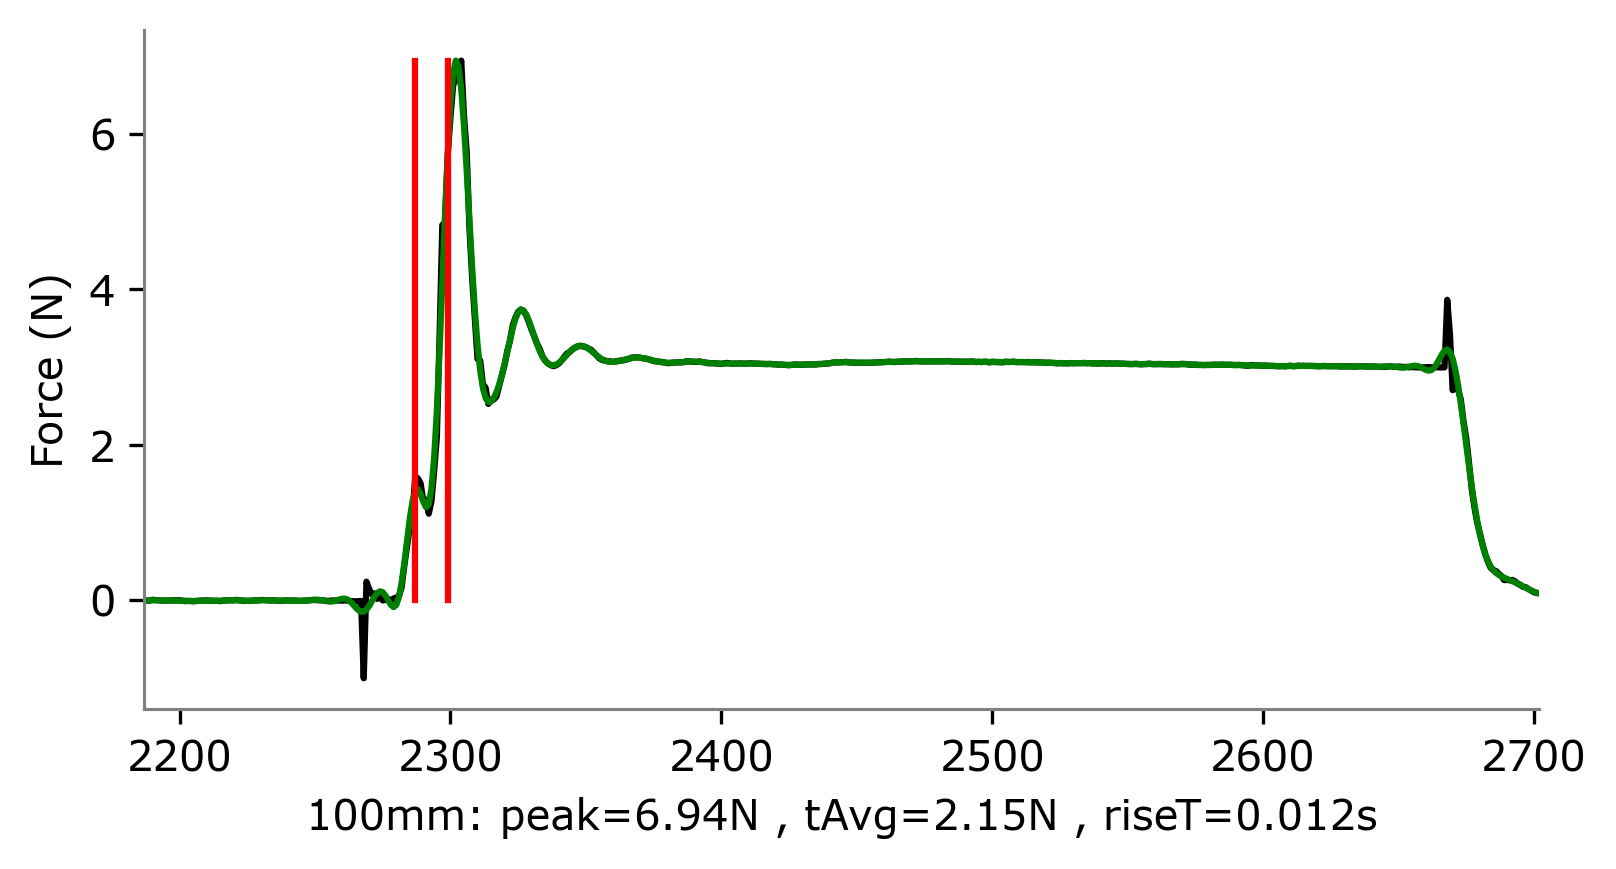

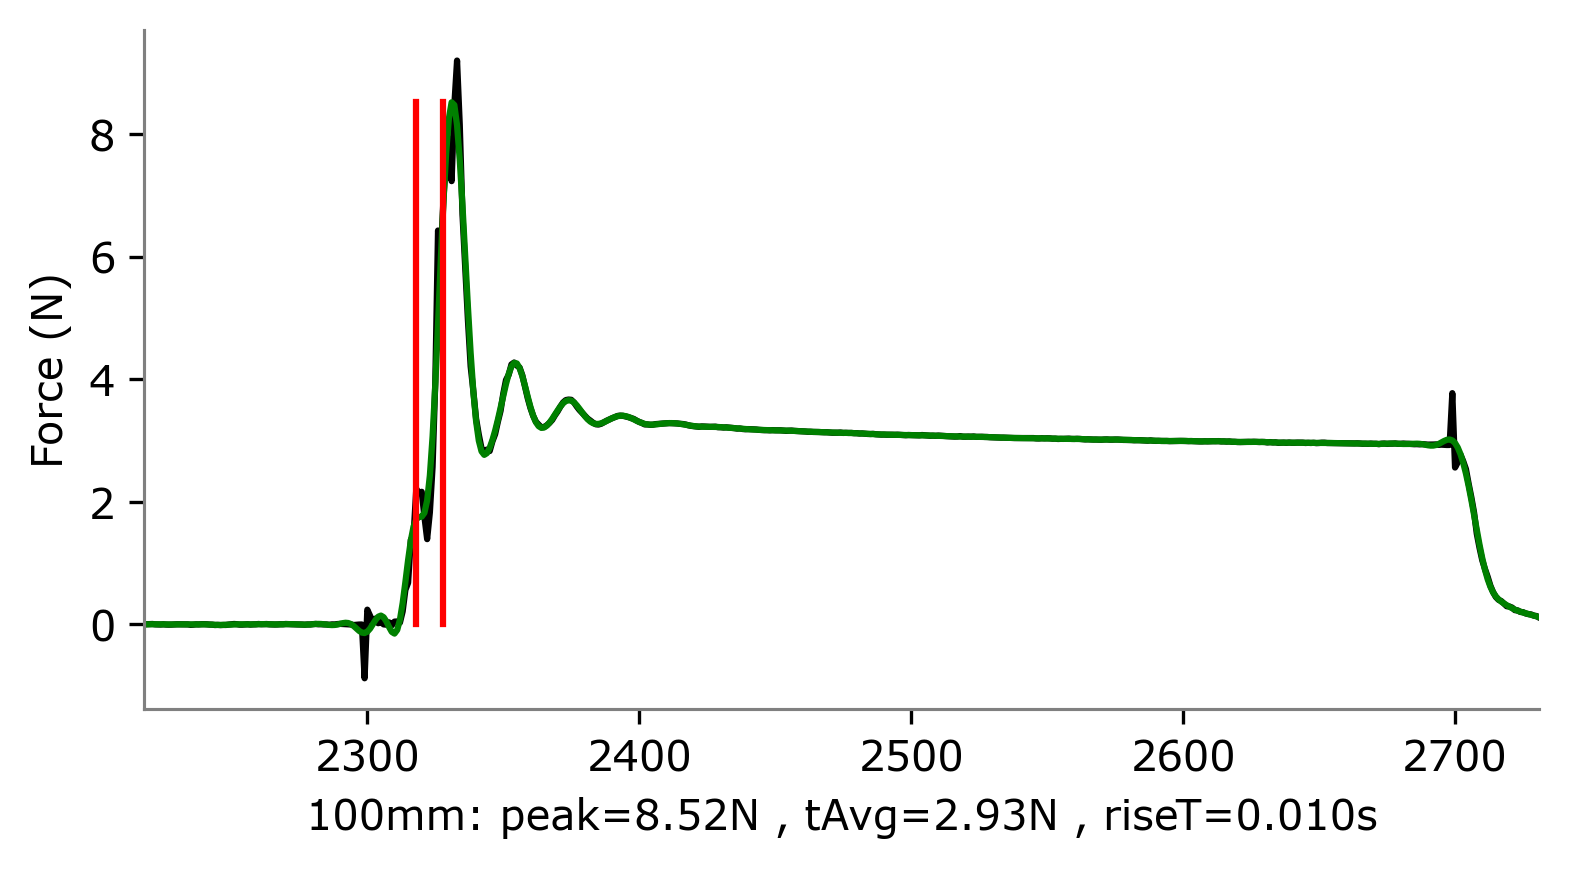

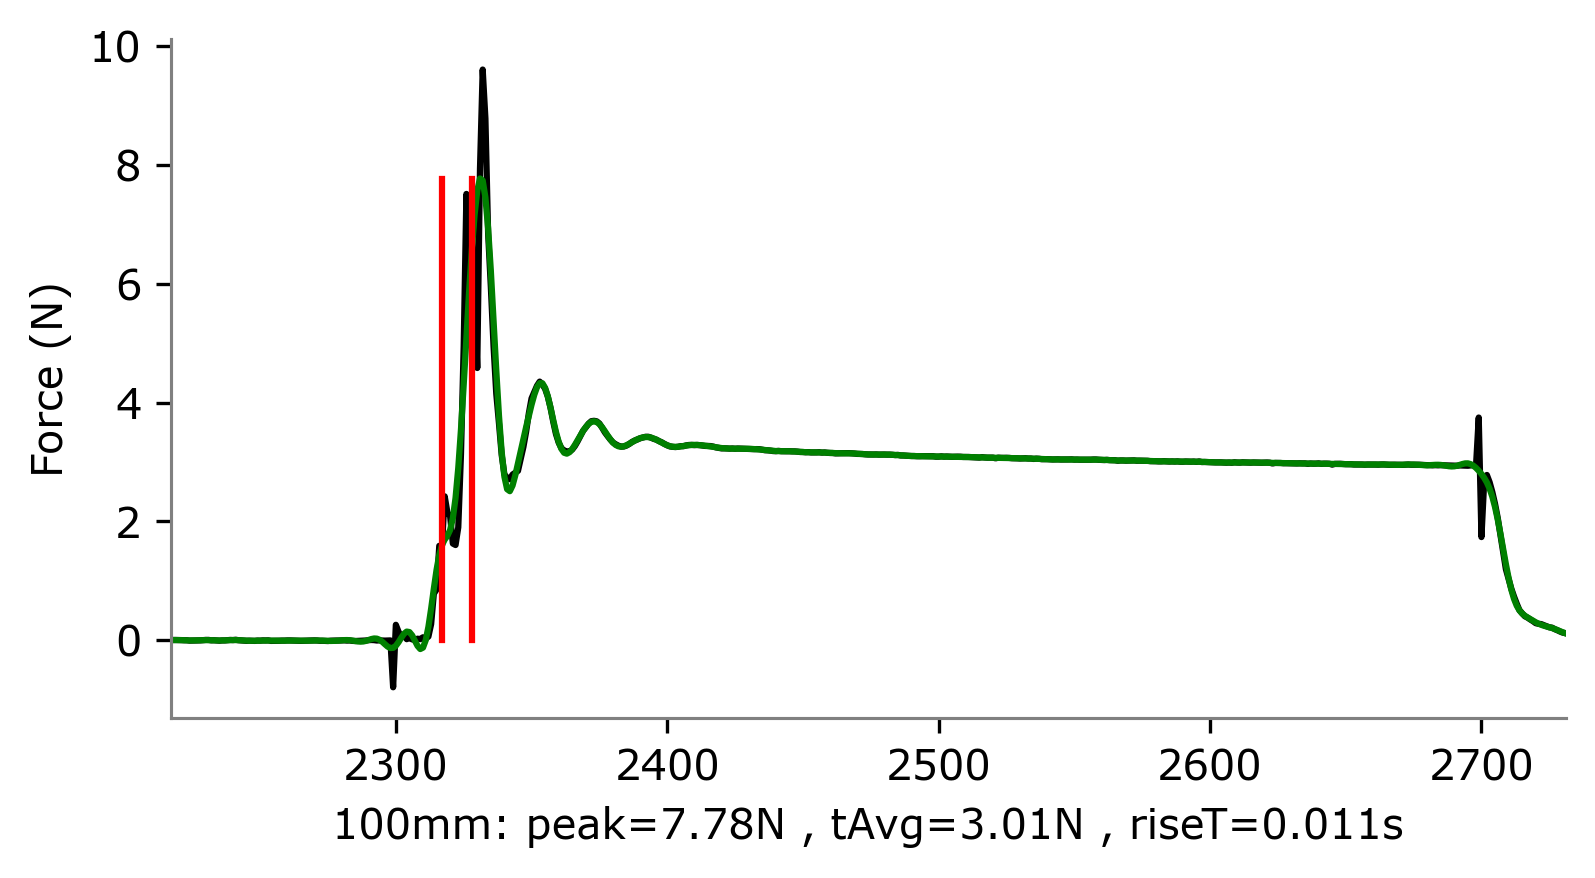

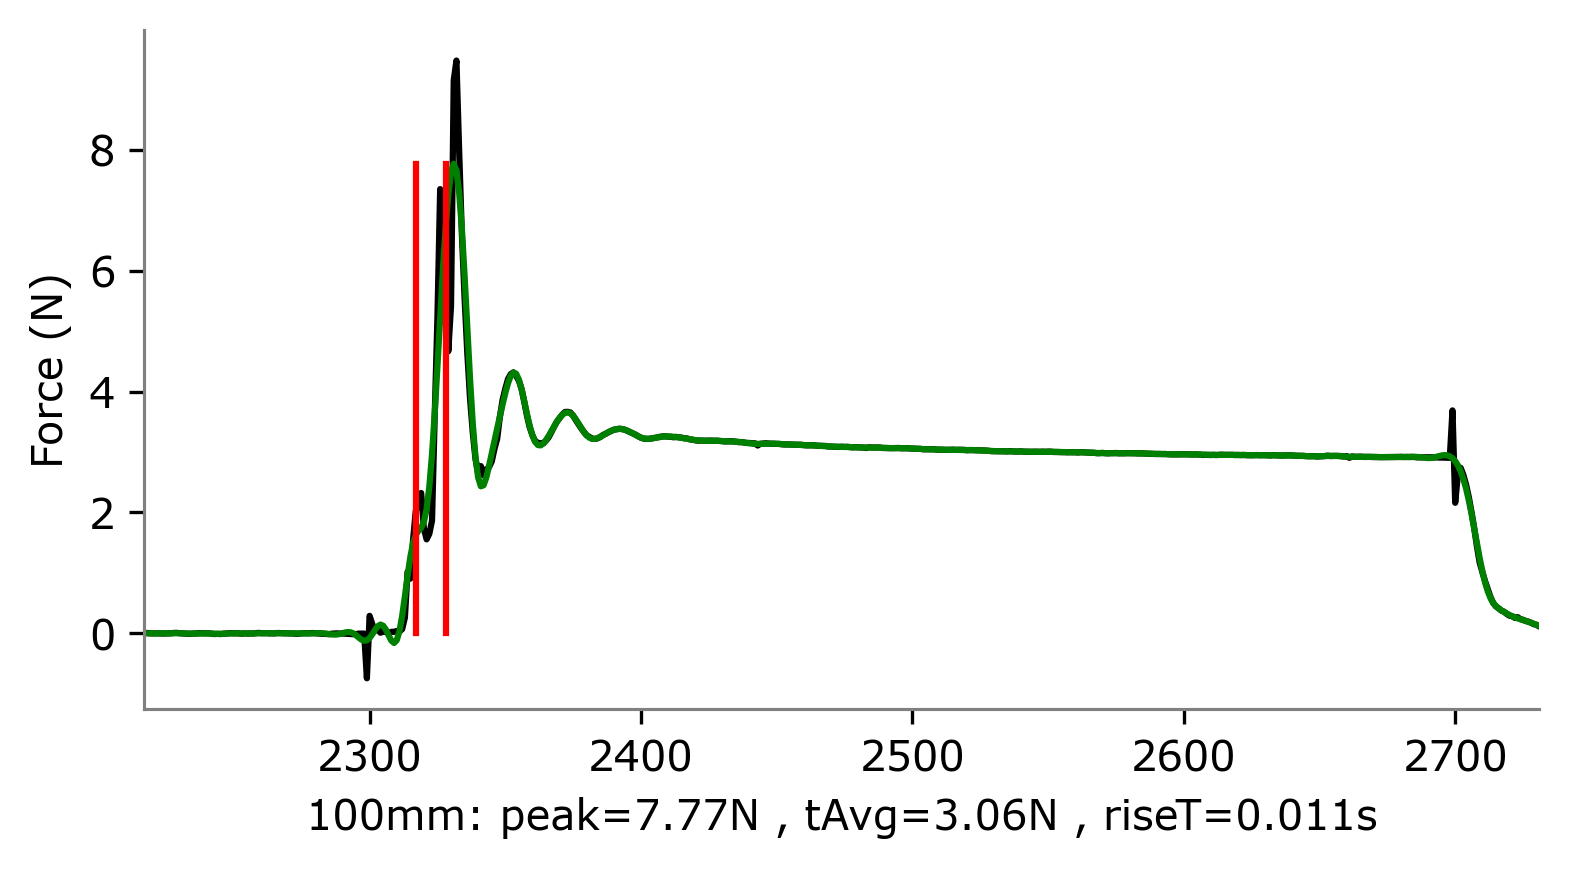

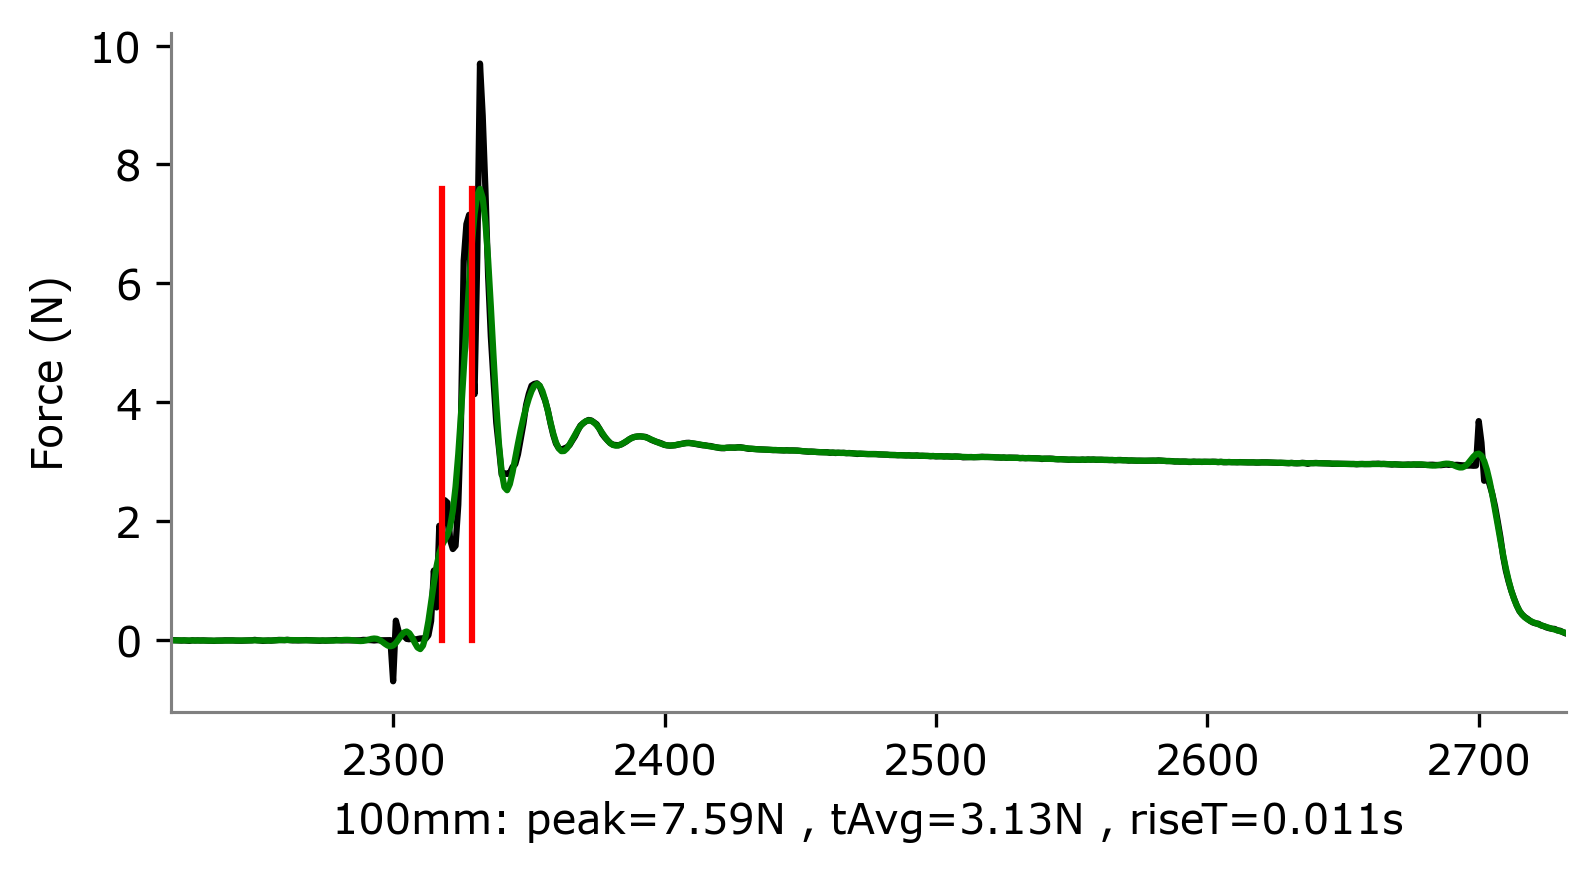

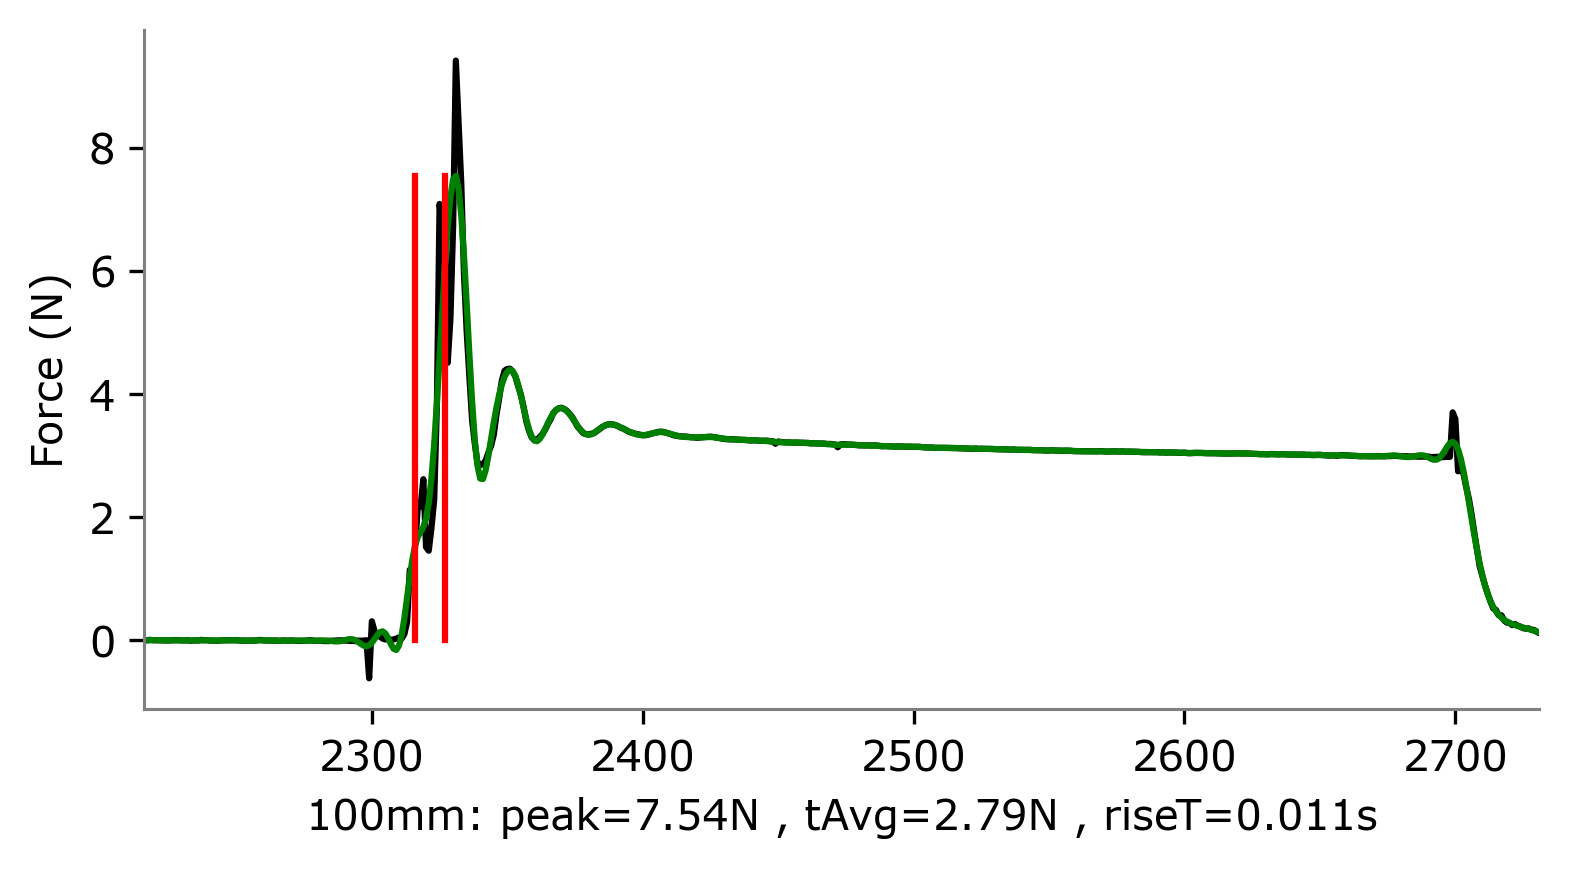

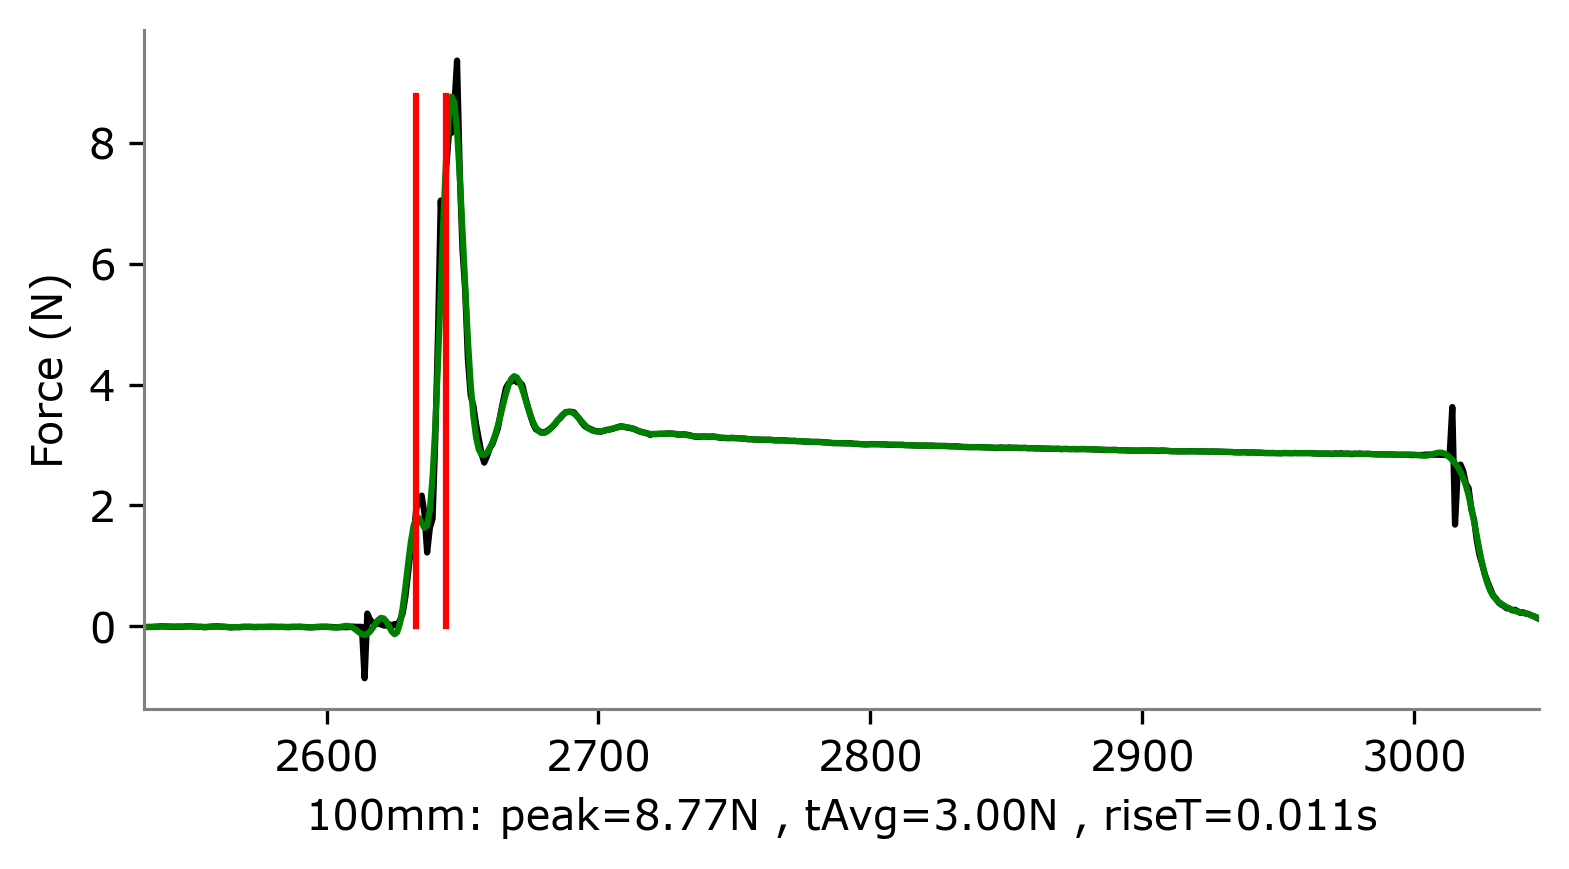

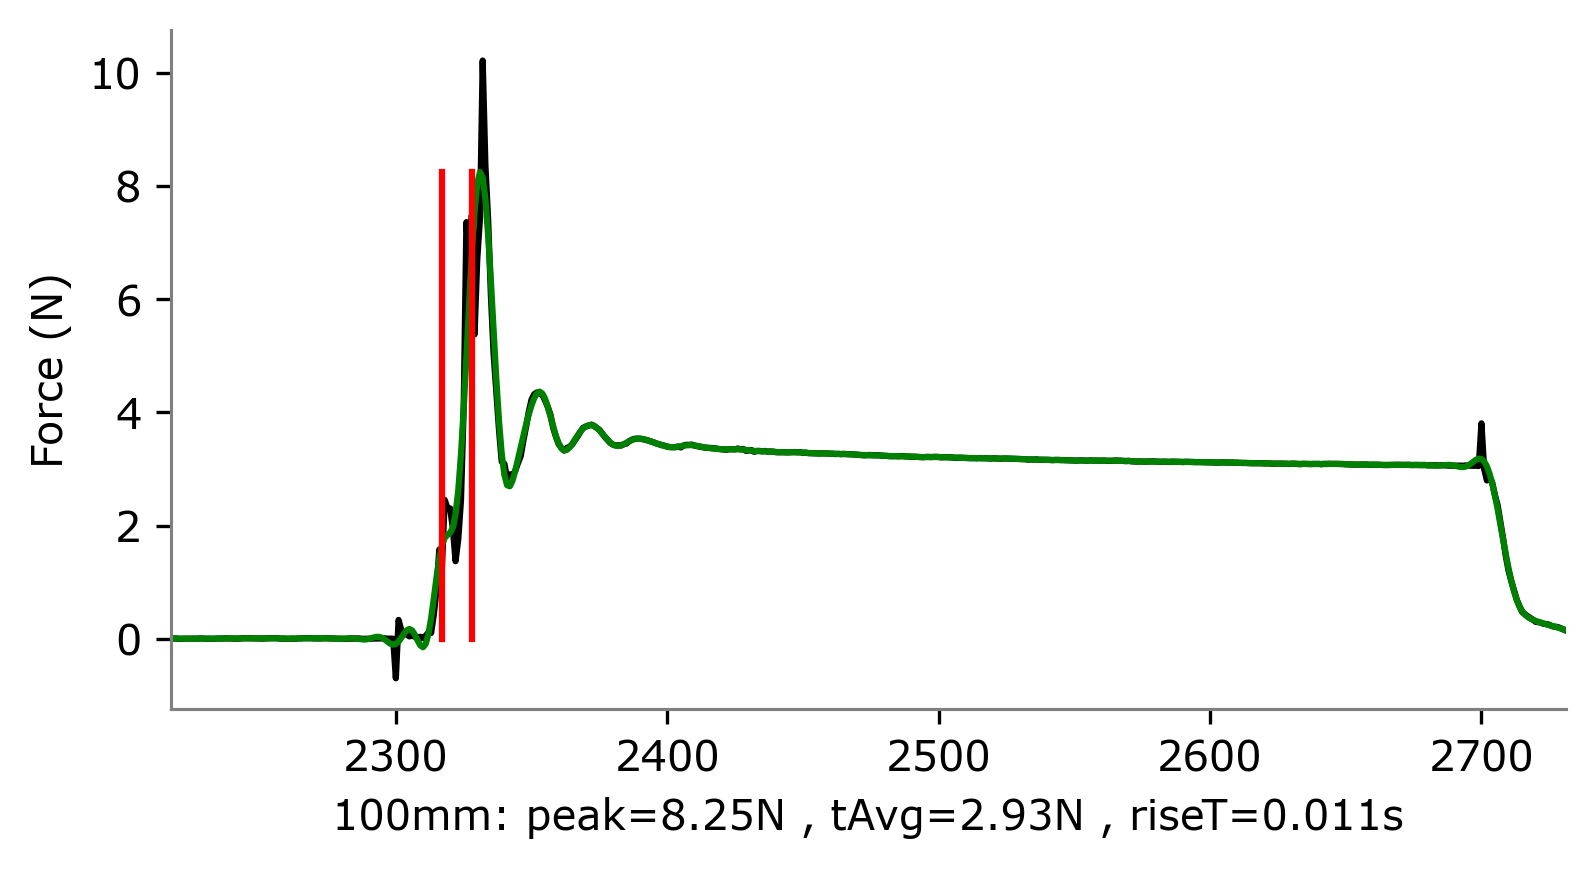

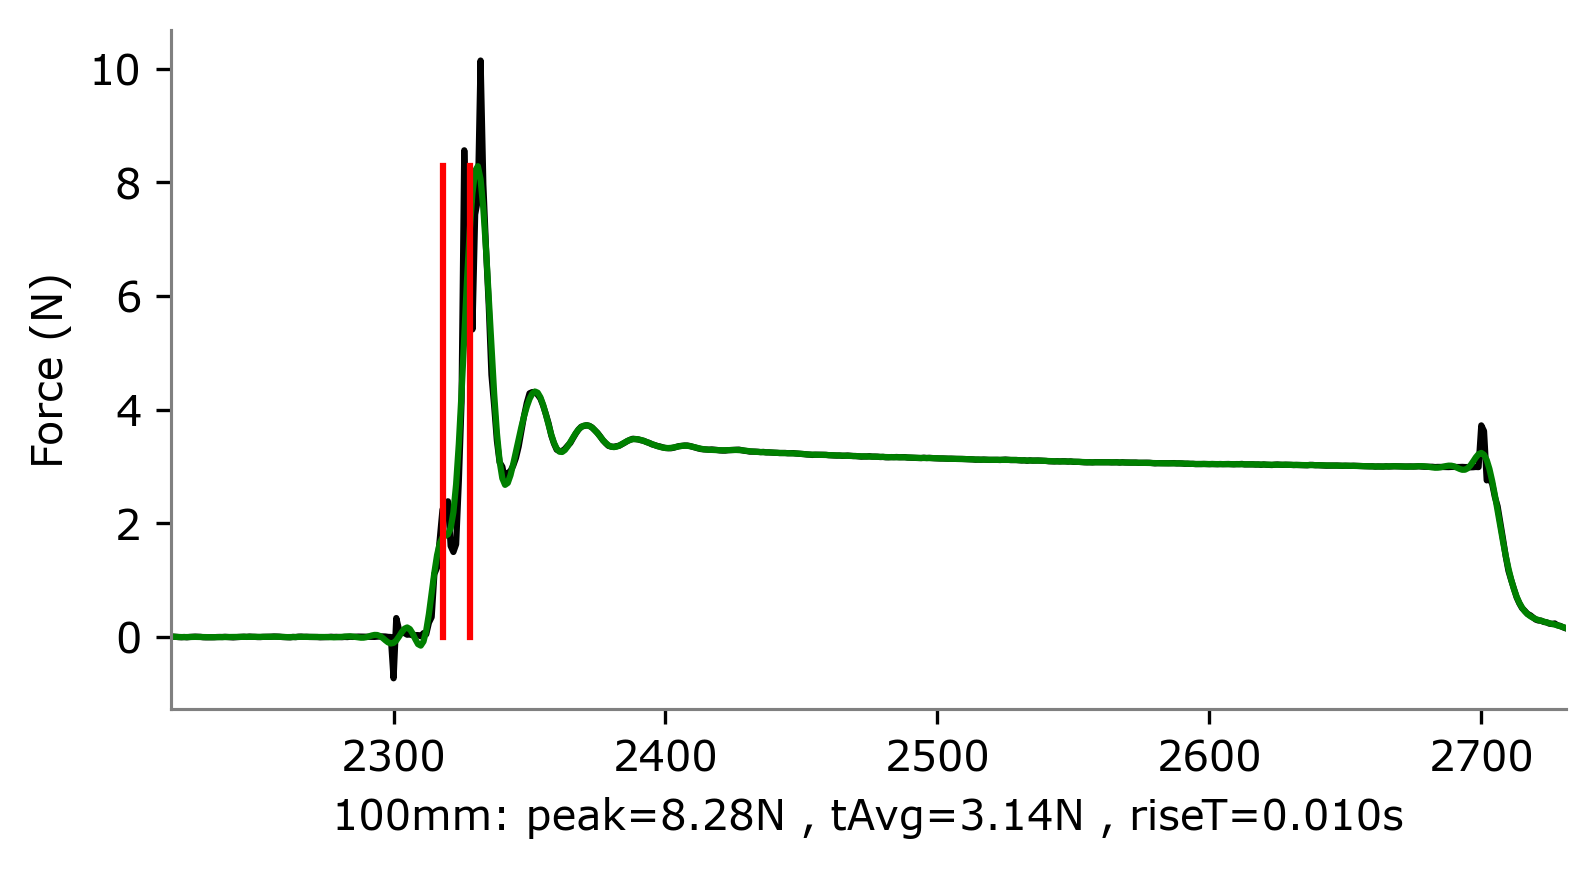

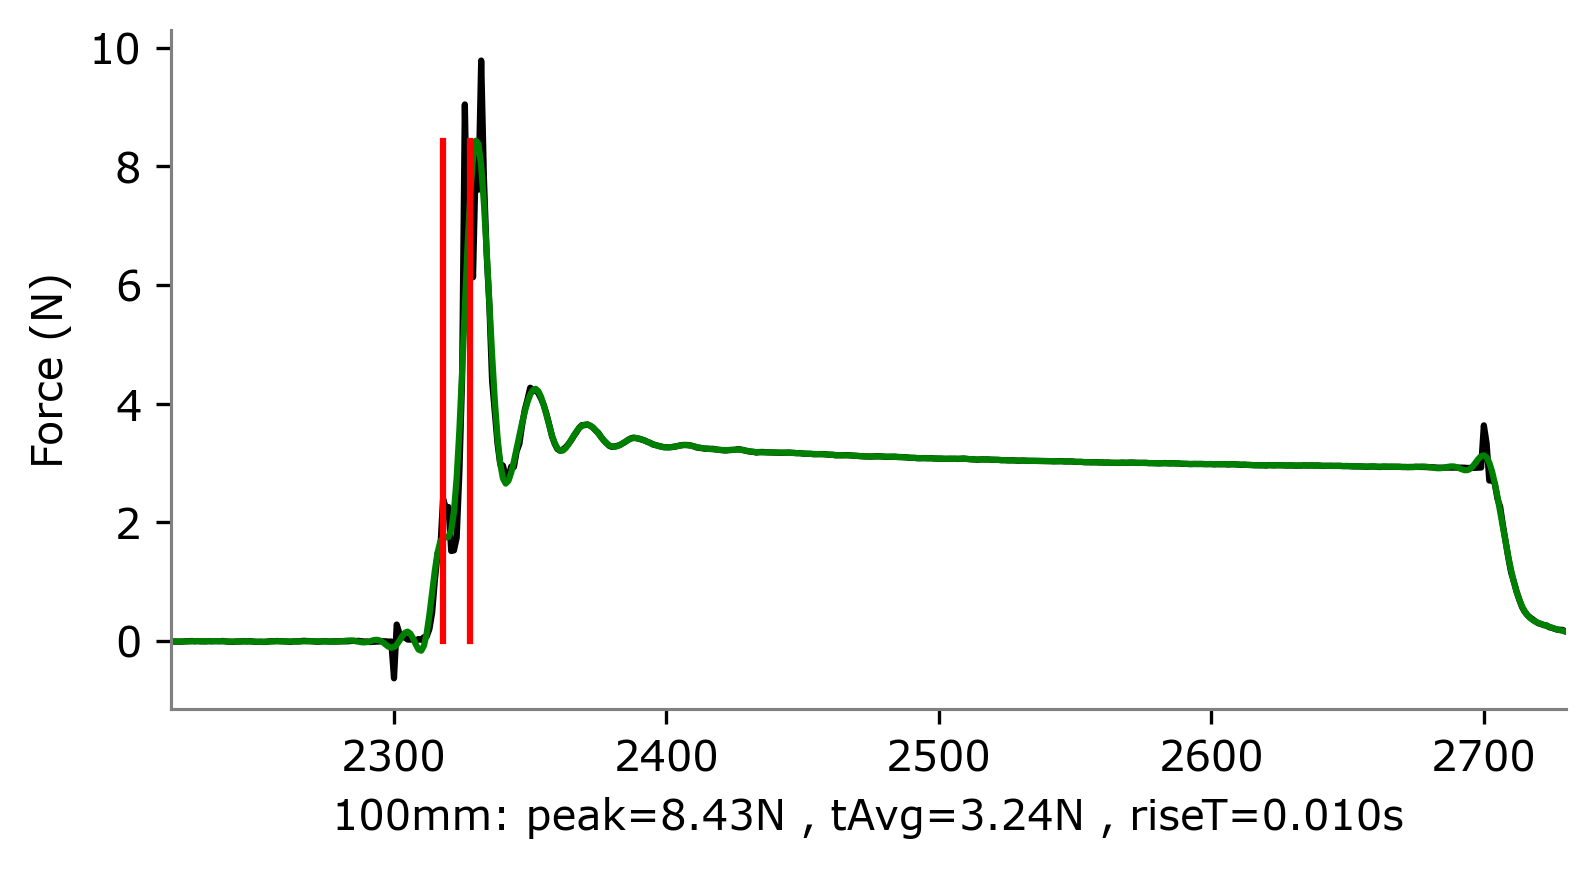

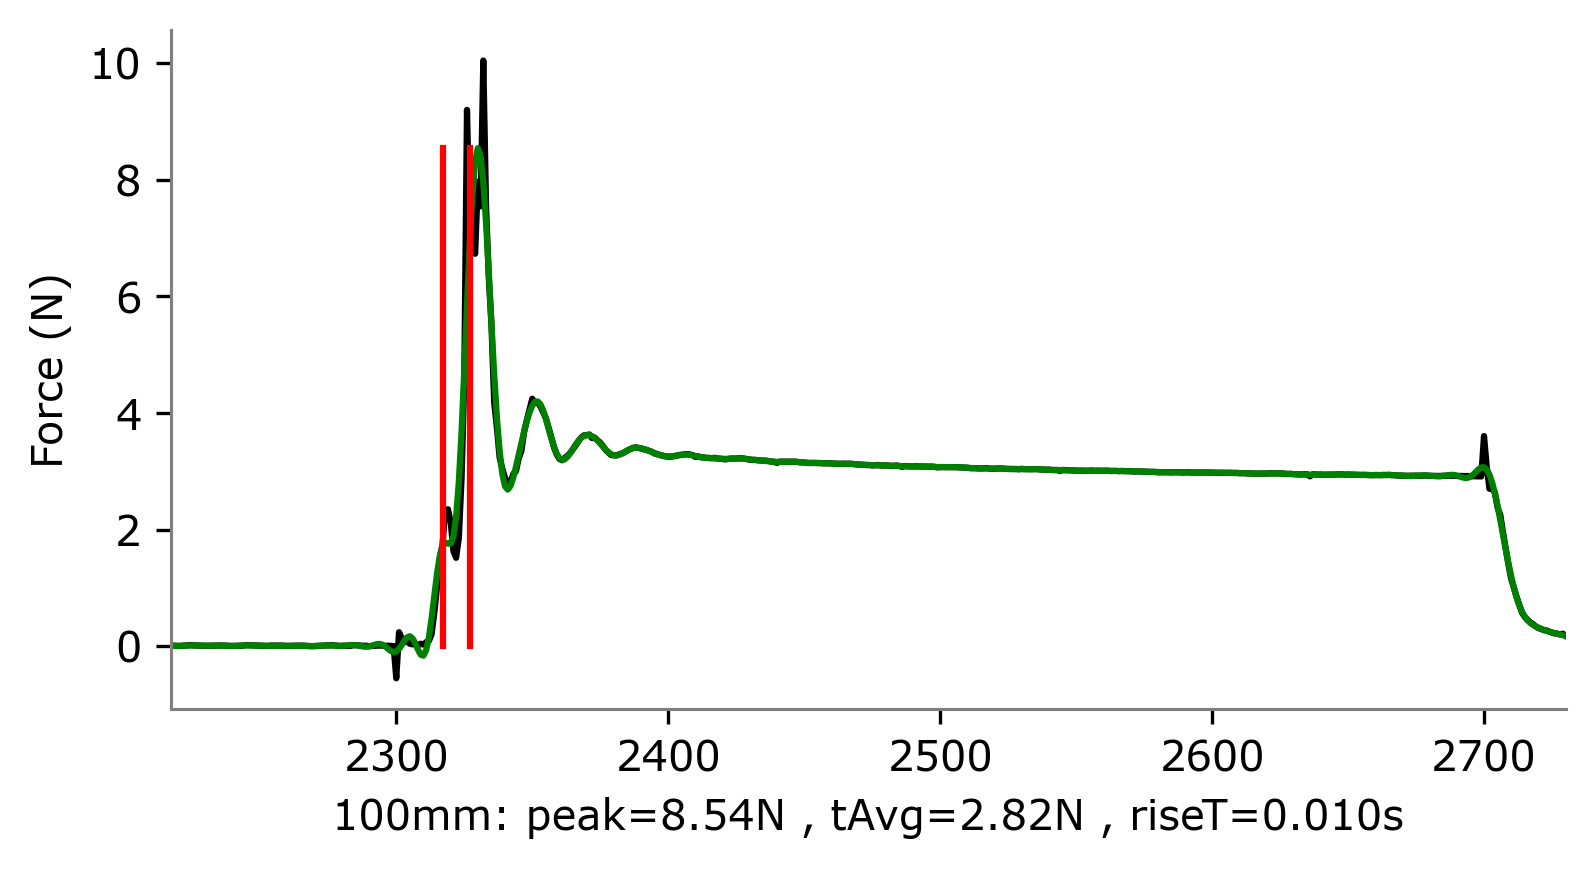

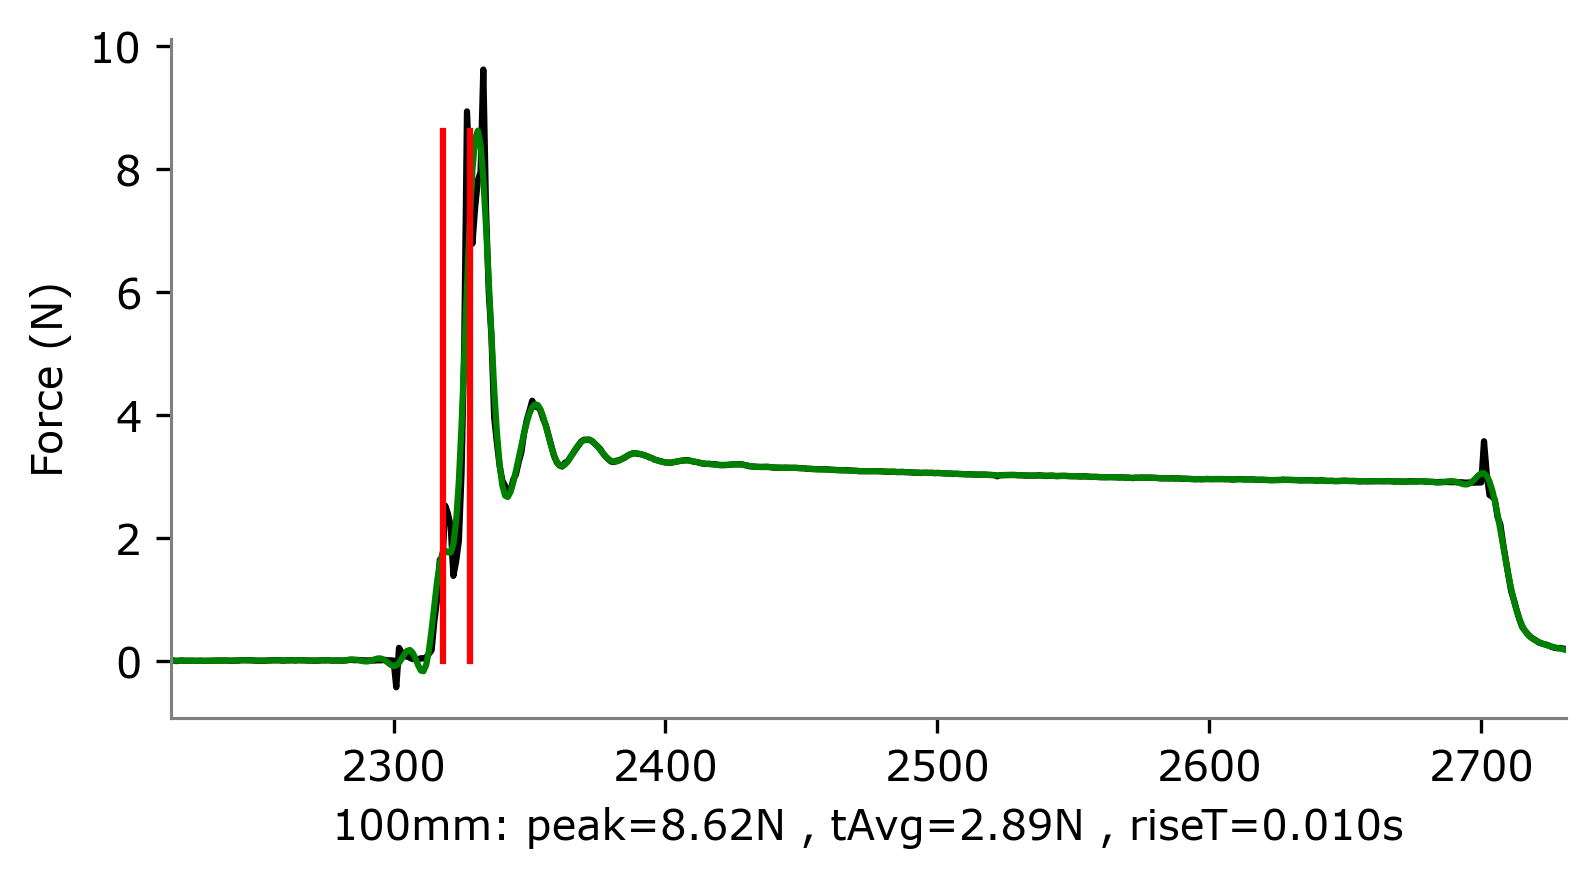

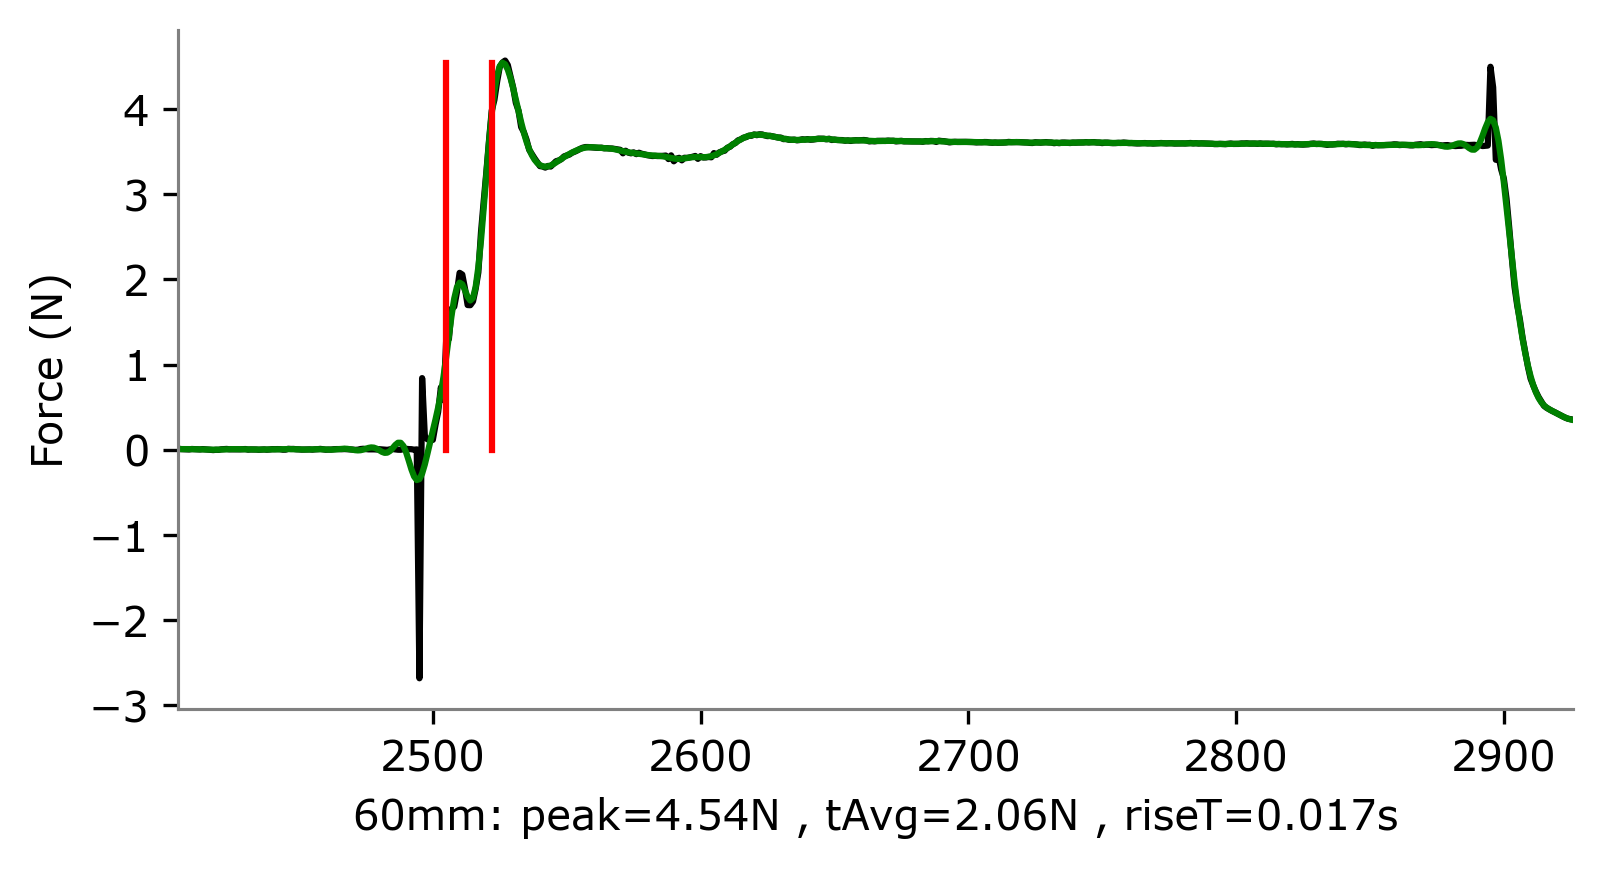

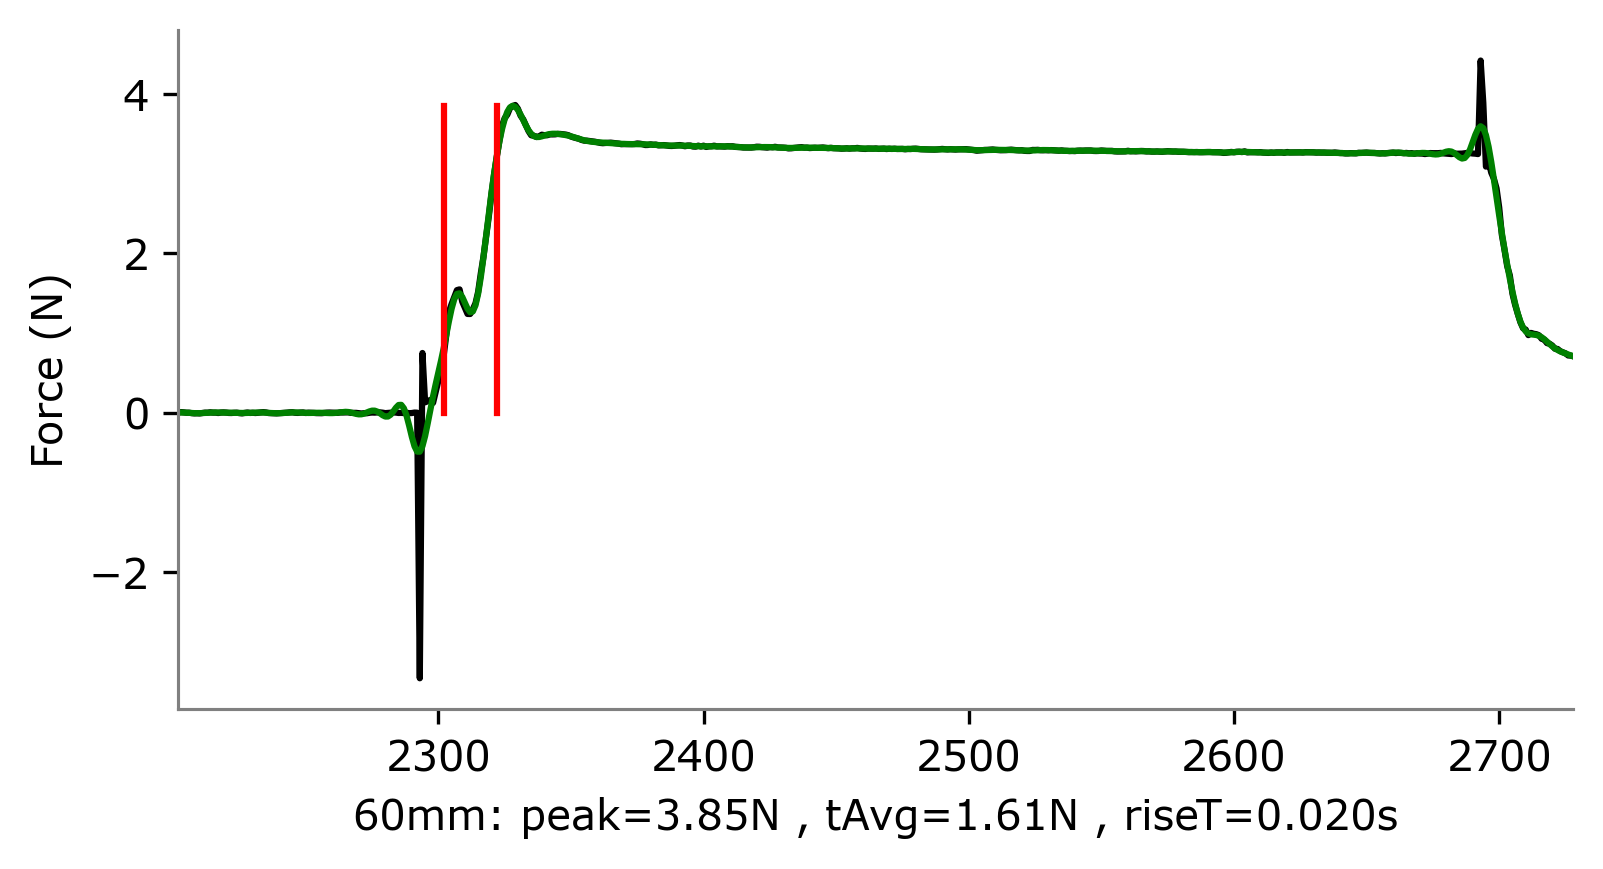

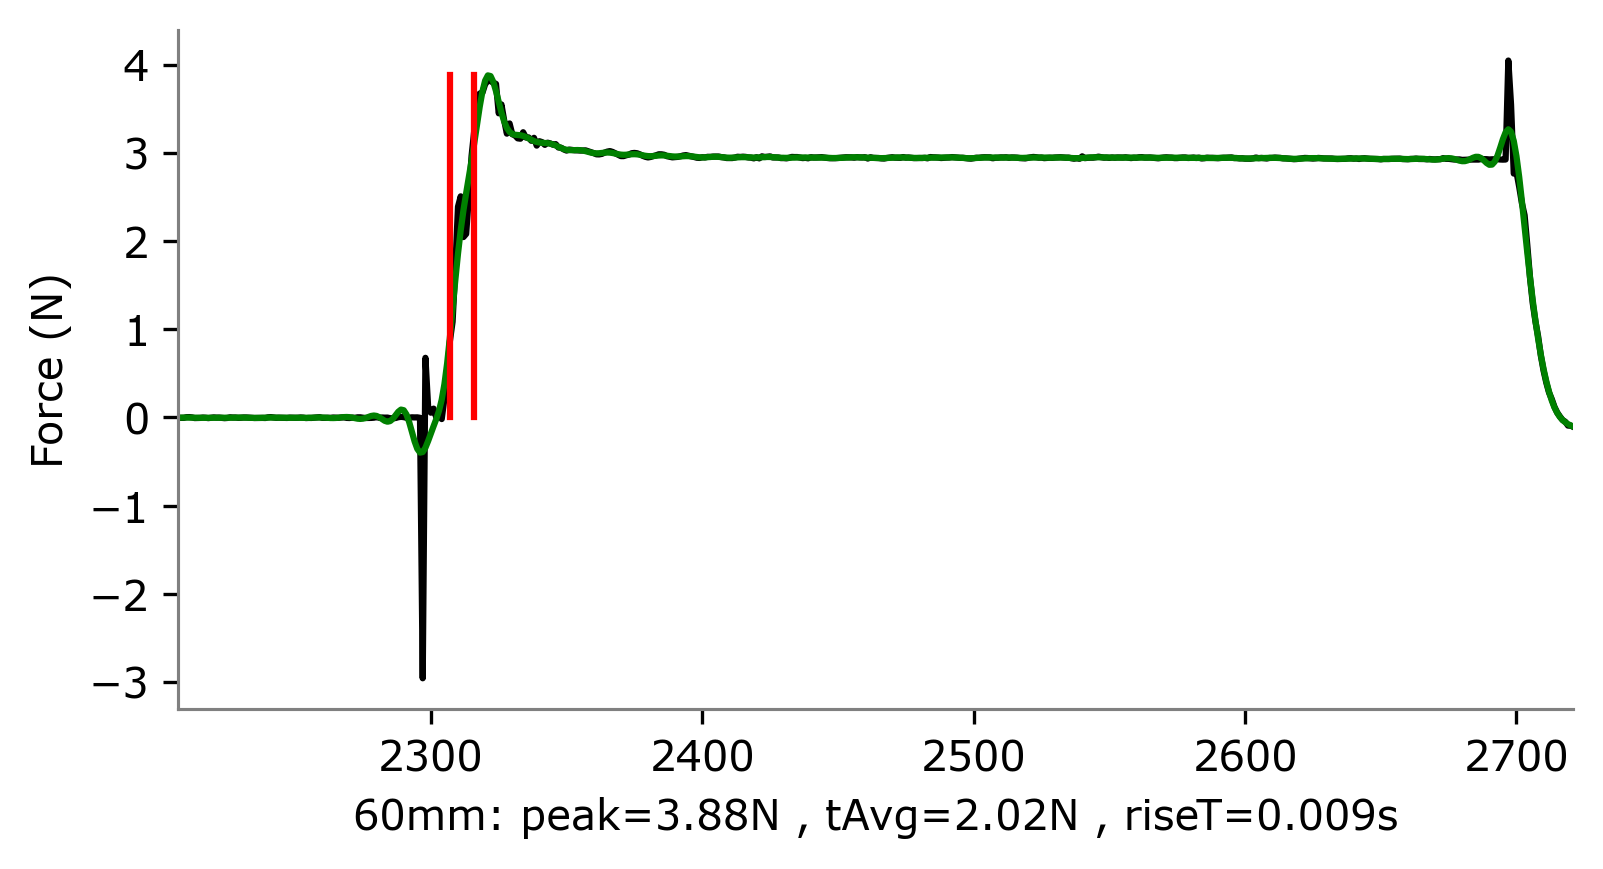

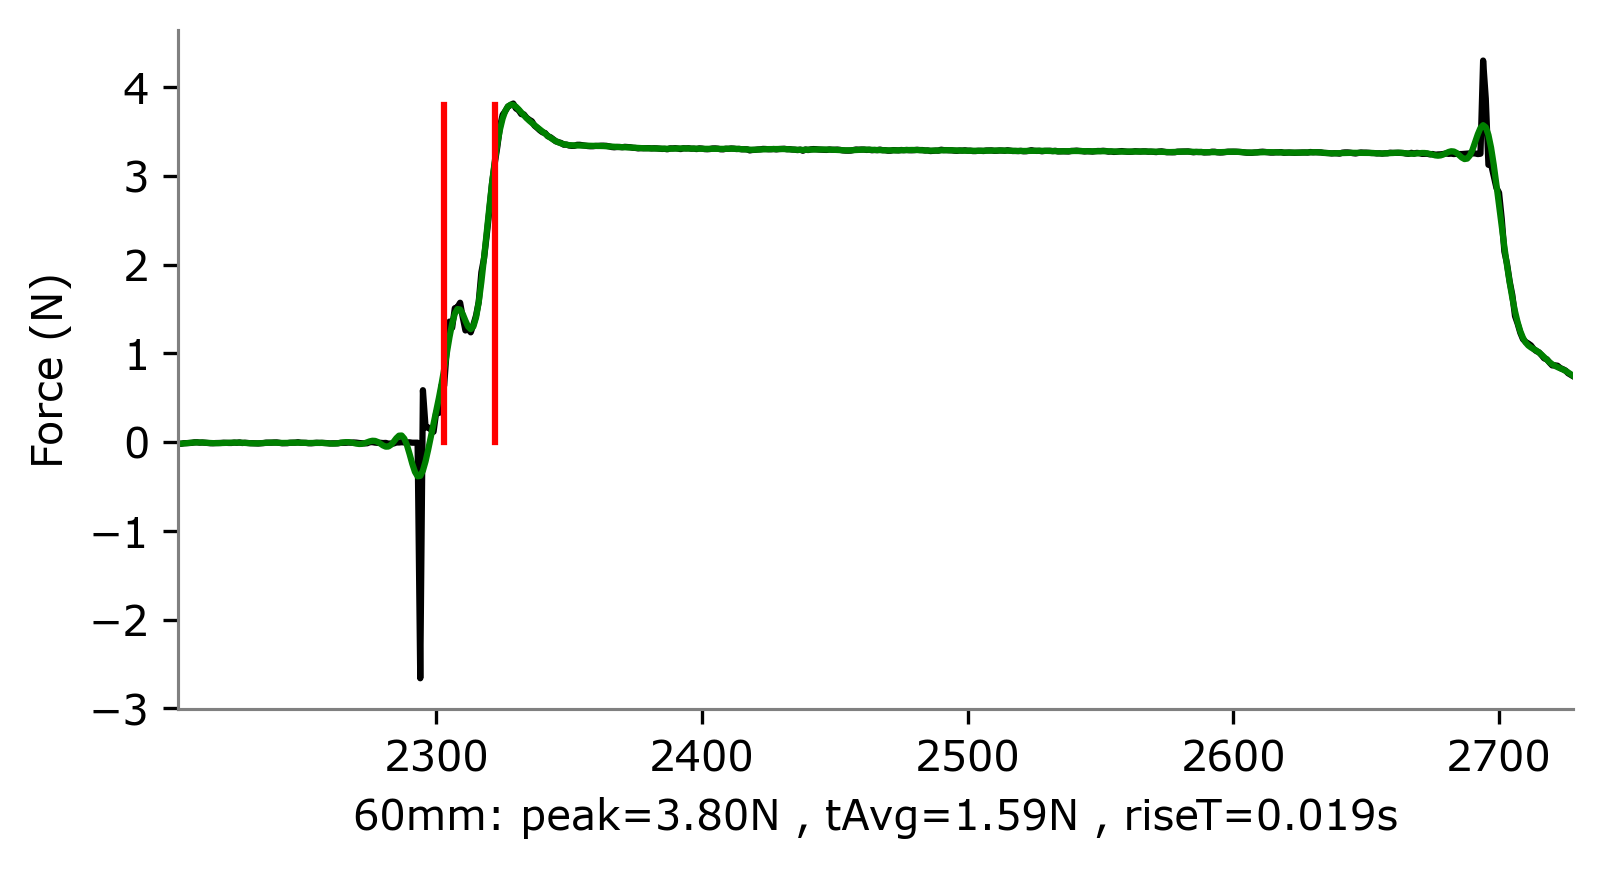

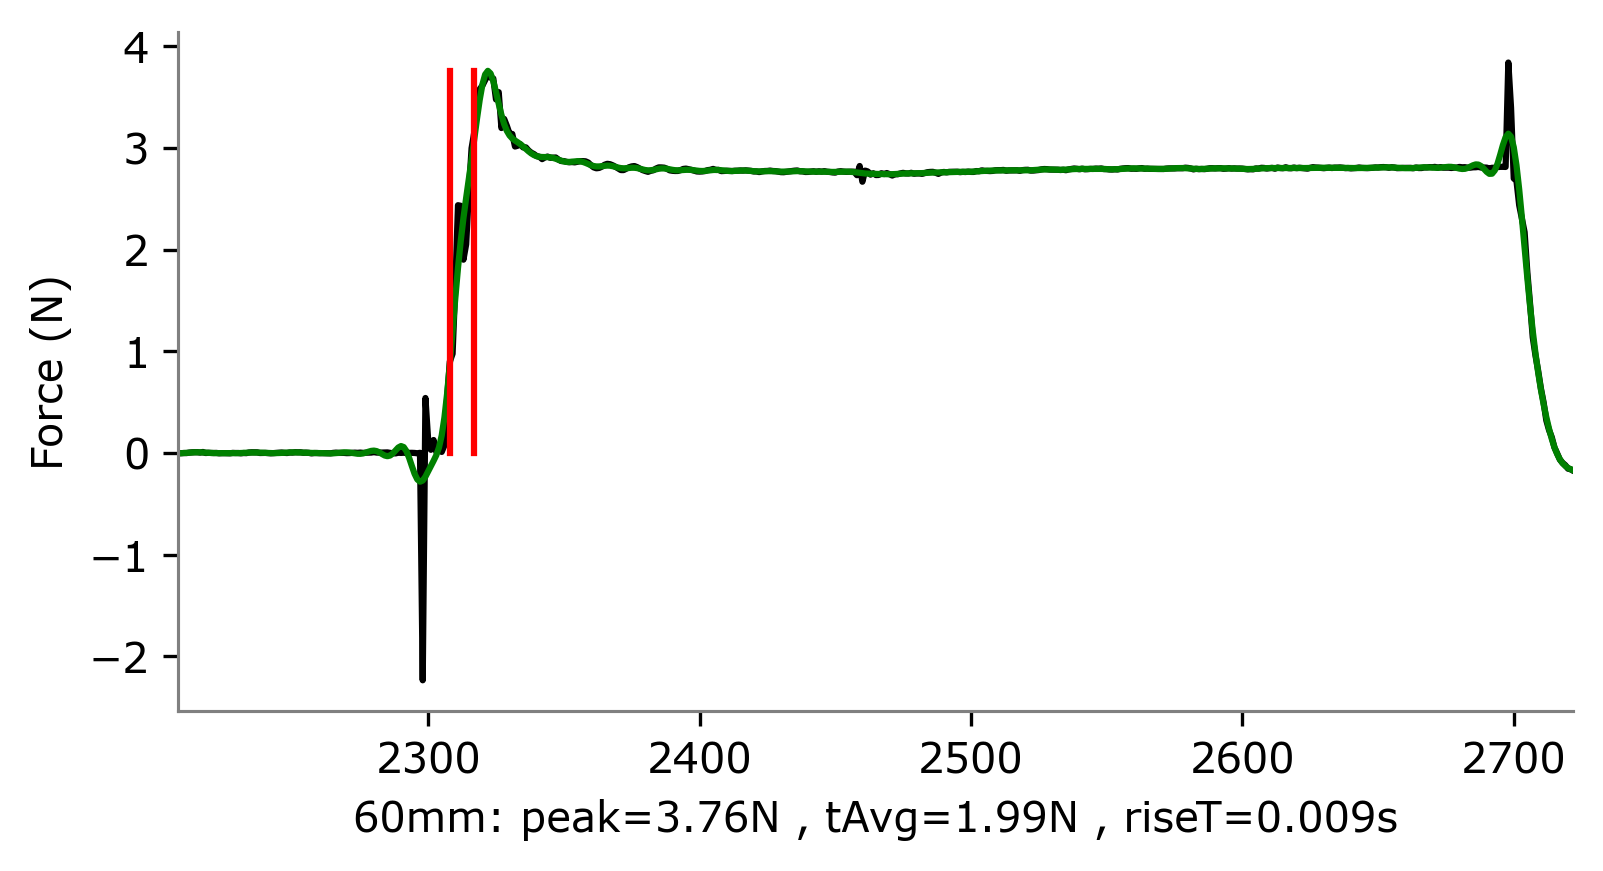

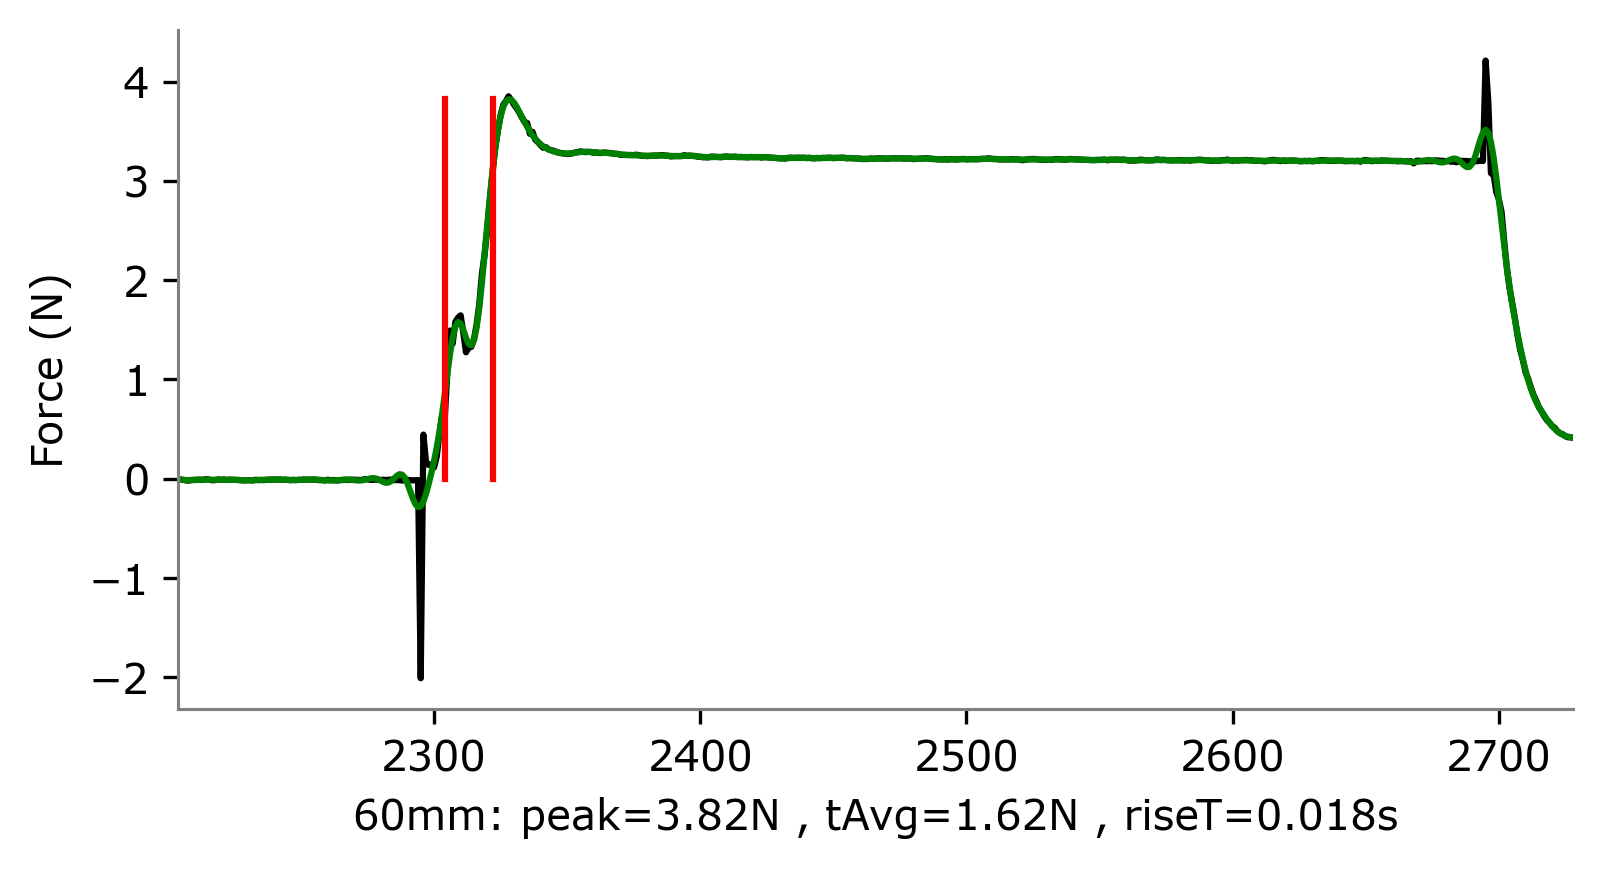

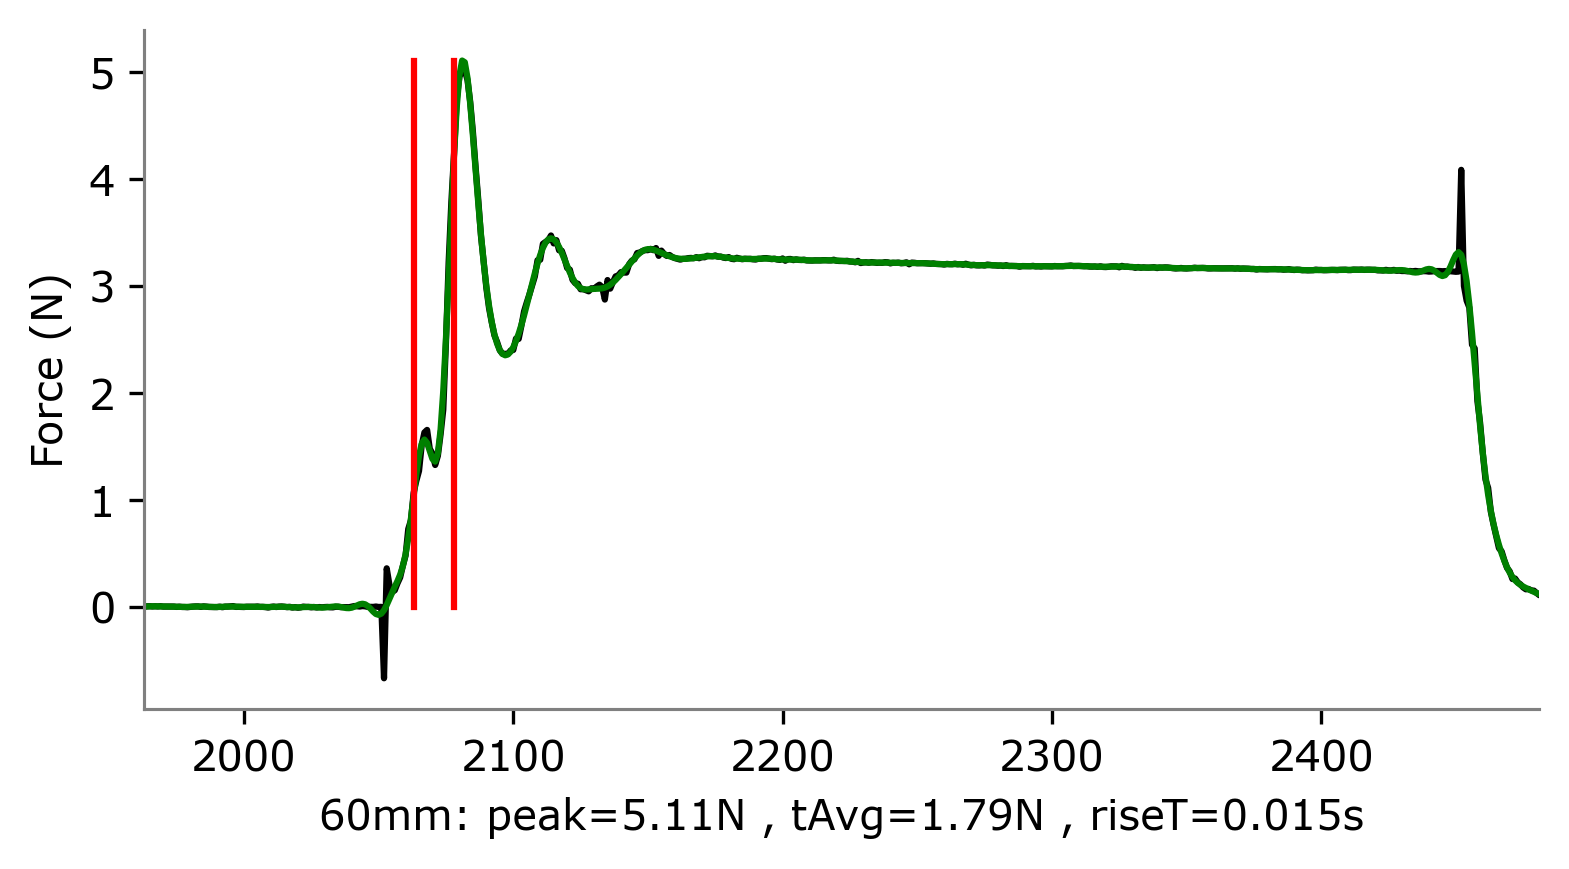

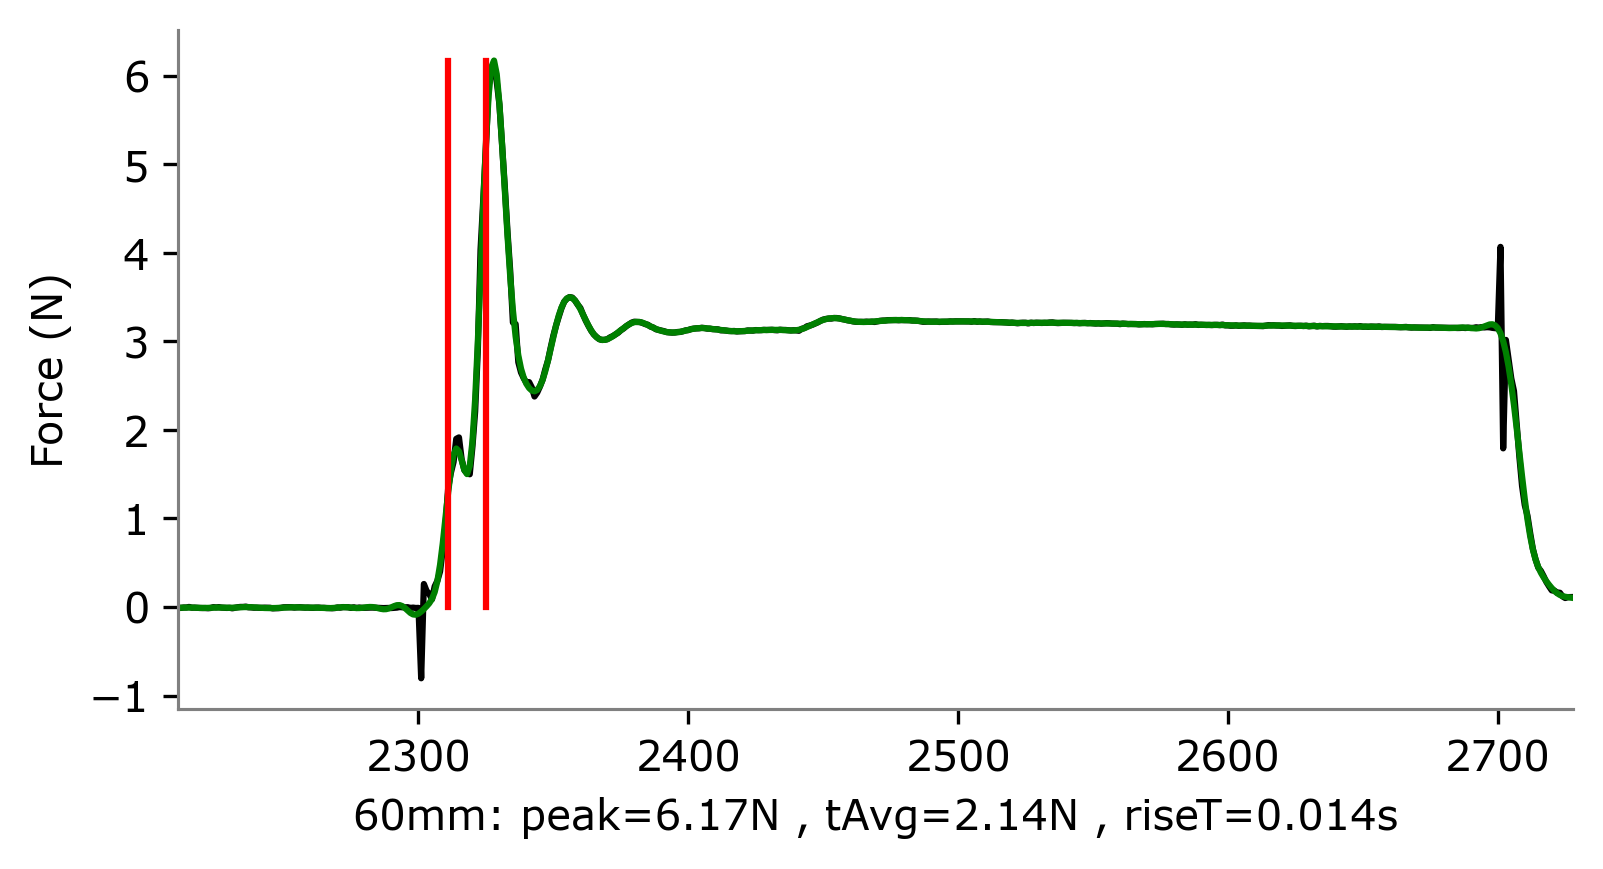

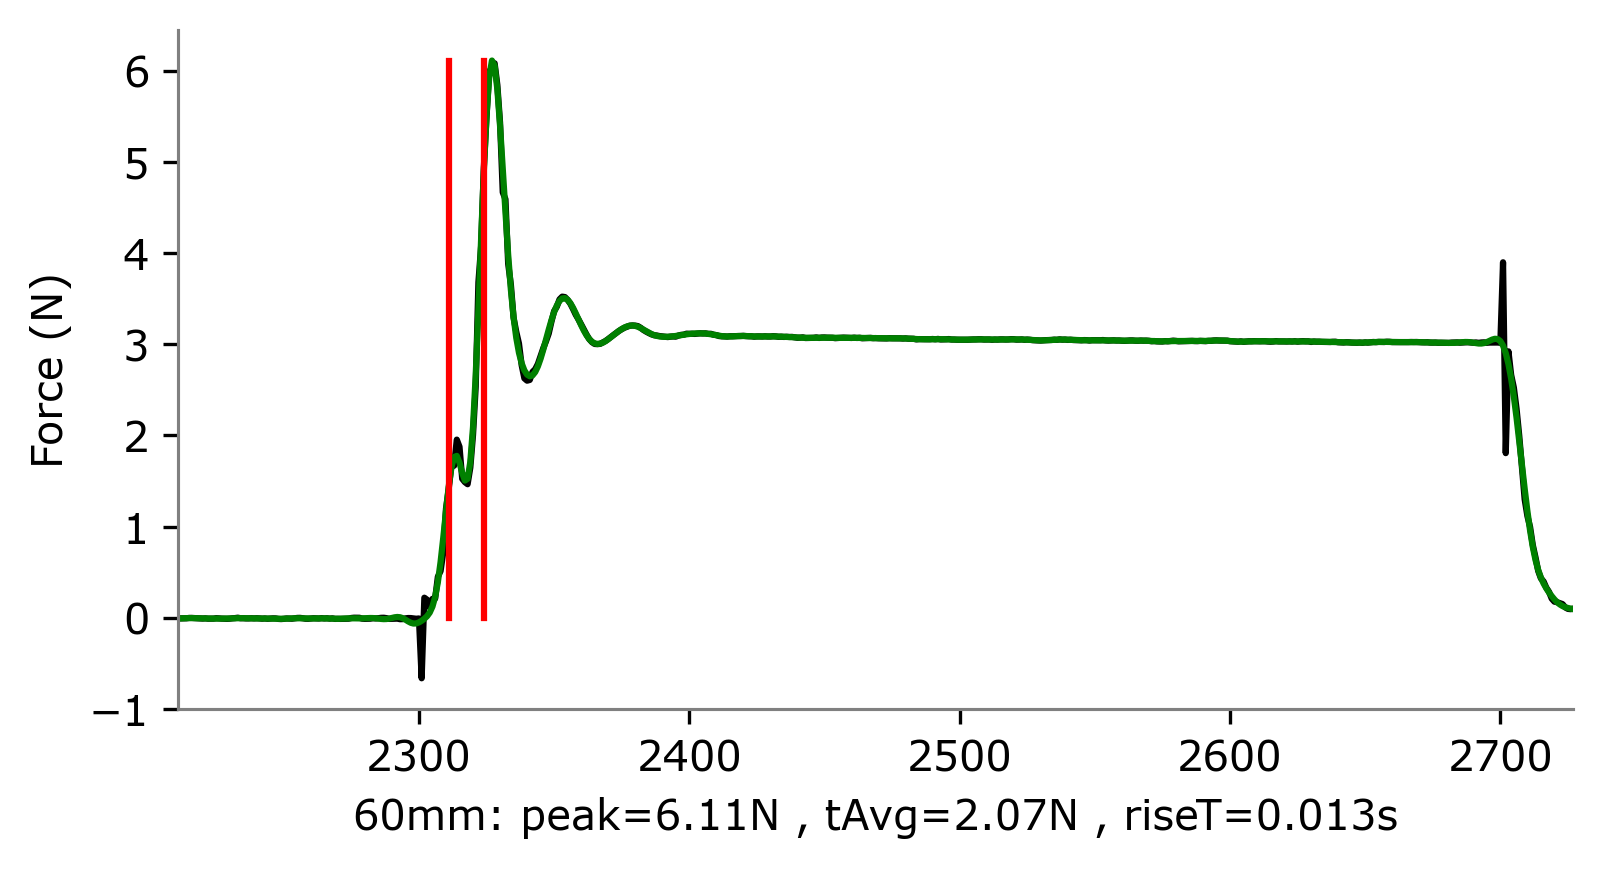

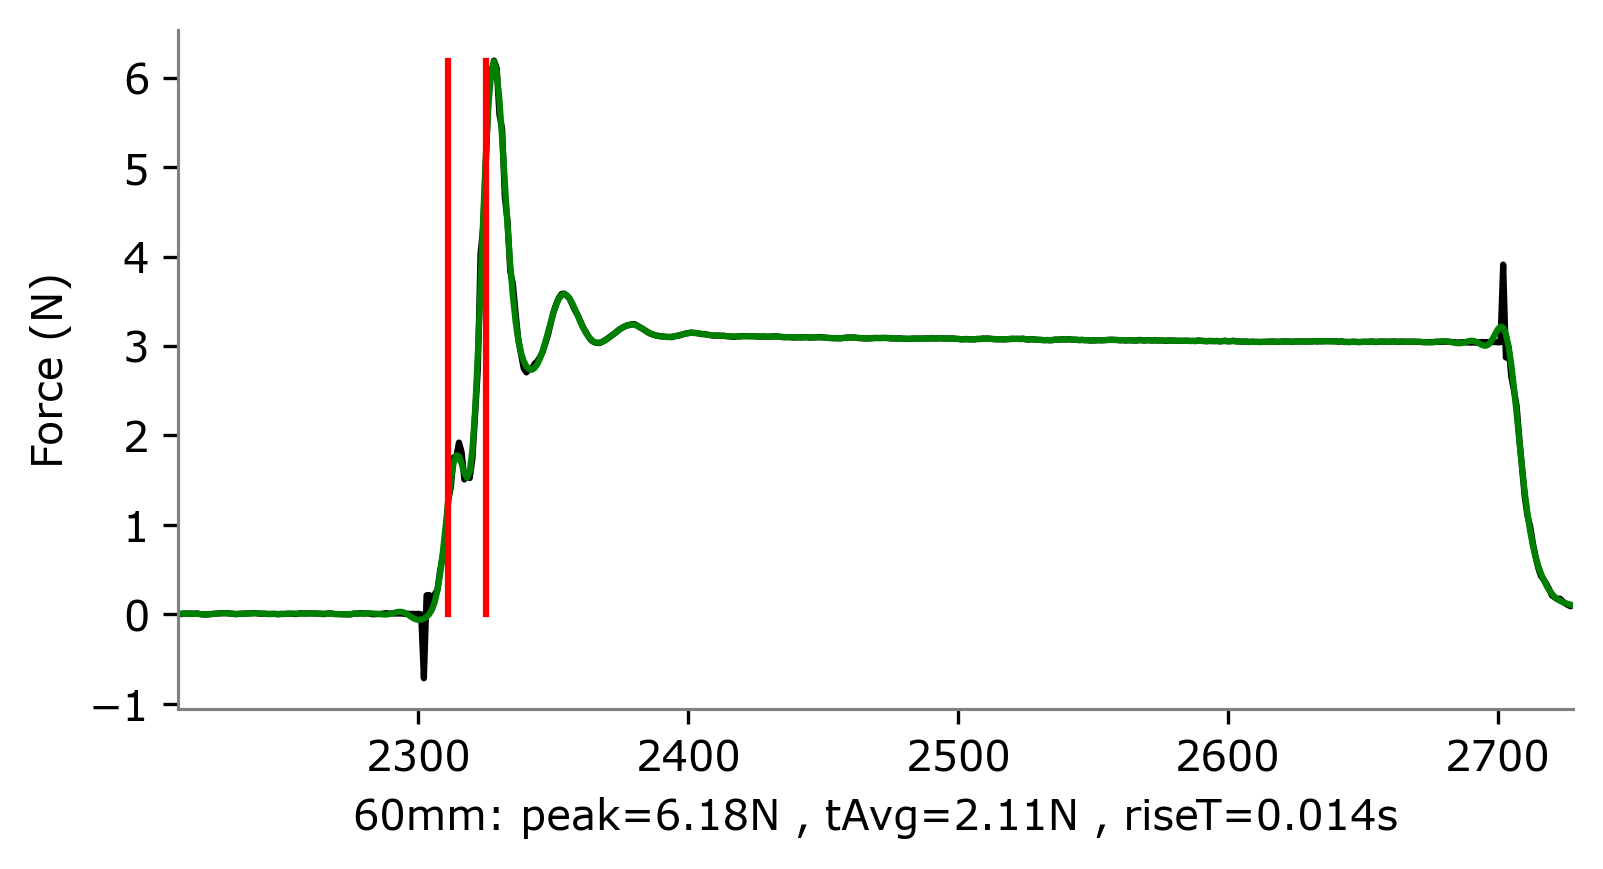

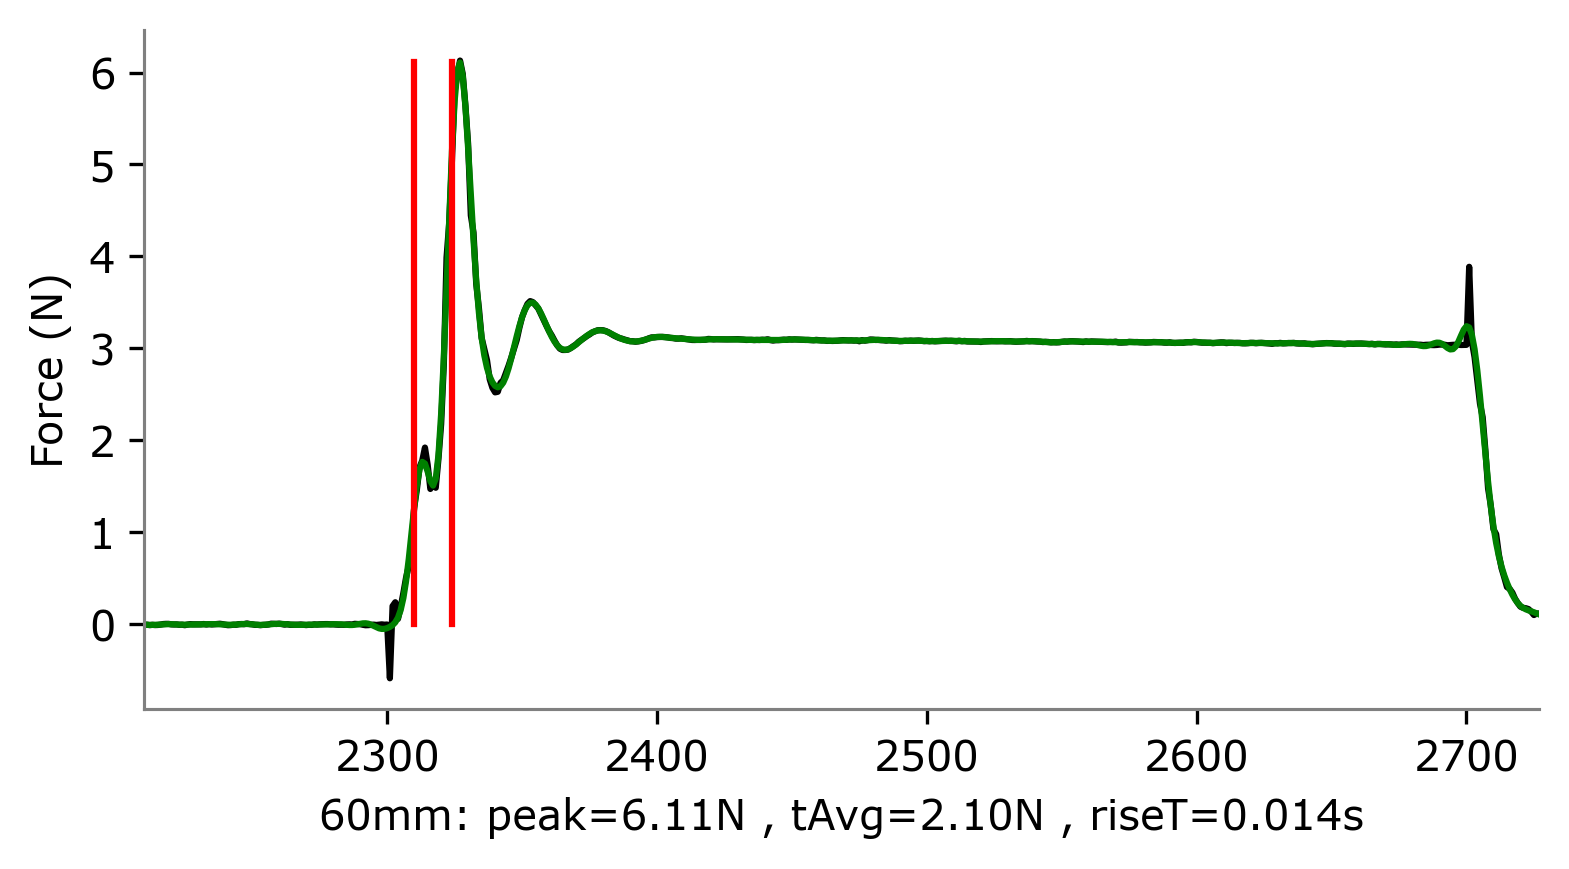

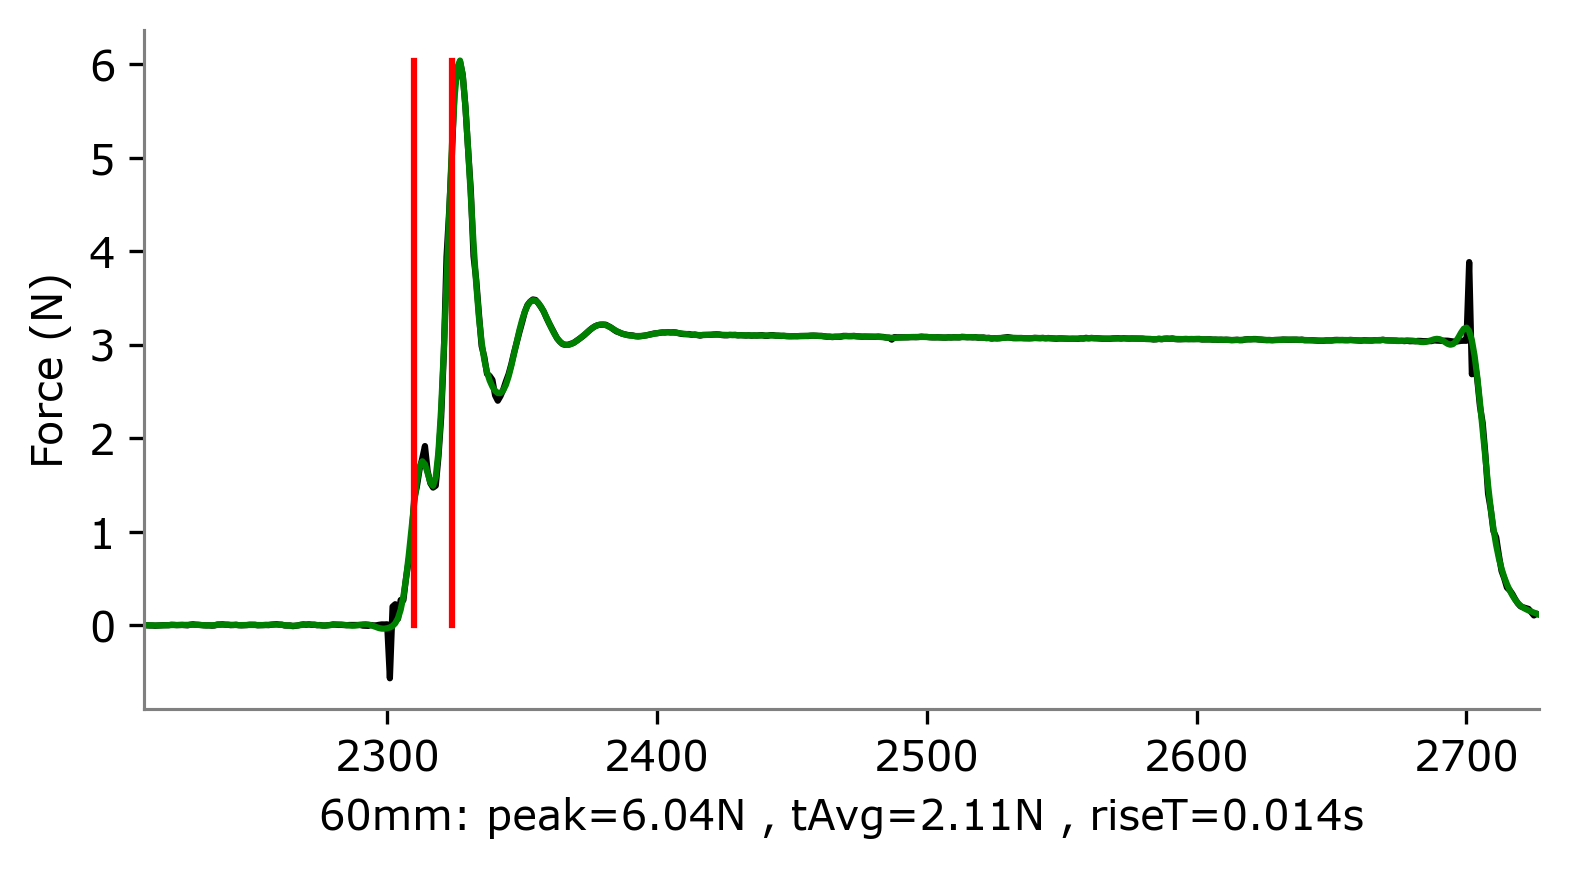

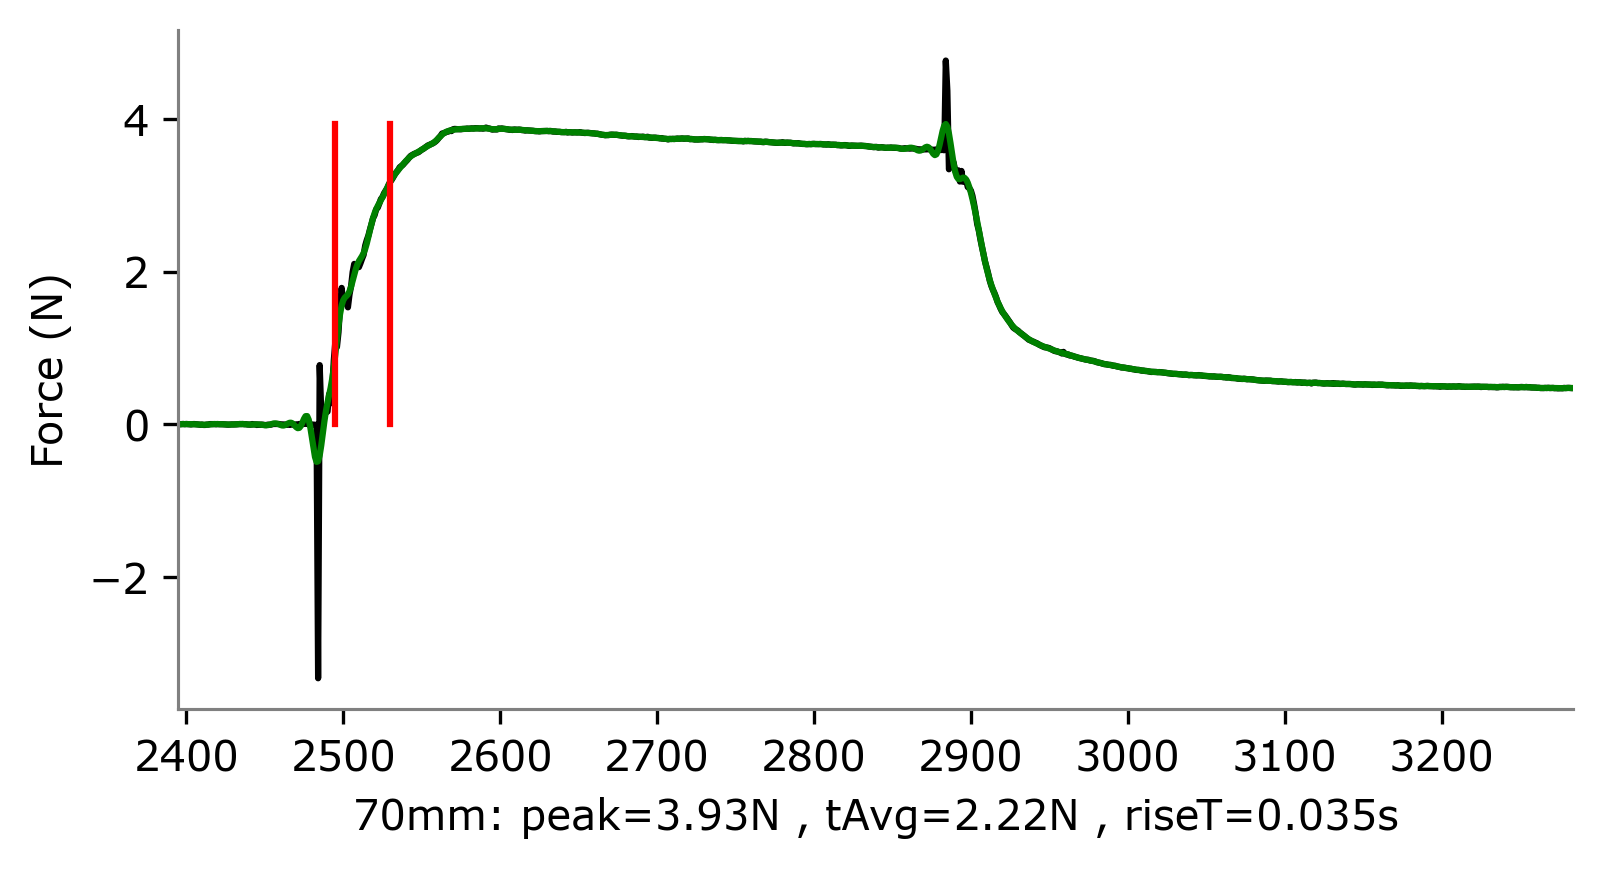

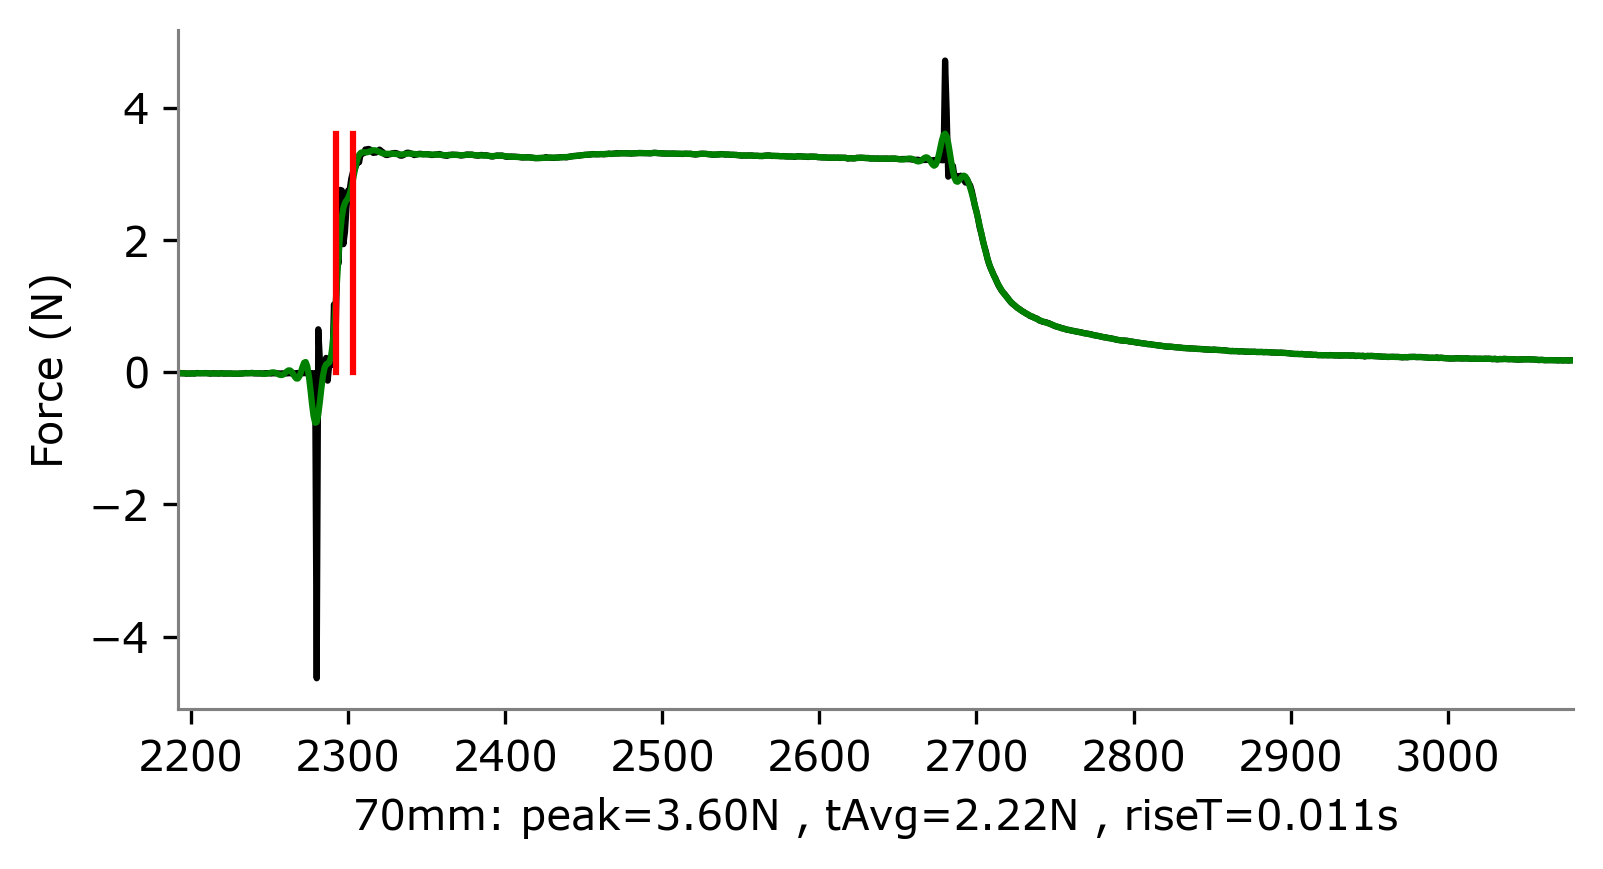

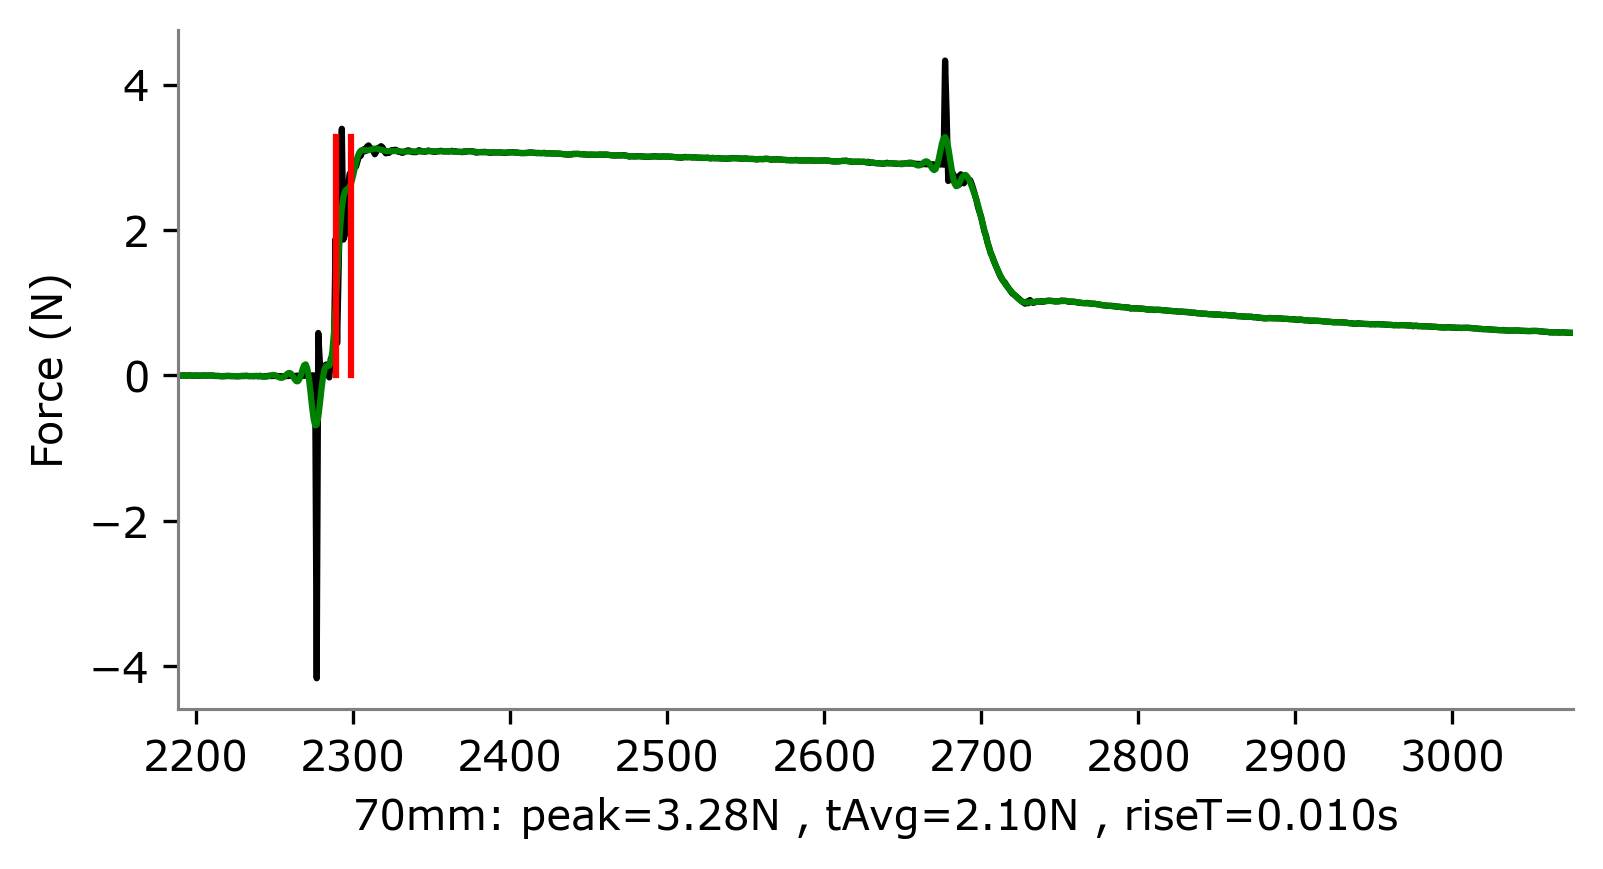

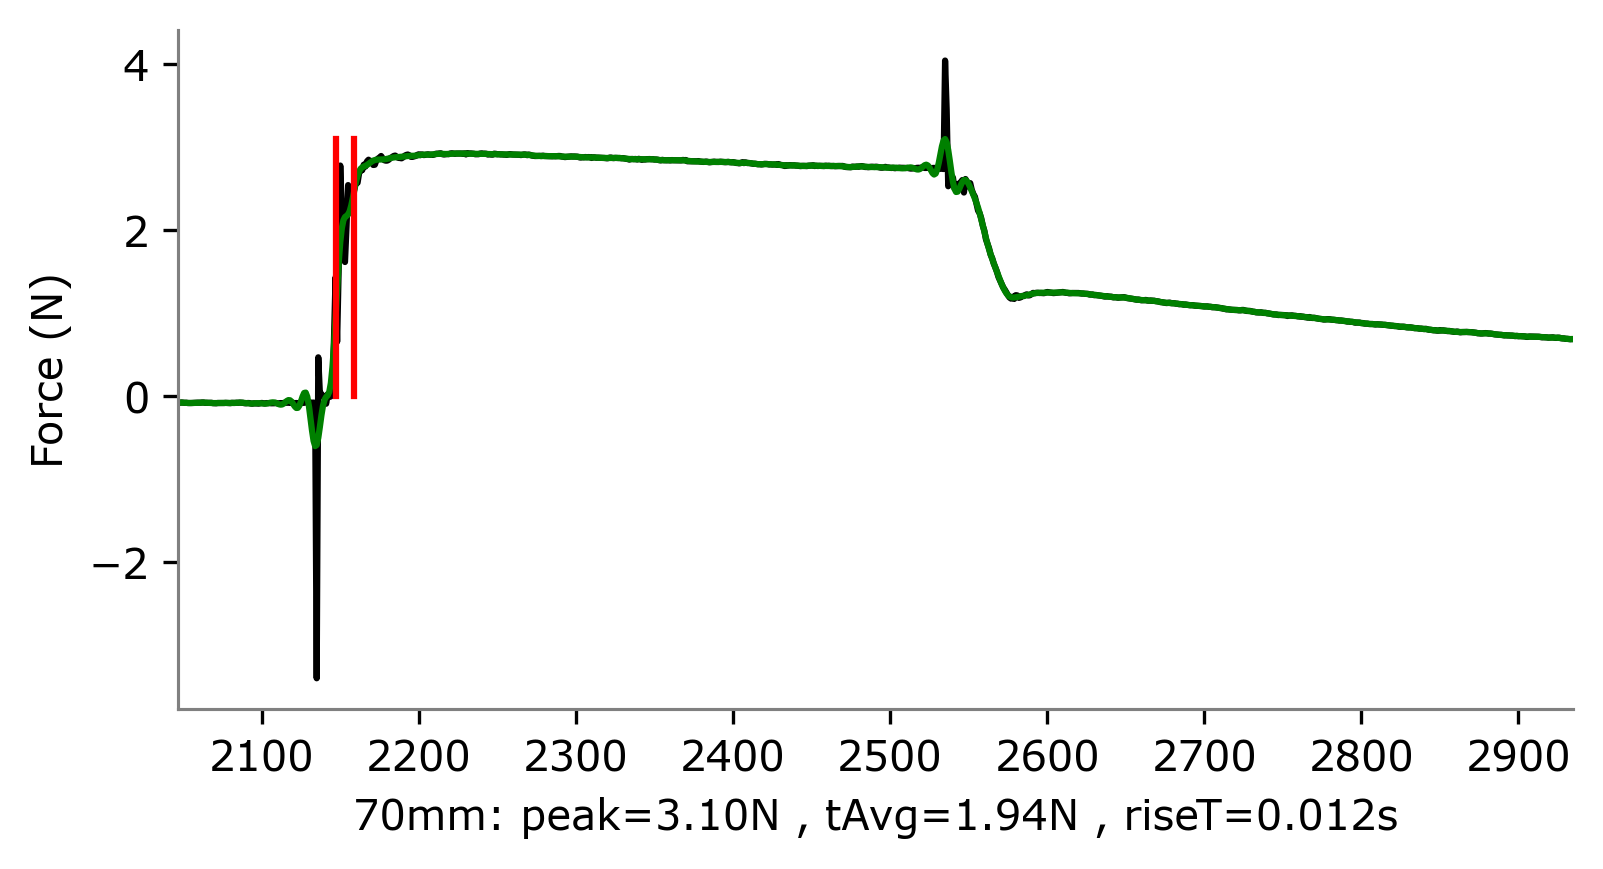

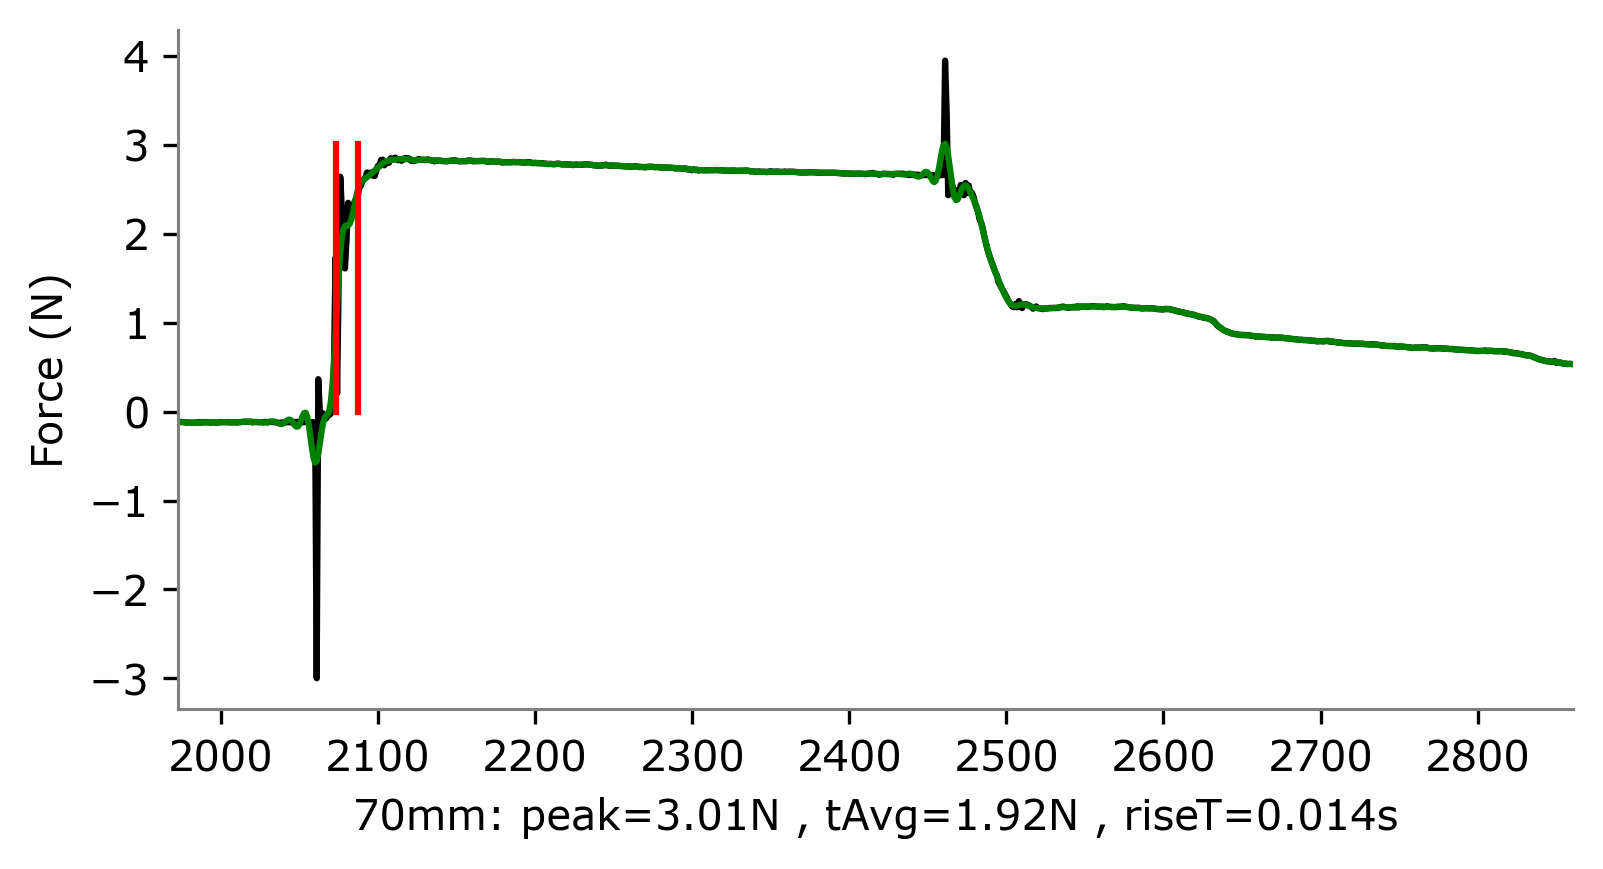

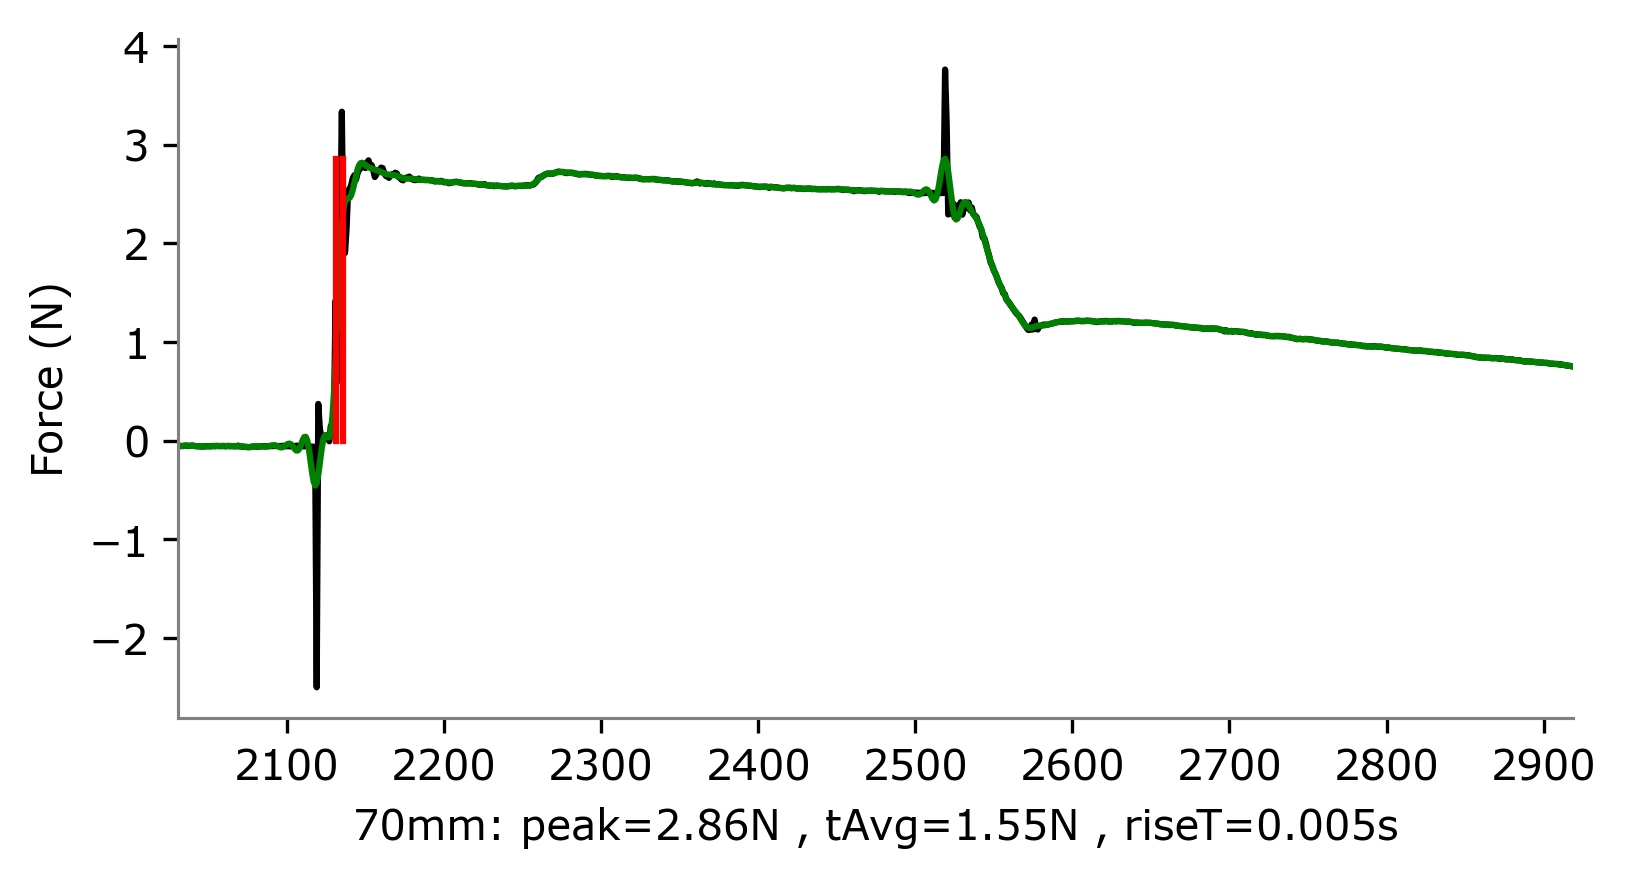

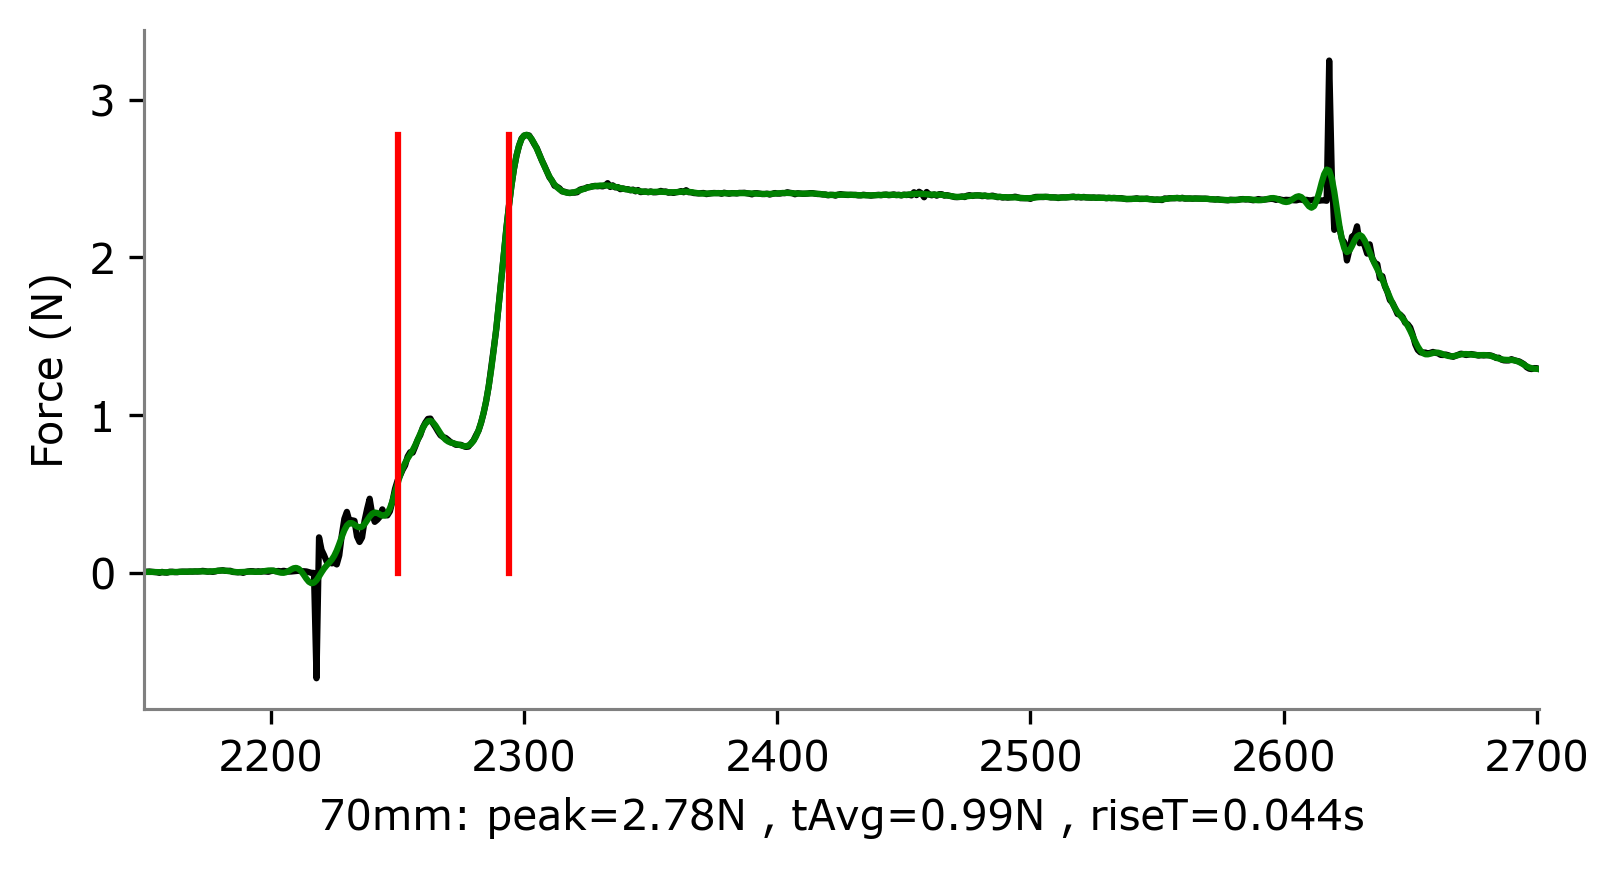

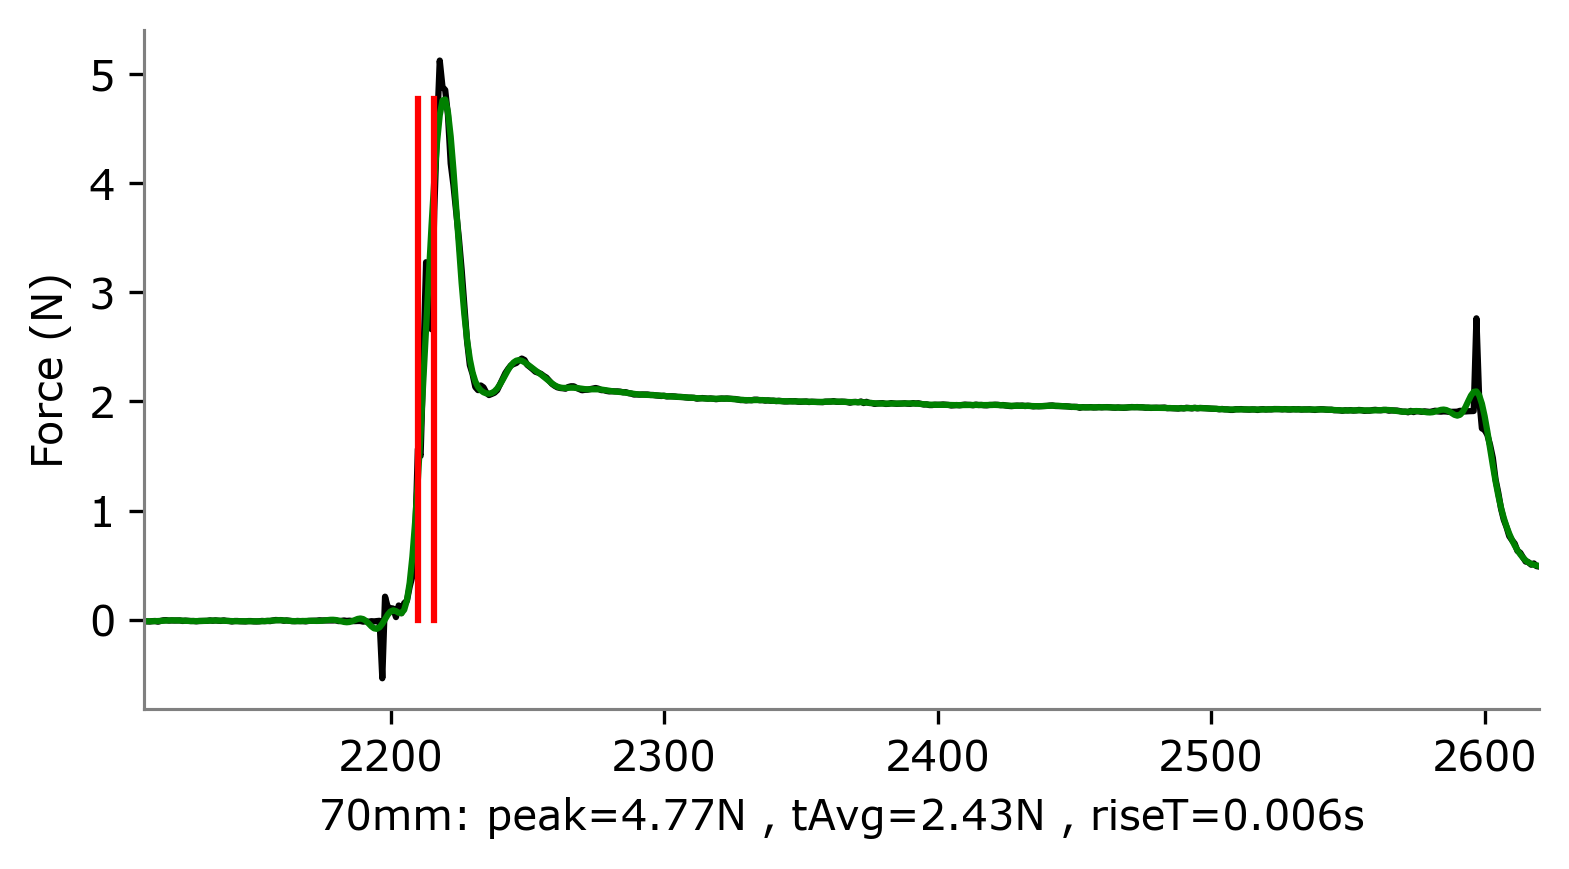

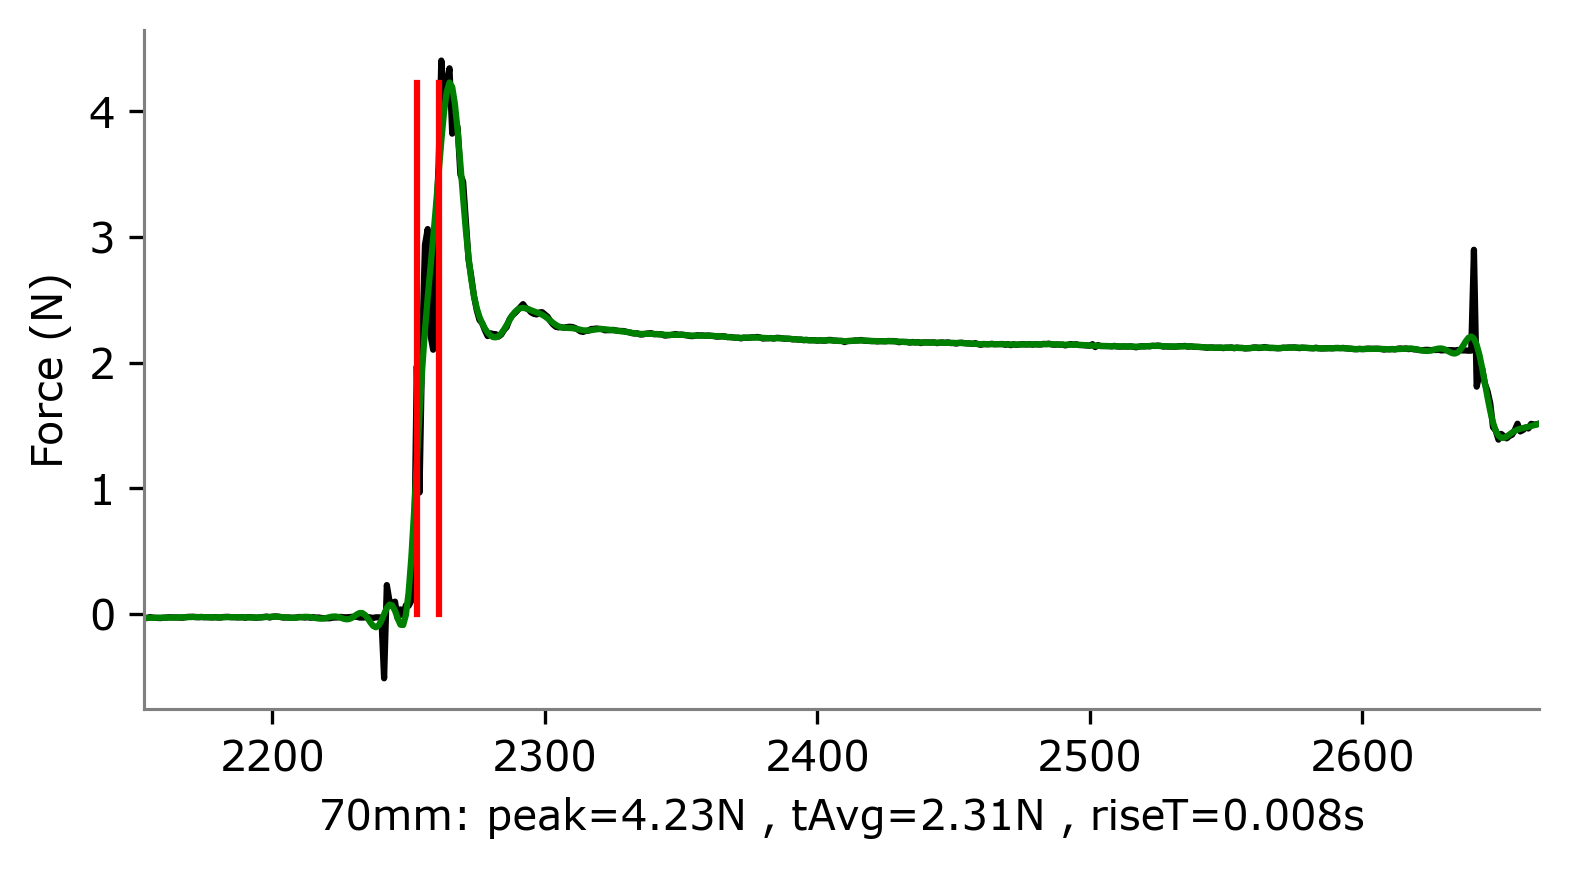

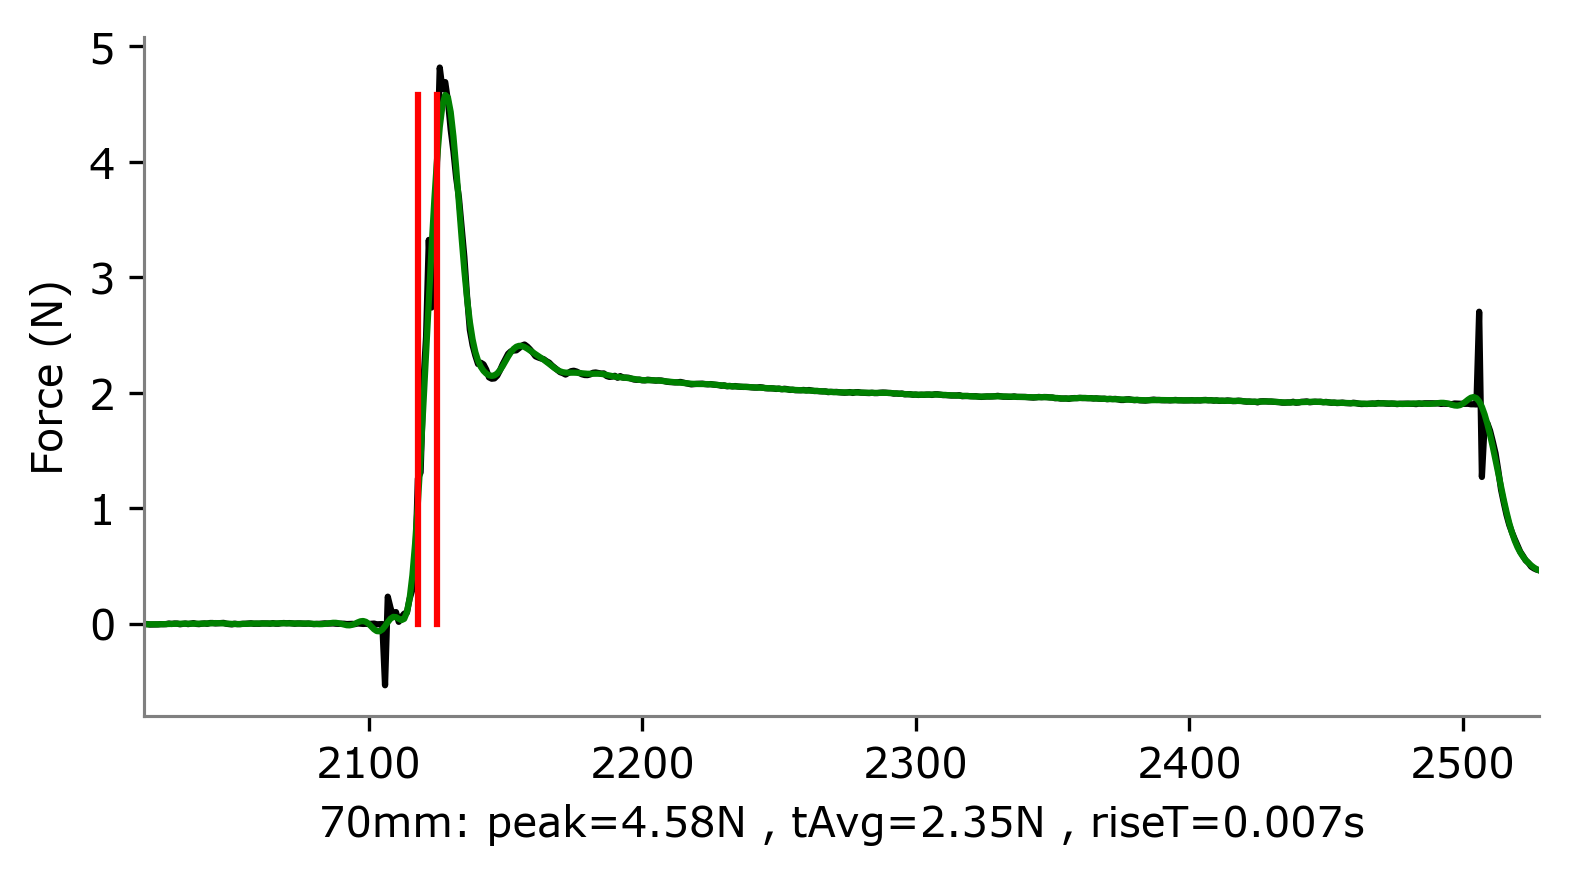

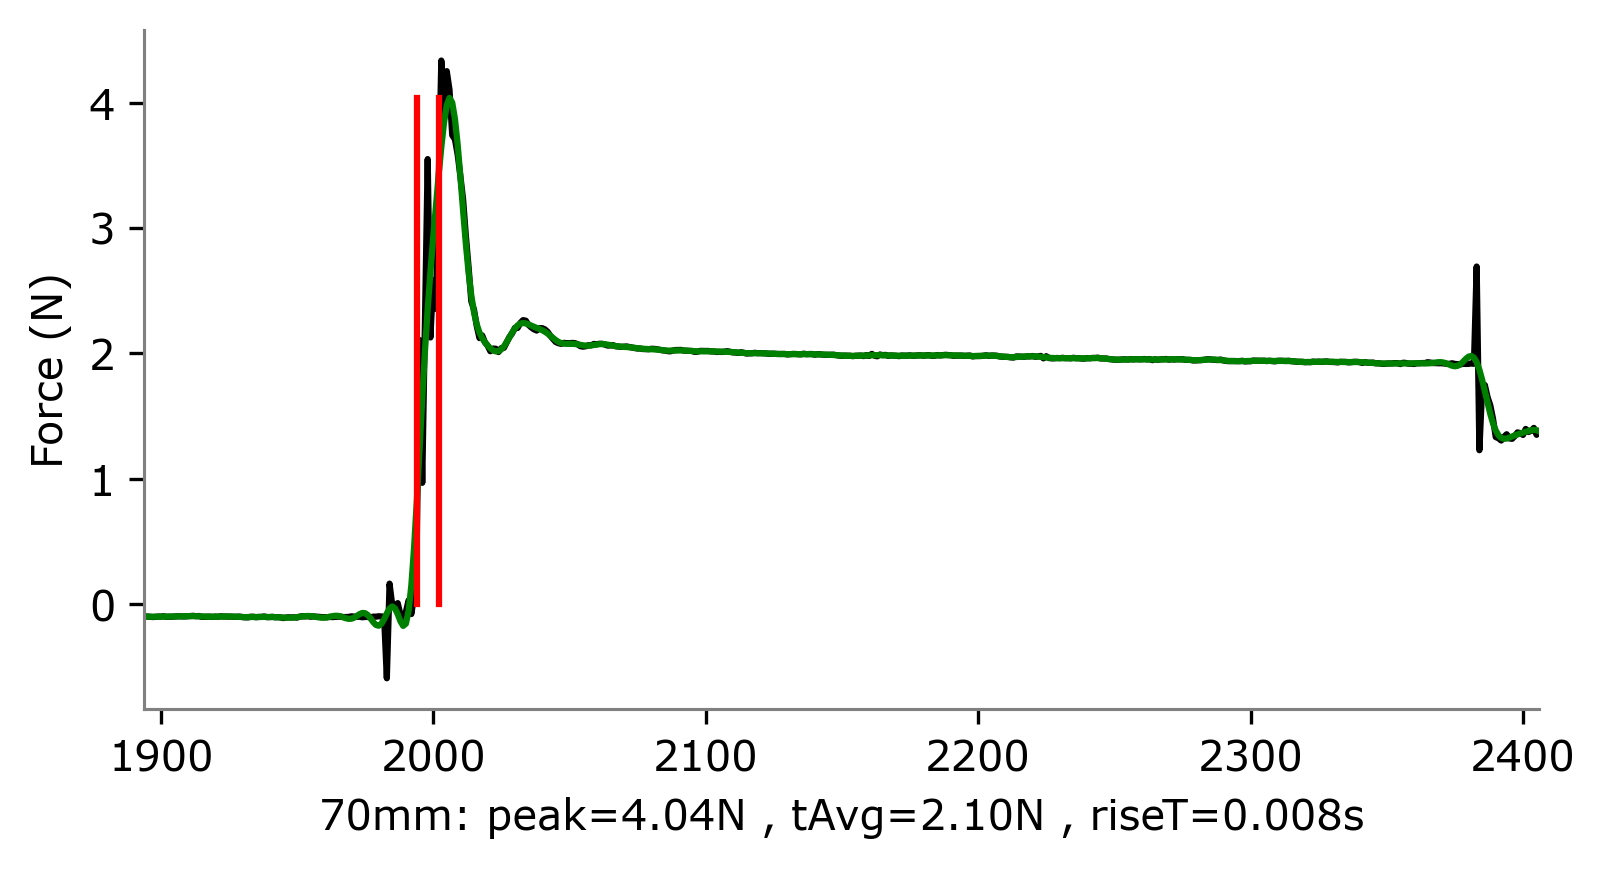

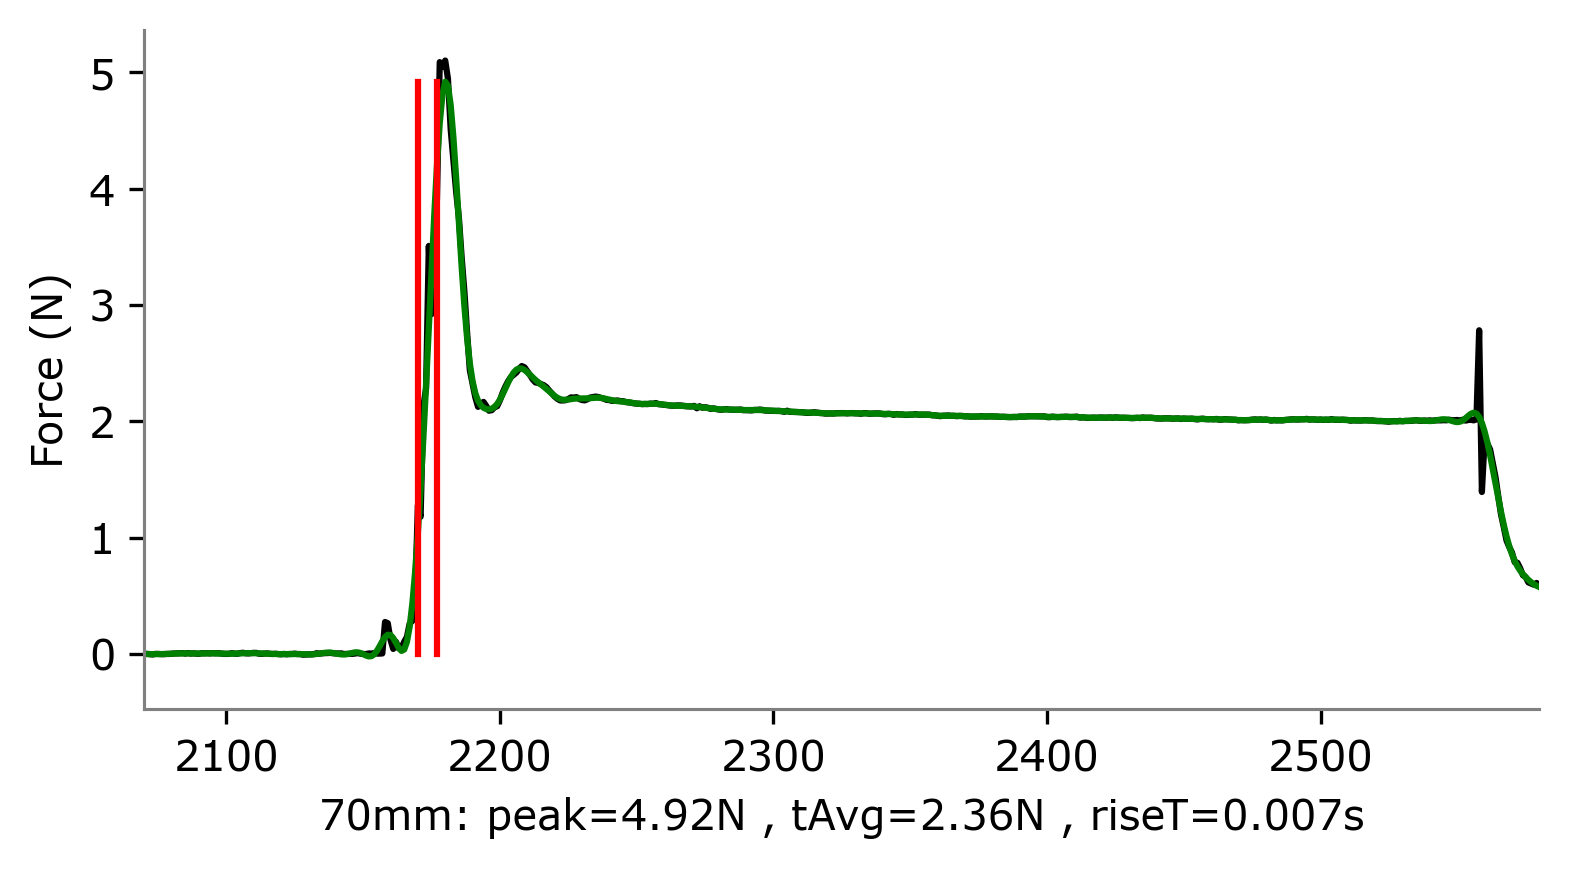

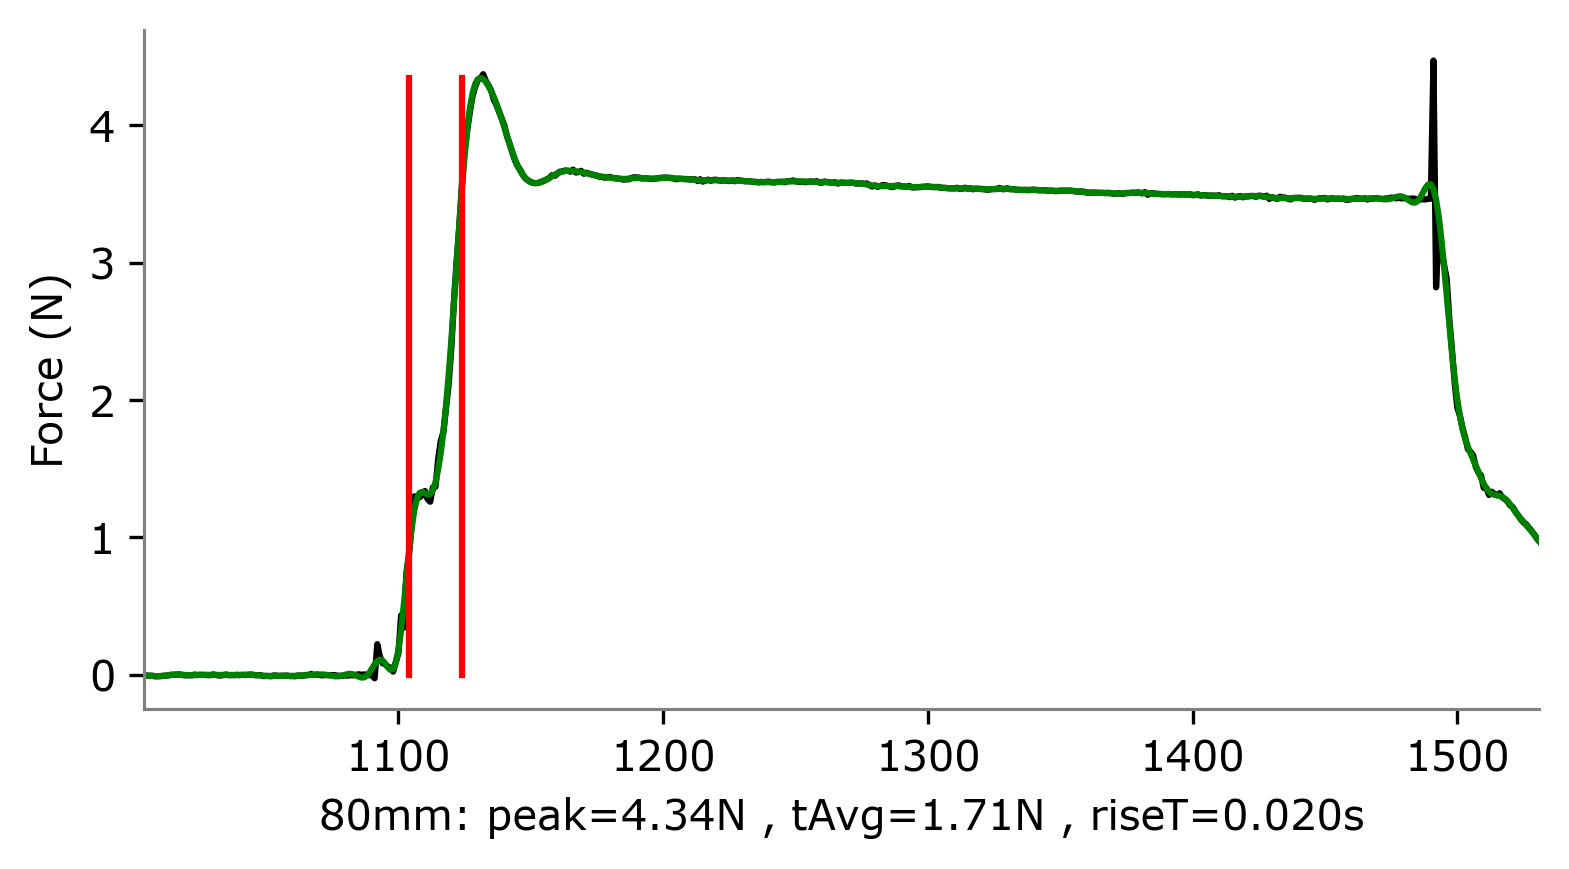

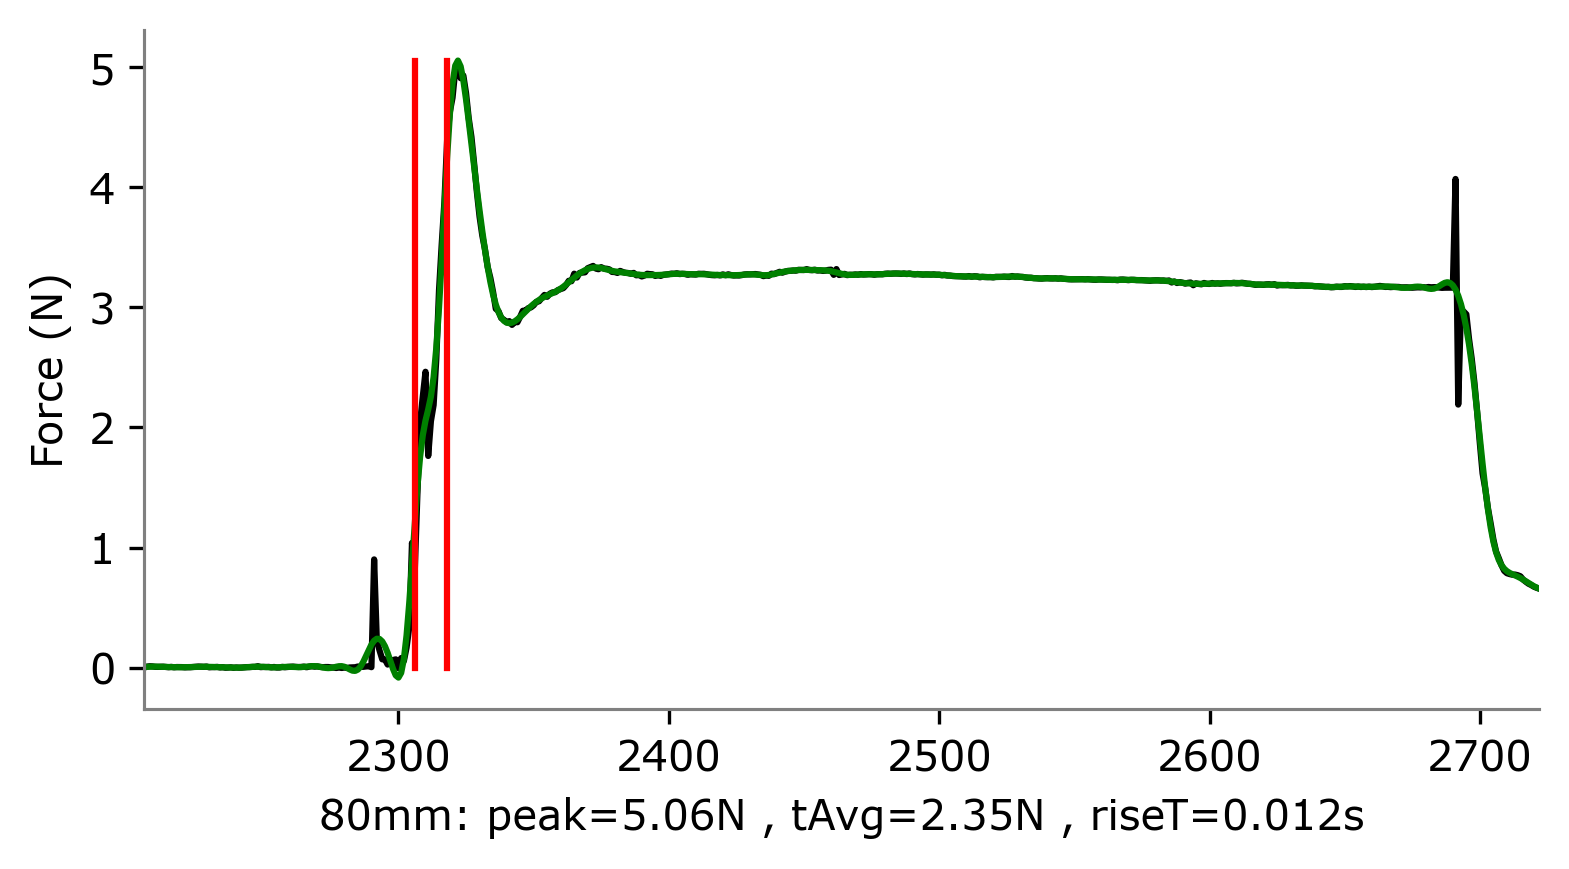

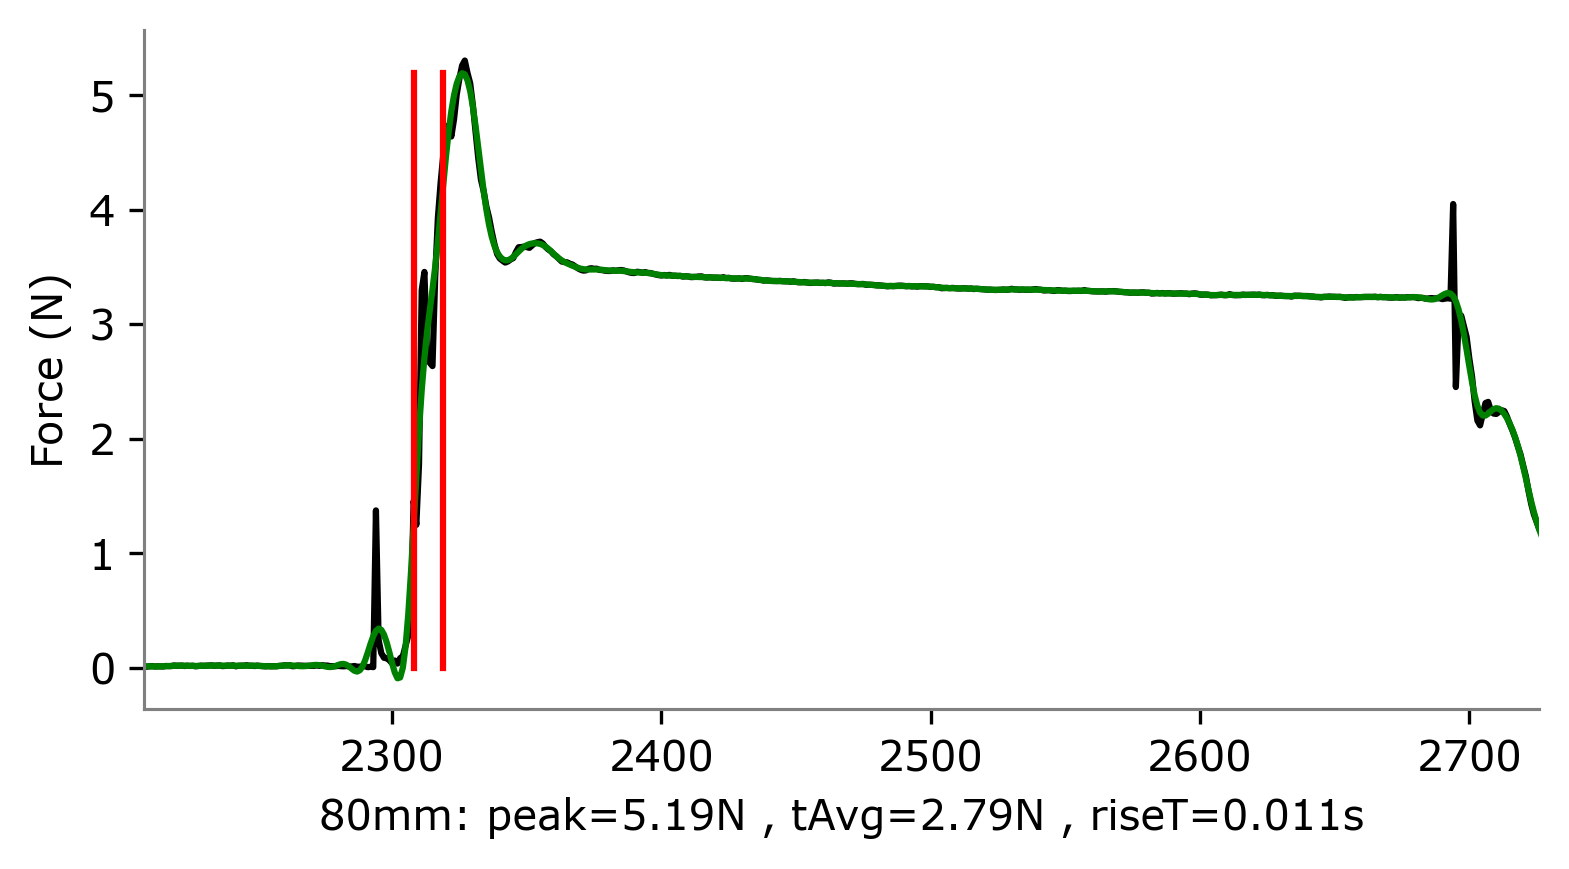

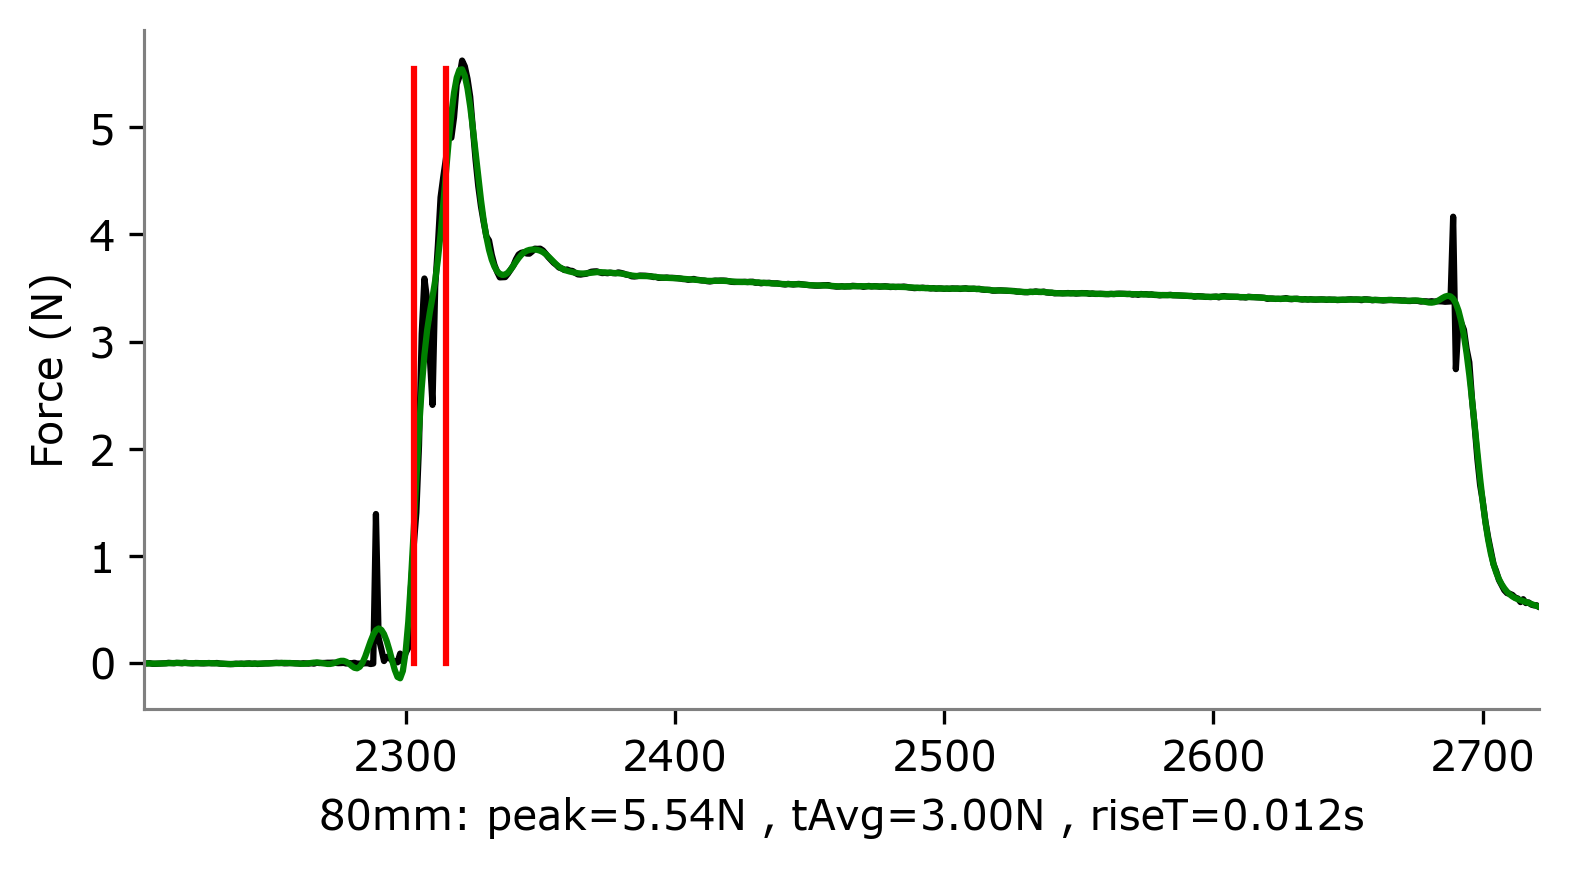

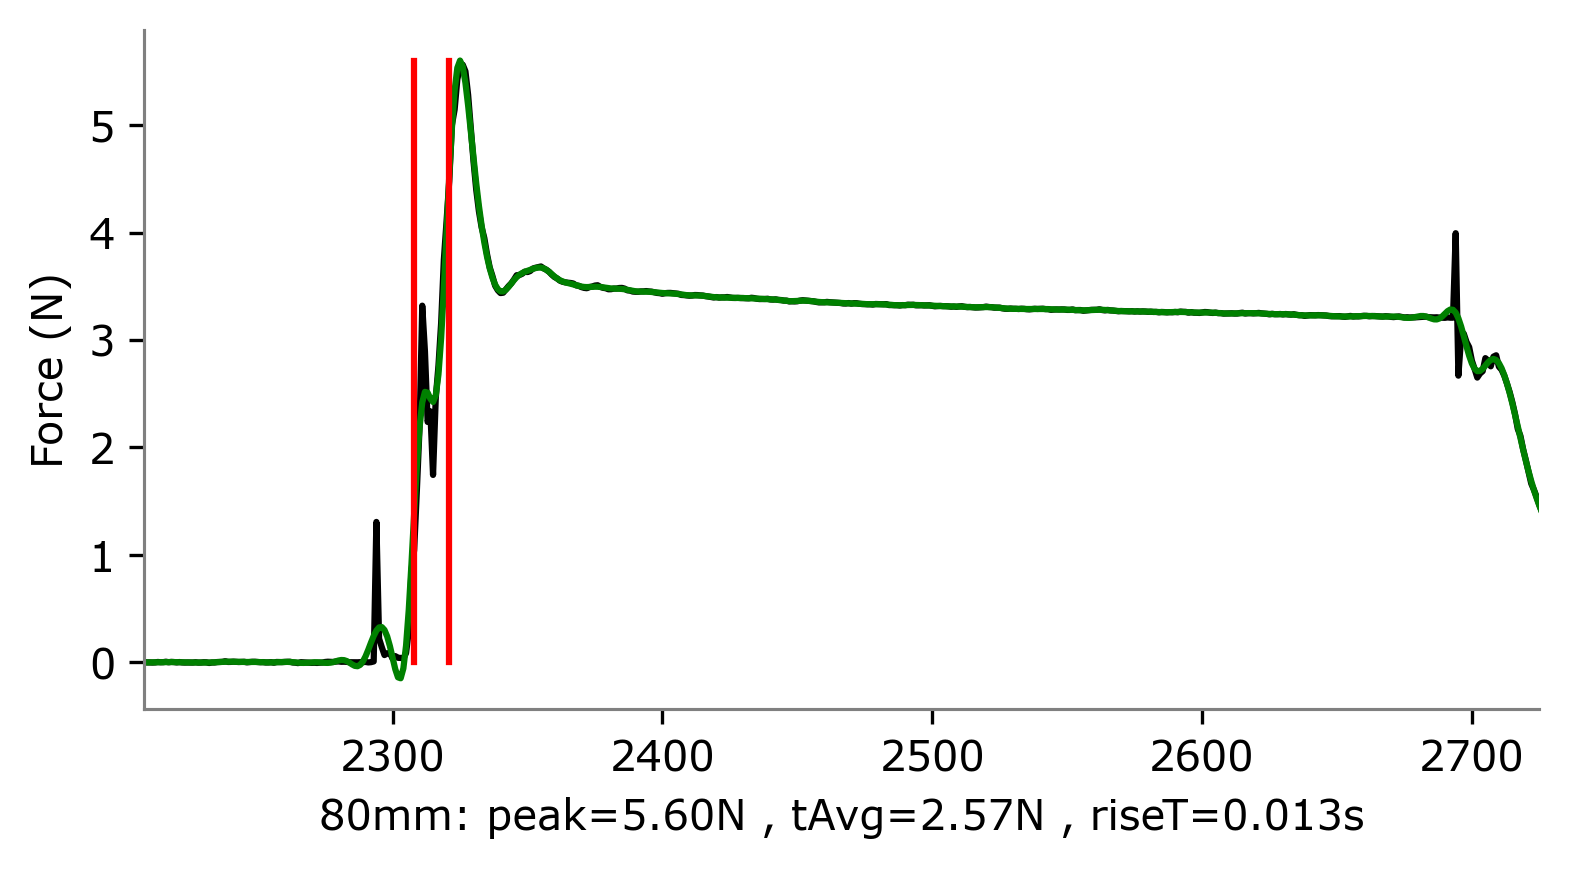

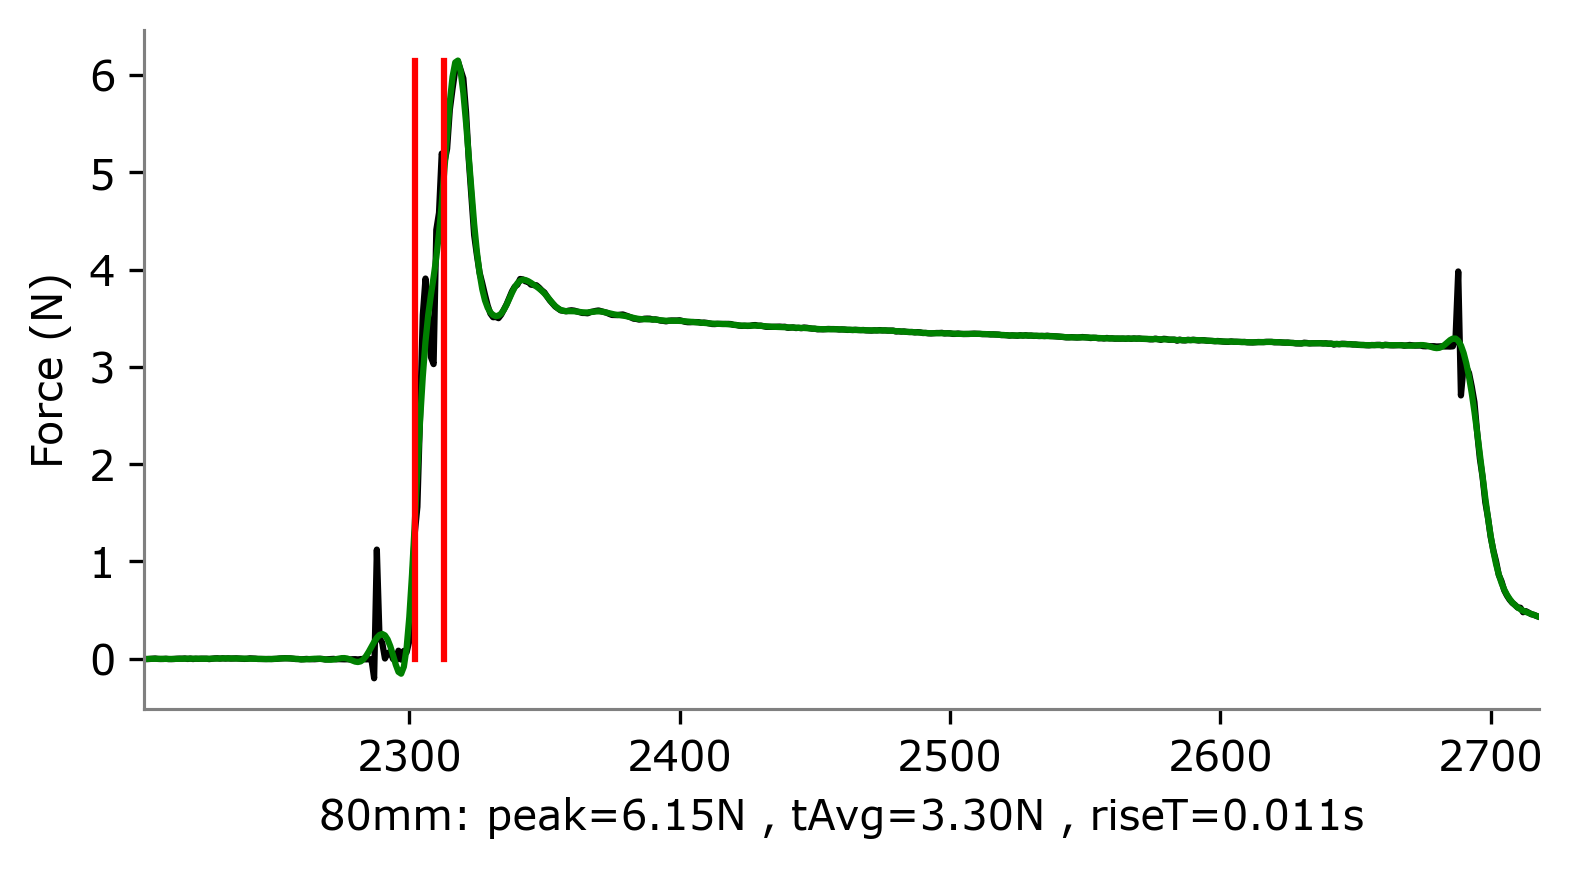

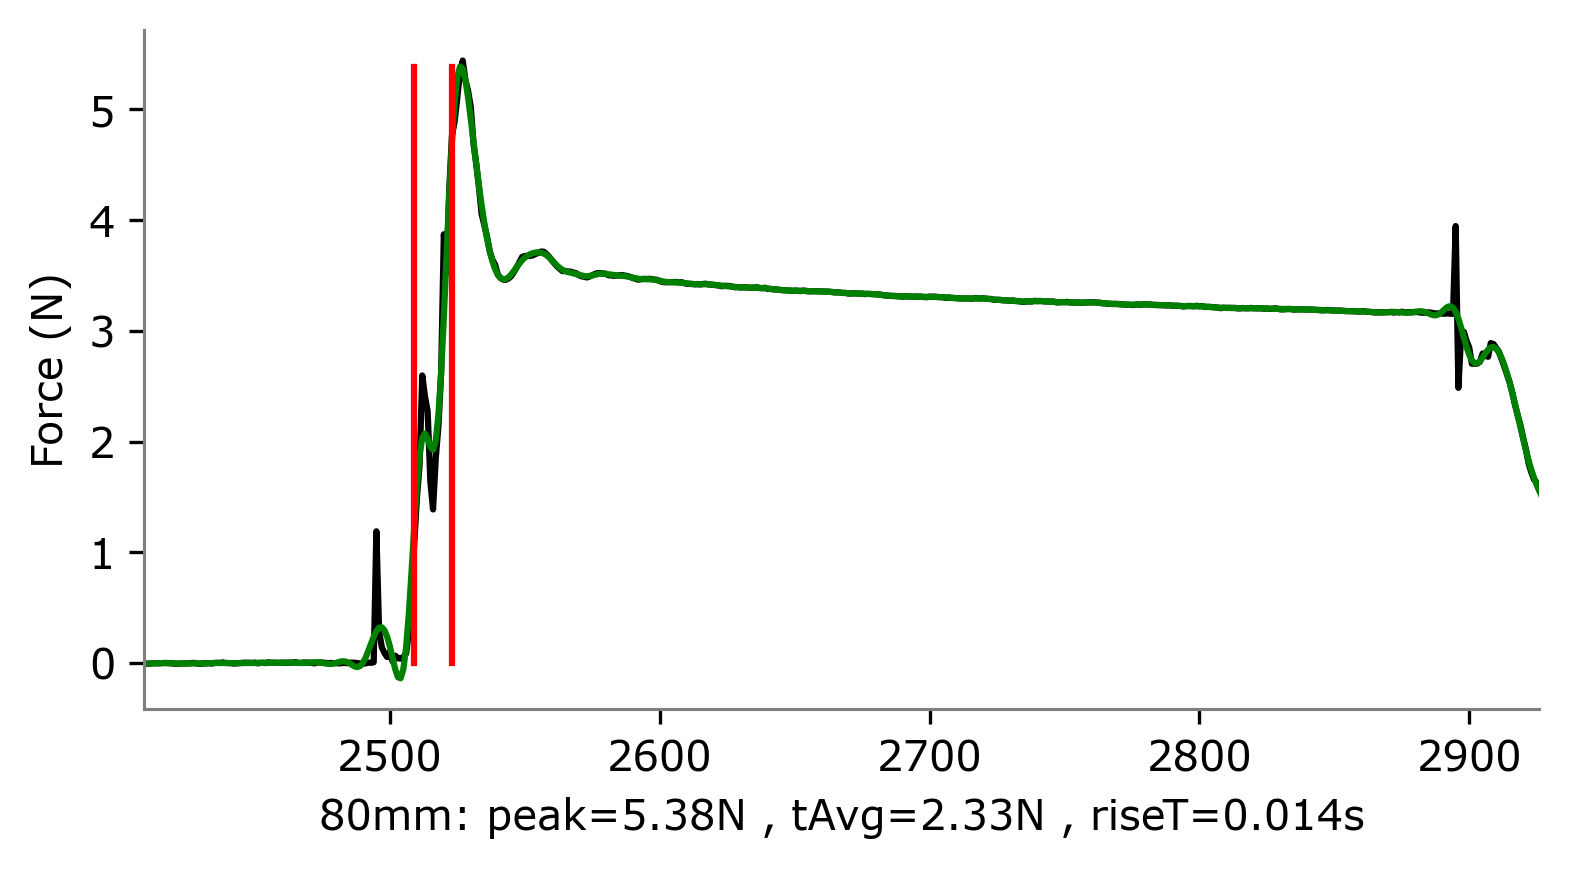

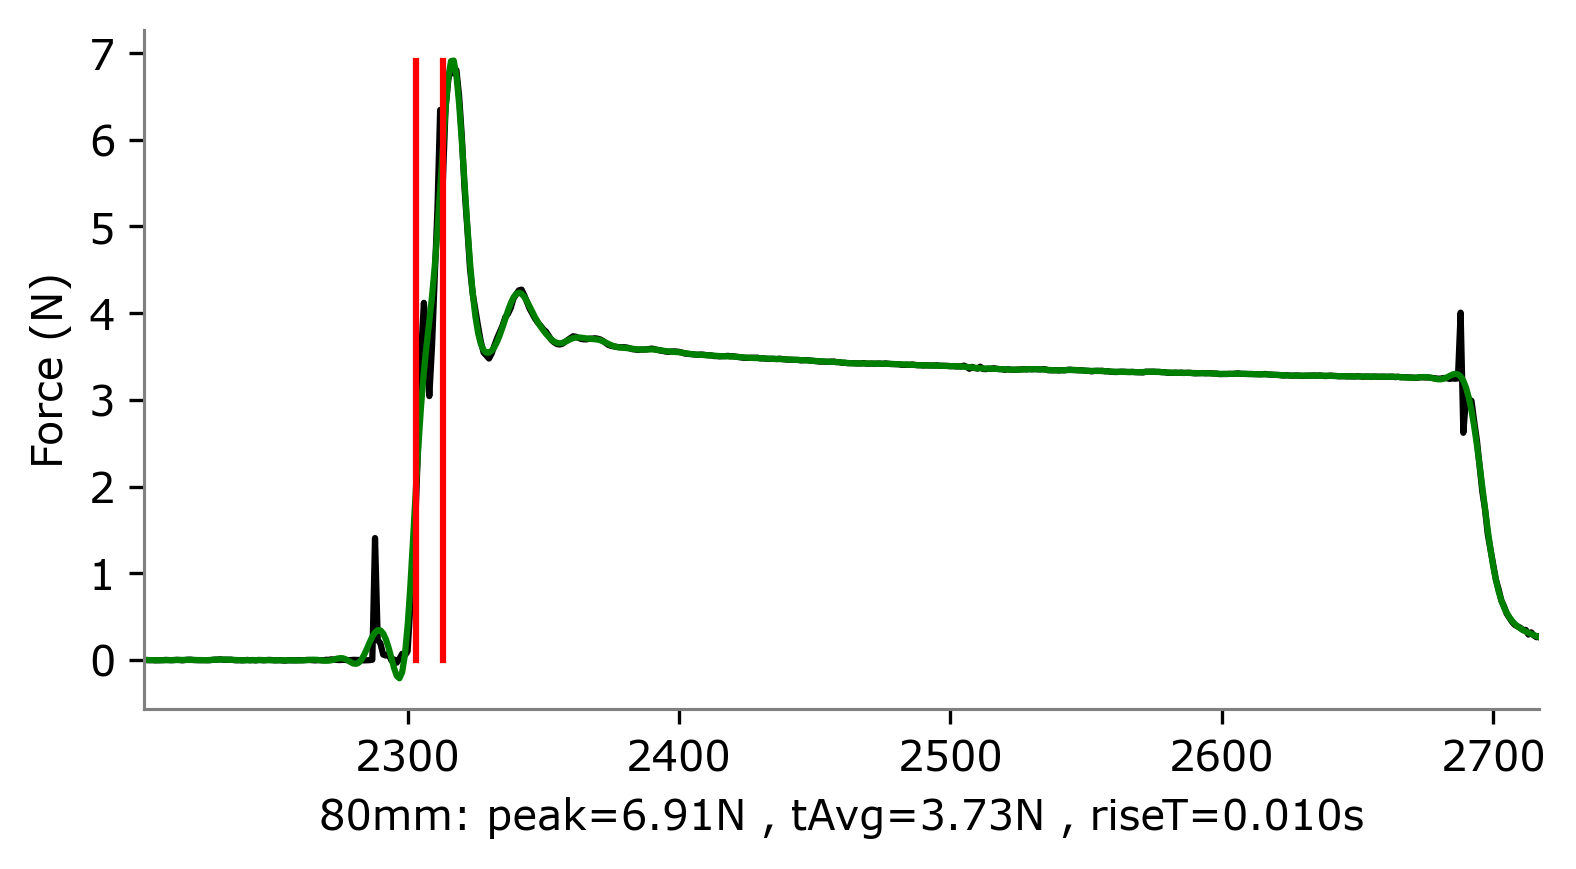

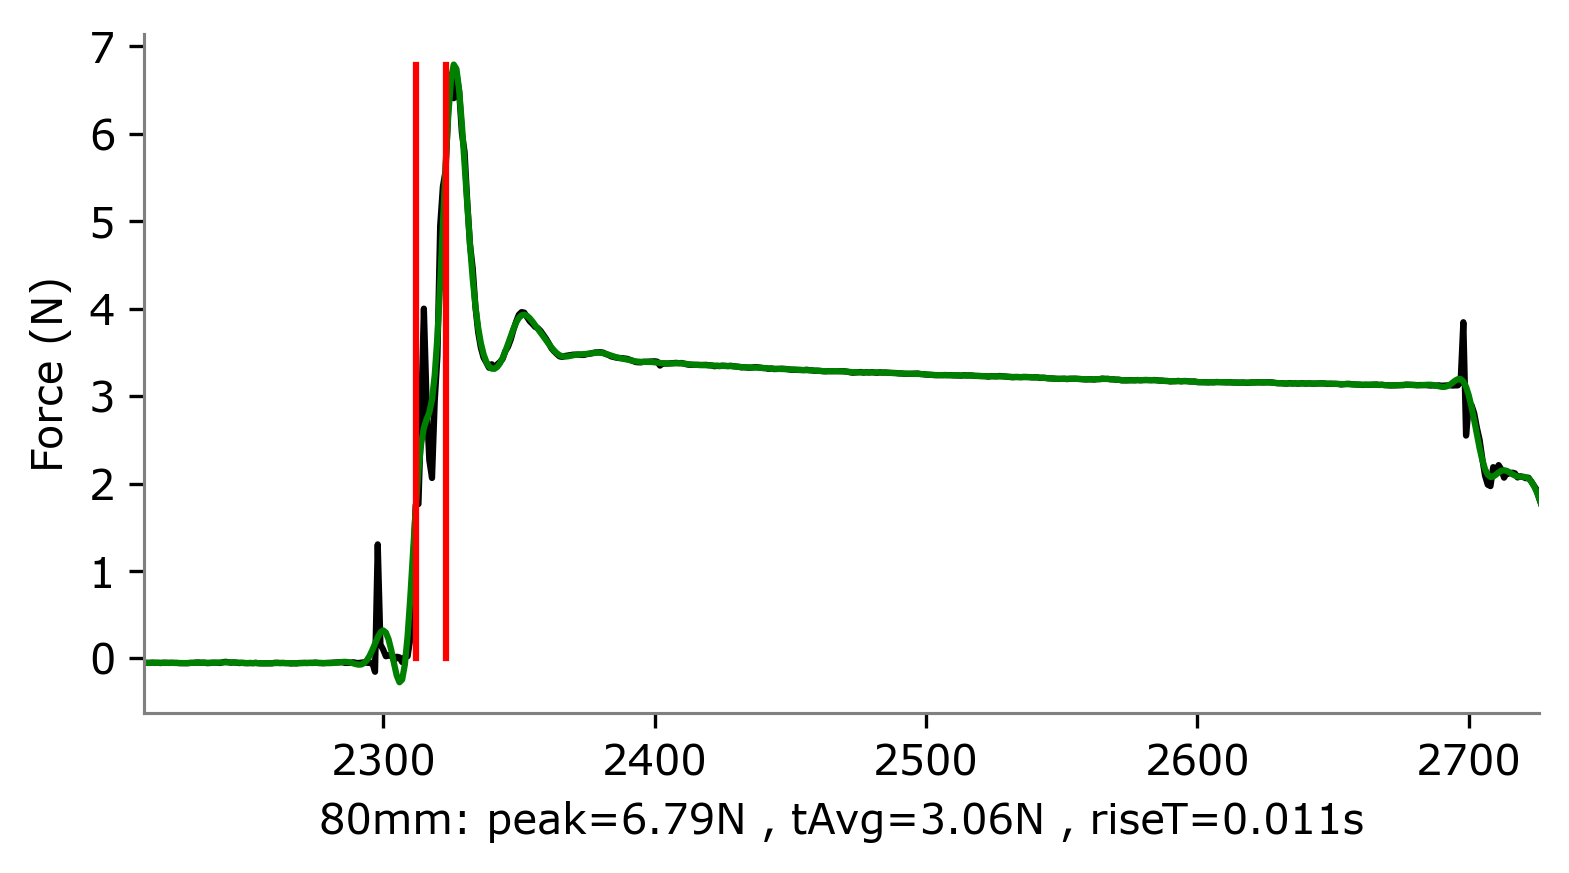

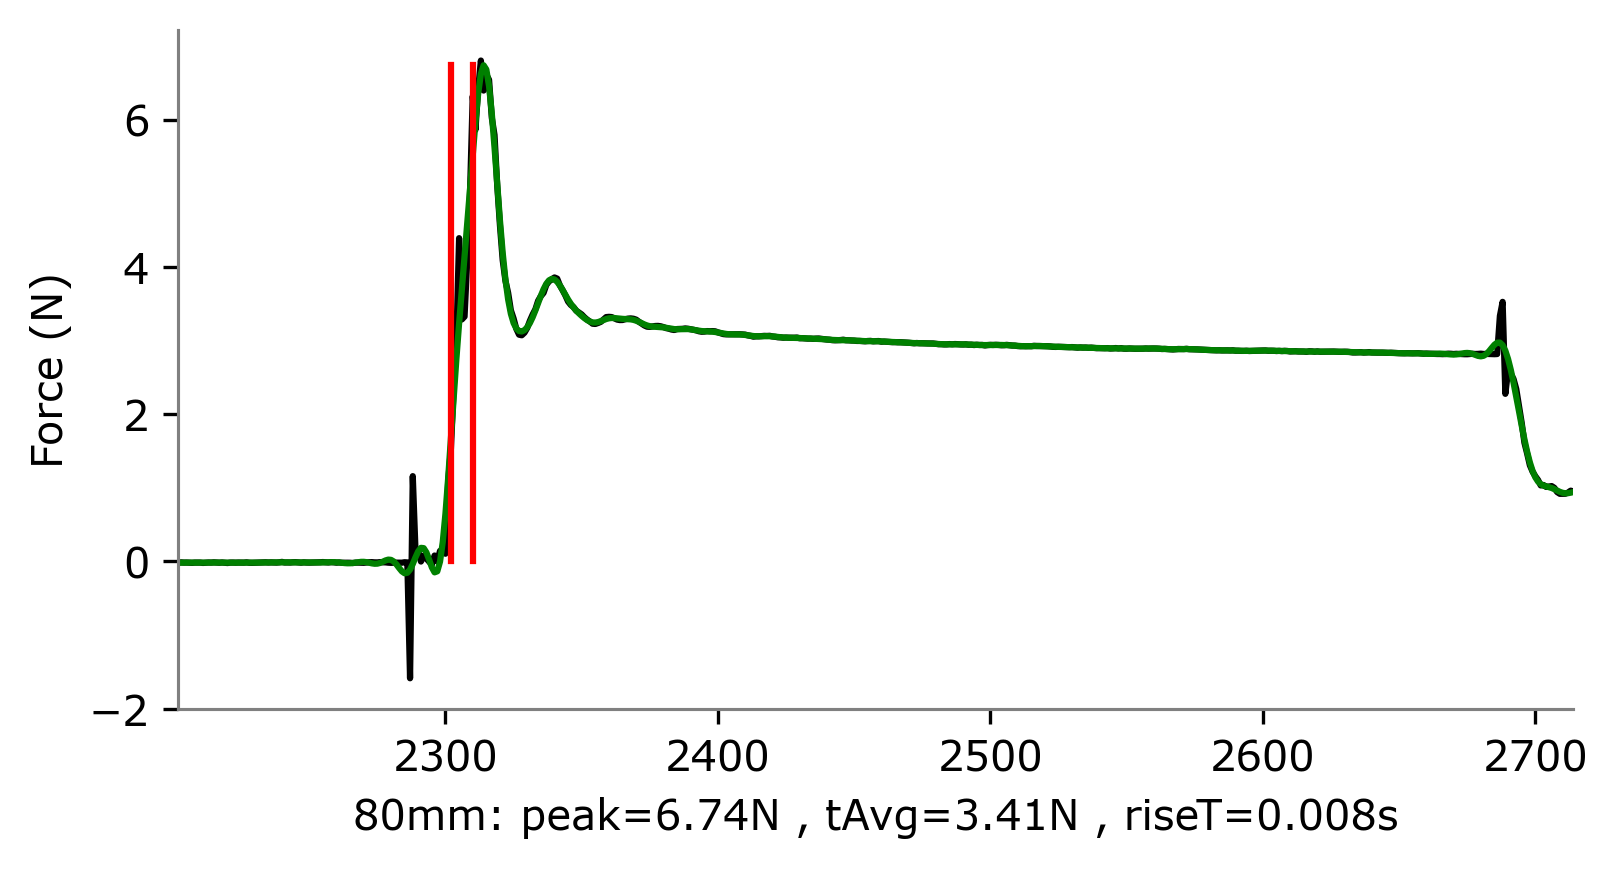

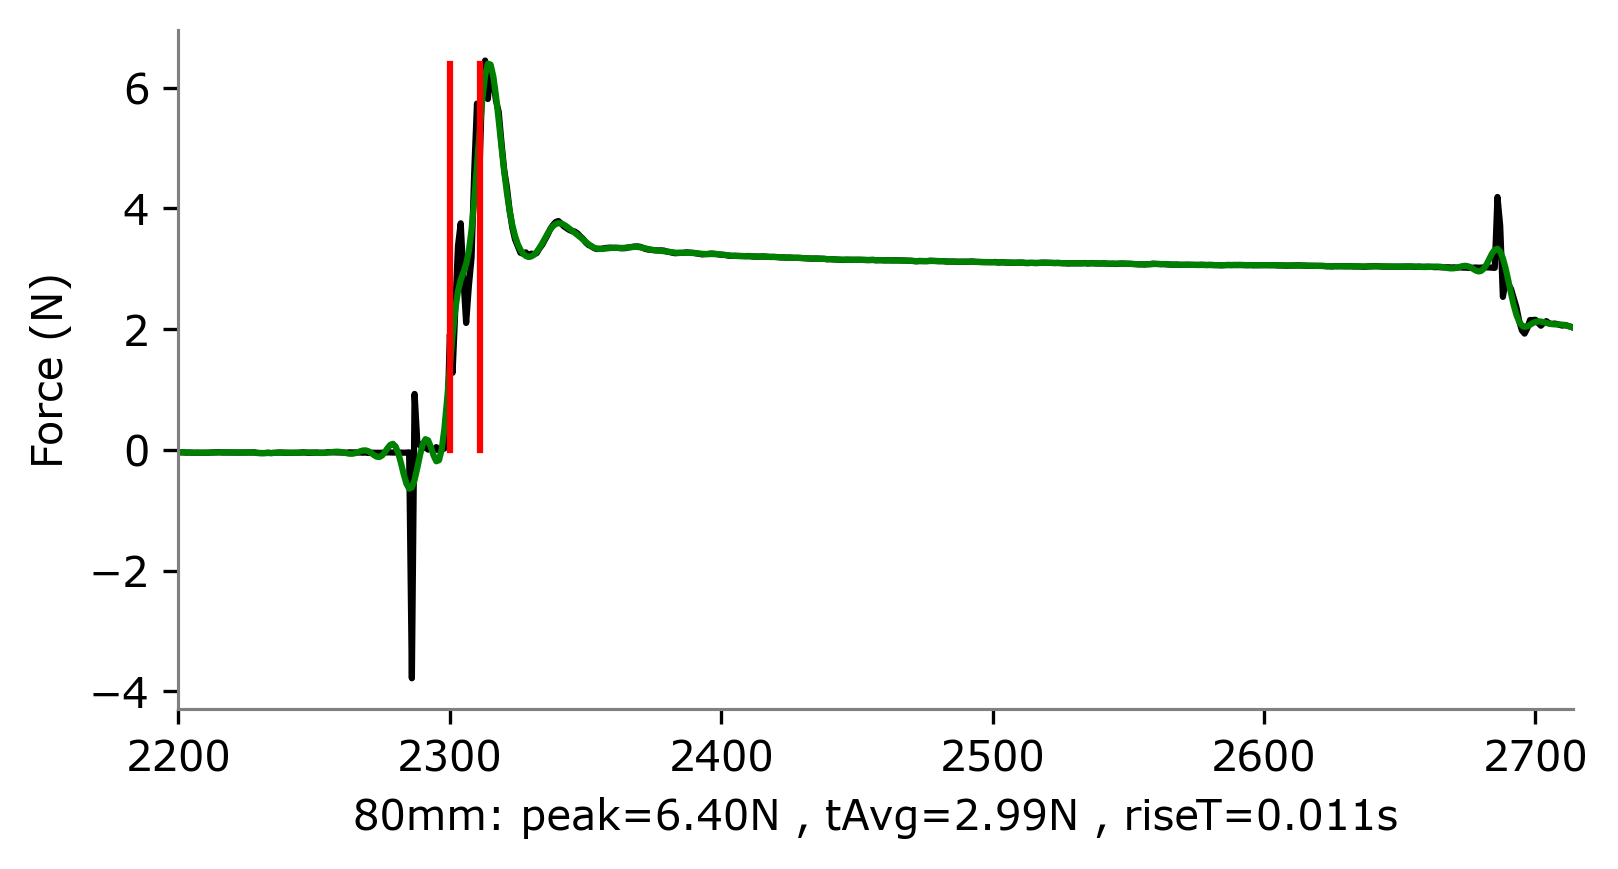

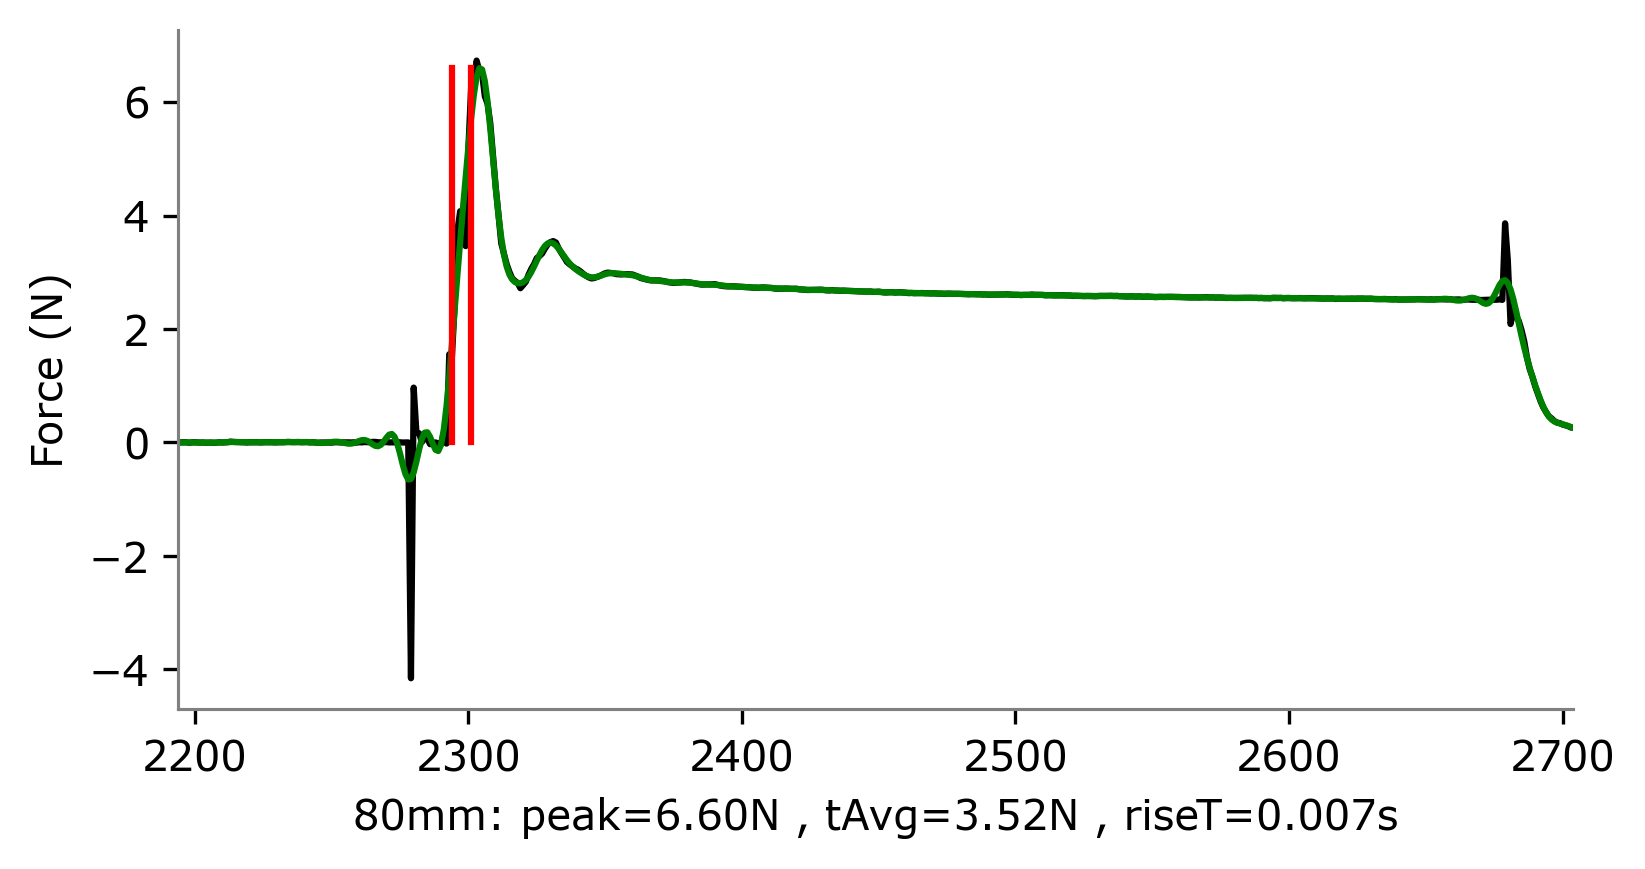

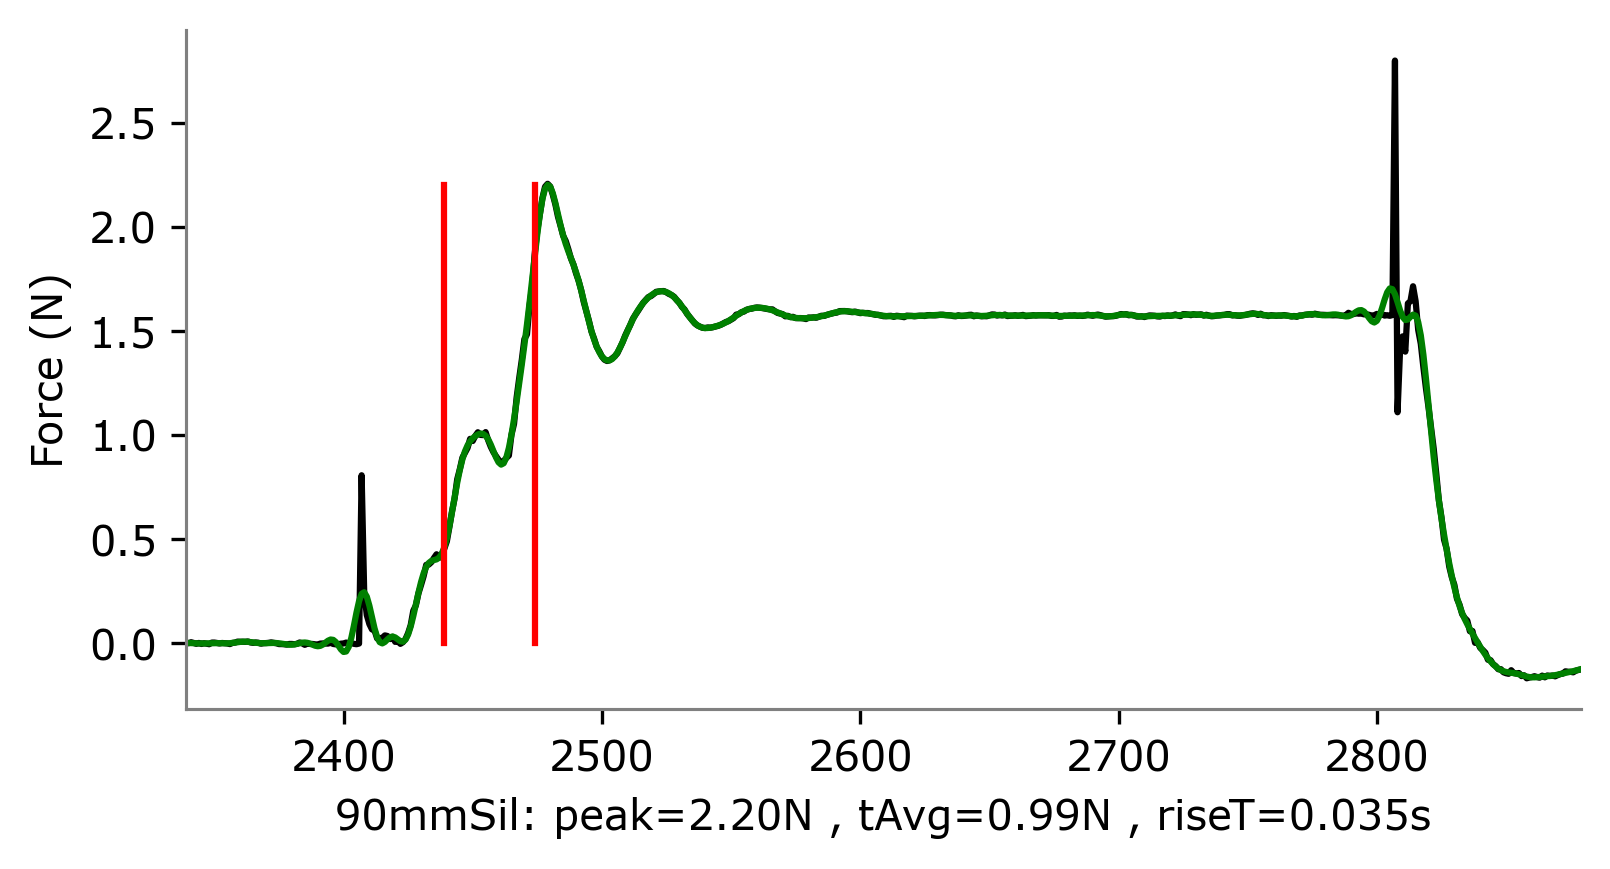

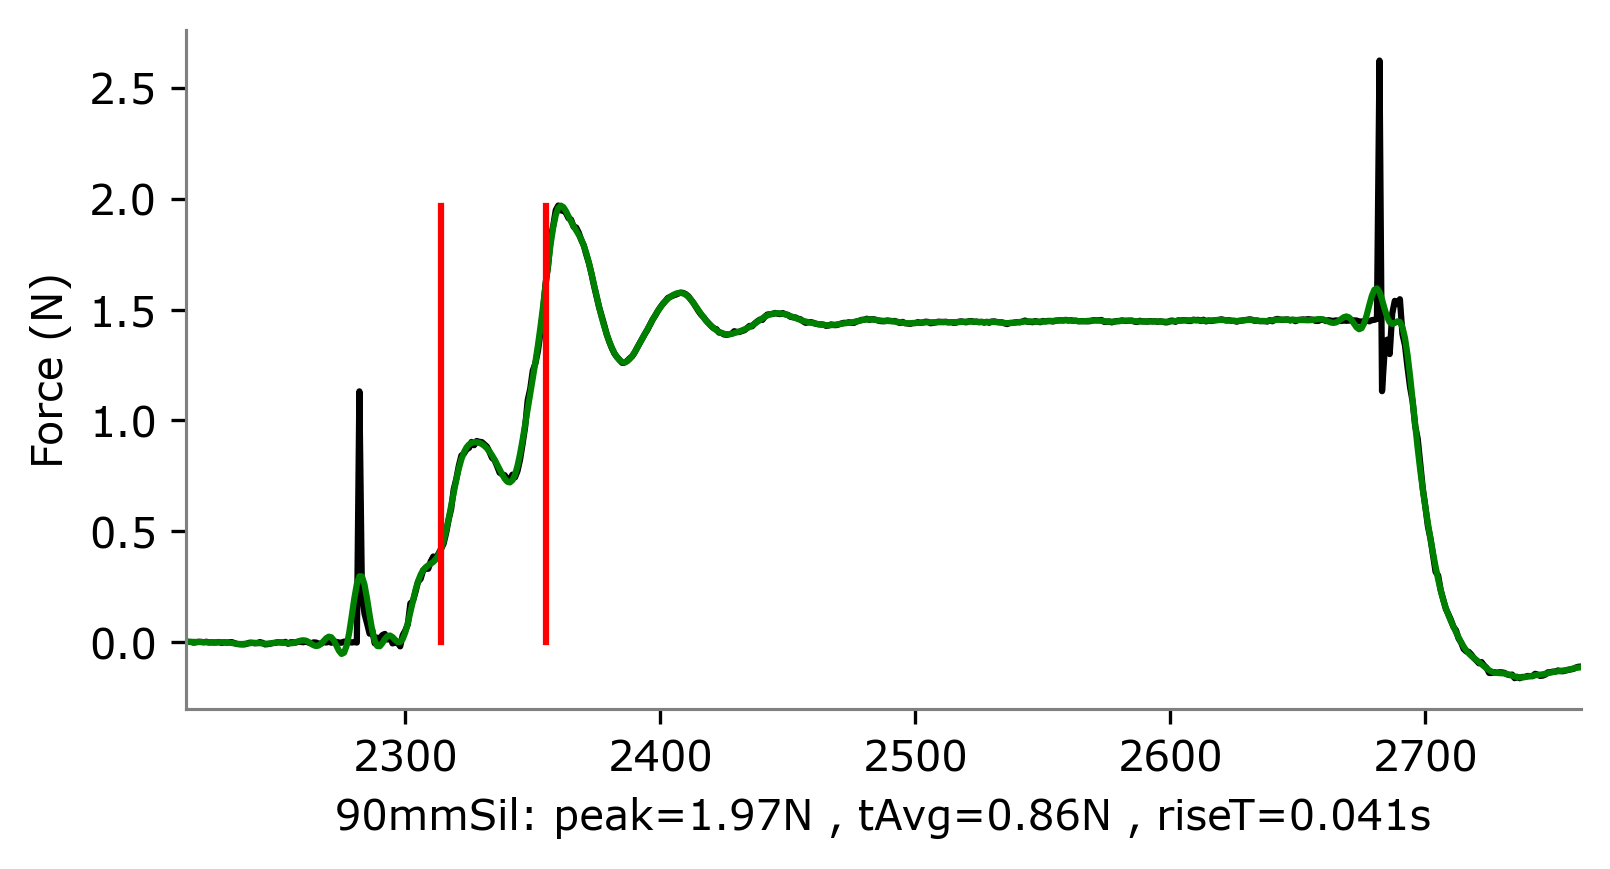

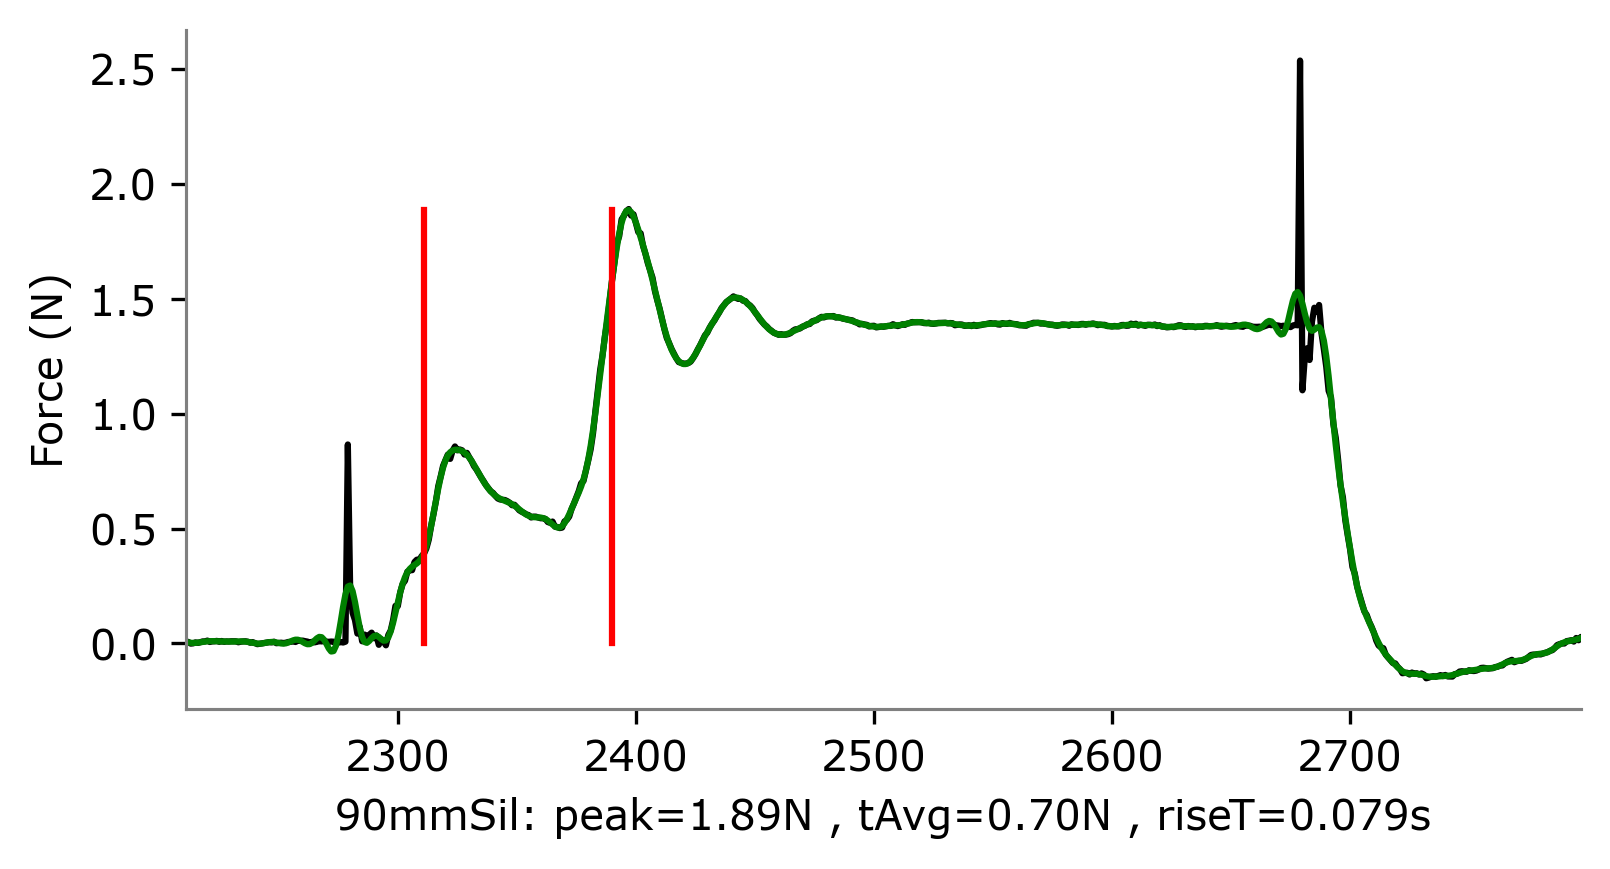

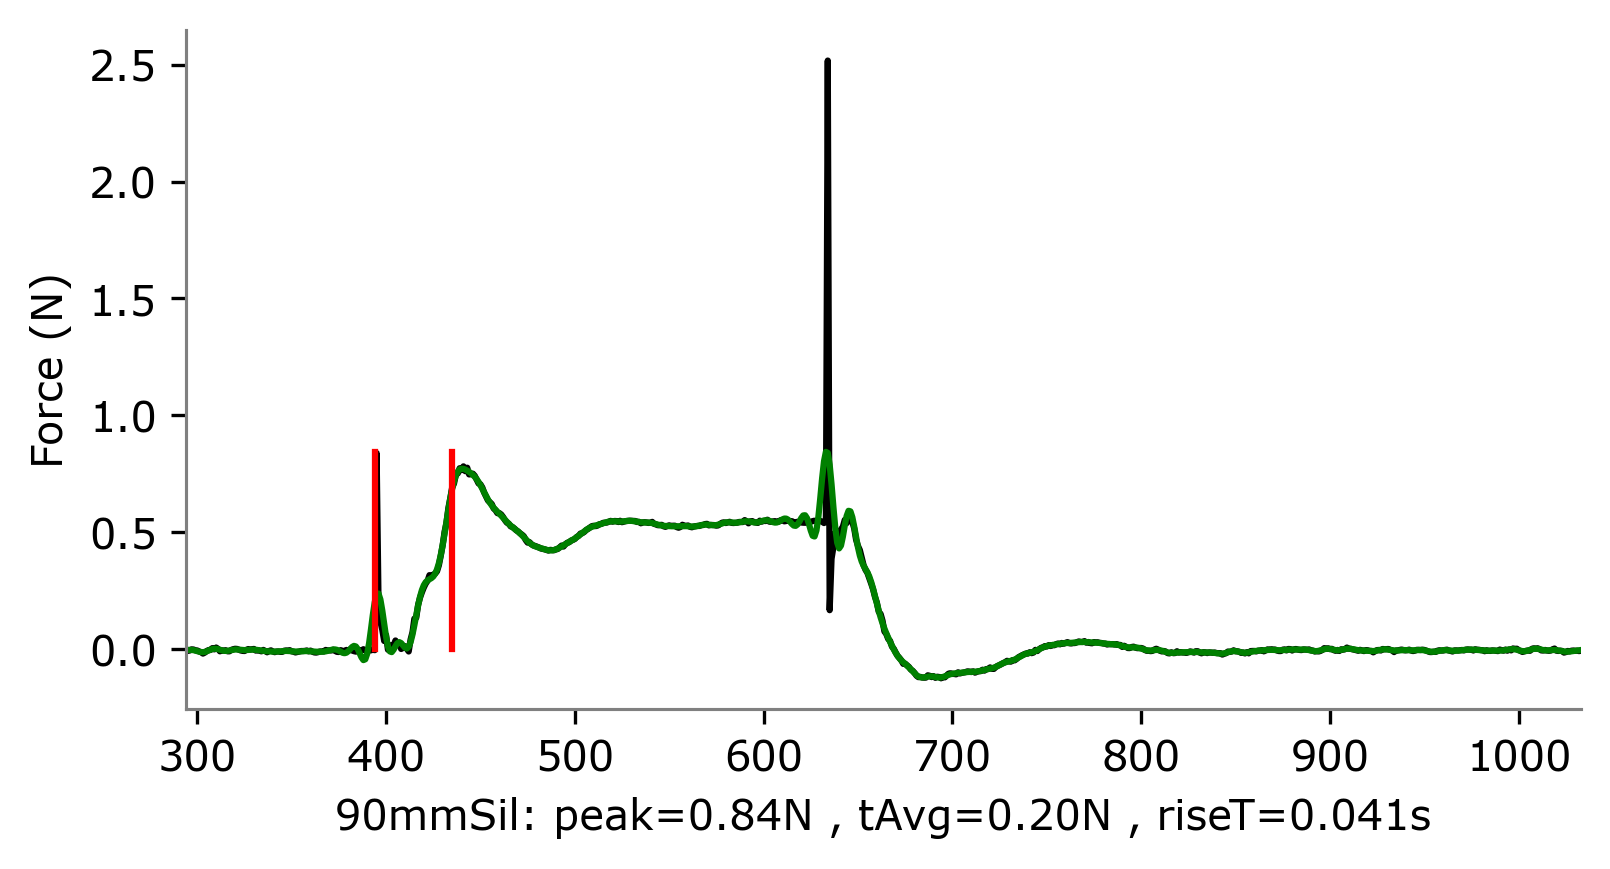

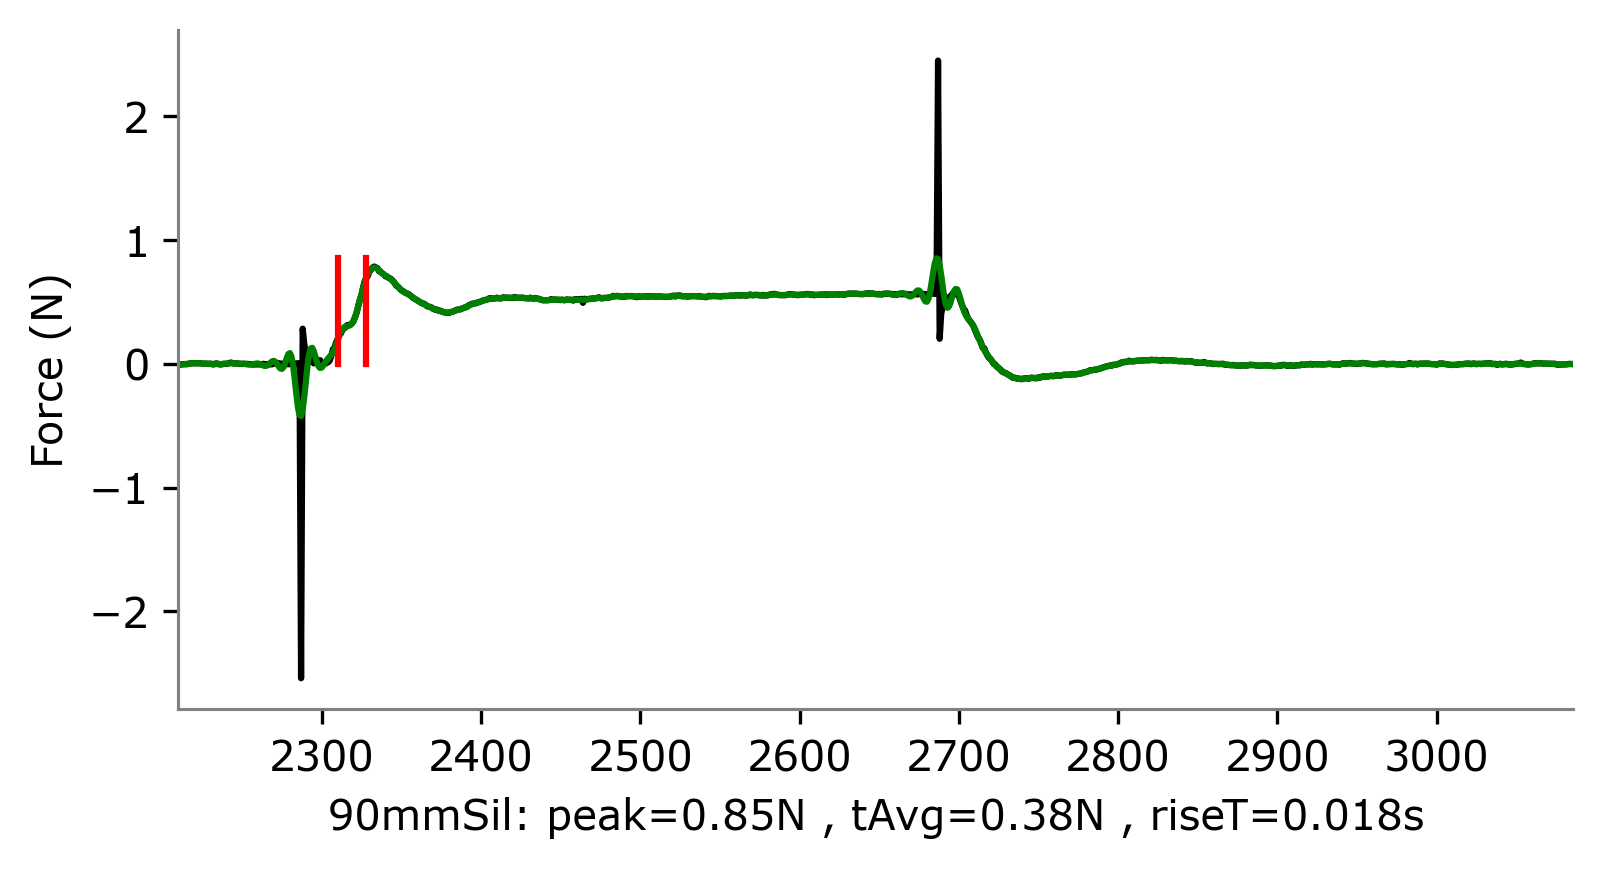

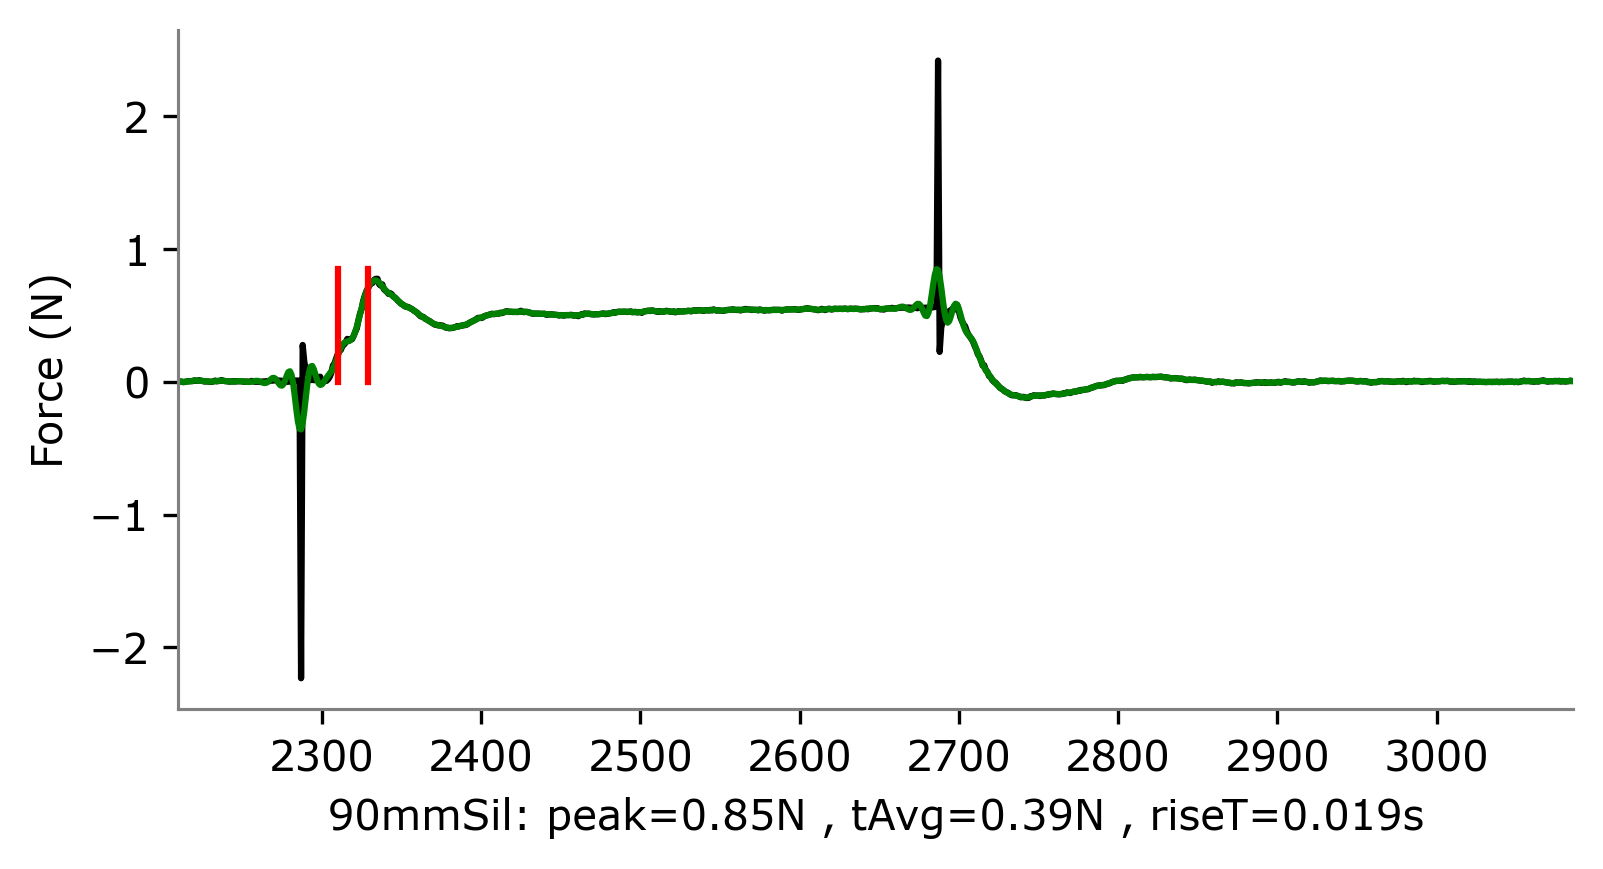

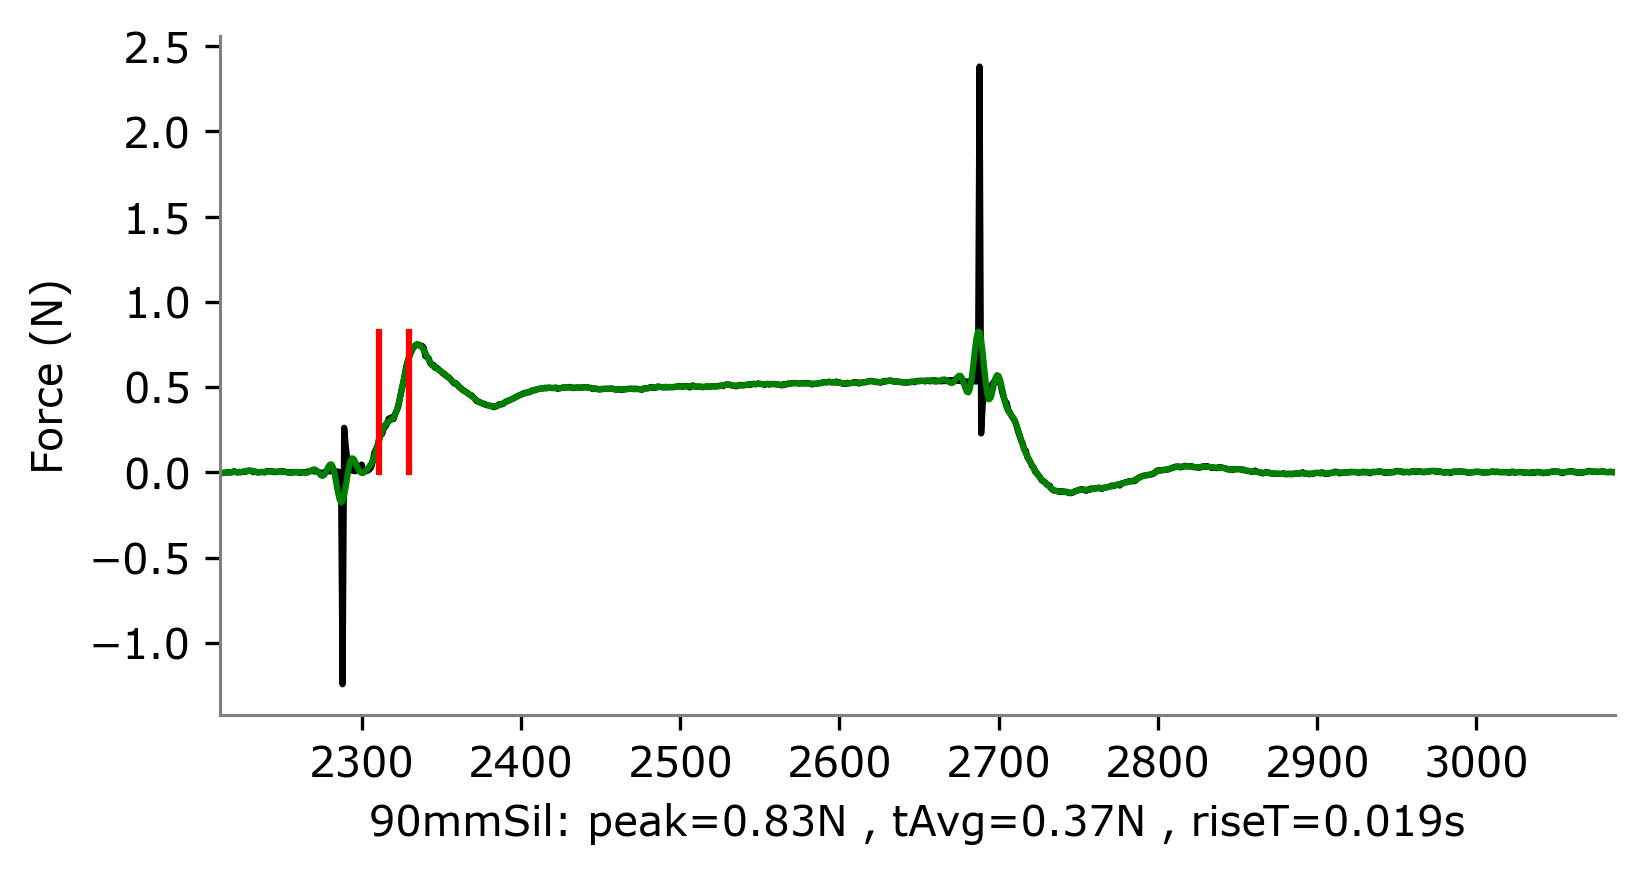

Label  TubeLength_mm                                          PeakForce  \
0    100mm          100.0  [6.9421153898632, 8.523902316205493, 7.7760448...   
1     60mm           60.0  [4.54360804173448, 3.853948044712615, 3.877609...   
2     70mm           70.0  [3.9322990883340996, 3.6047731712111326, 3.277...   
3     80mm           80.0  [4.344221907233269, 5.055913404575484, 5.19120...   
4  90mmSil           90.0  [2.2017986317624407, 2.311476139886989, 2.1314...   

                                            AvgForce  \
0  [2.1549077323465826, 2.9328368645467746, 3.008...   
1  [2.0598979514367857, 1.6141939312830011, 2.021...   
2  [2.221737820334393, 2.2187254168915804, 2.1048...   
3  [1.7122957950587463, 2.3473868948528676, 2.787...   
4  [0.9864932831206076, 1.012273826280951, 0.9411...   

                                          TriseForce  \
0  [0.012, 0.01, 0.011, 0.011, 0.011, 0.011, 0.01...   
1  [0.017, 0.02, 0.009, 0.019, 0.009, 0.018, 0.01...   
2  [0.035, 0.011, 0.01, 0.012, 0.014, 0.005, 0.04...   
3  [0.02, 0.012, 0.011, 0.012, 0.013, 0.011, 0.01...   
4  [0.035, 0.031, 0.036, 0.041, 0.053, 0.079, 0.0...   

                                                Data  
0  [[0.0, -0.0018075057164130132, -0.003485707232...  
1  [[0.0, 0.0018020093947222066, 0.00341607223102...  
2  [[0.0, 0.0009042542373730589, 0.00177176364751...  
3  [[0.0, 0.0008388179089448694, 0.00137887530415...  
4  [[0.0, 0.00019628754304532037, 0.0006727662232...

In [4]:
'''Feature extraction from signals: peak value, time-averaged value, rising time'''

labels = nanoData.Label.unique()
print(labels)

dataFeature = []

for aLabel in labels:
    selectedData = nanoData.loc[(nanoData['Label'] == aLabel)]

    peakF = []
    tavgF = []
    triseF = []
    smF = []
        
    for index, row in selectedData.iterrows():
        for aSignal in row["Data"]:
            smData = lowpassSmooth(-aSignal[:,2], cutFreqRatio = (100/Fs), order = 8) # Use the z-axis force measurement 
            smData = smData - smData[0]

            maxValue = np.max(smData)
            onsetInd = np.argwhere(smData[50:] > 0.20 * maxValue)[0][0]+50 # When signal reach 10% of its peak (onset)

            PP80Ind = np.argwhere(smData[50:] > 0.80 * maxValue)[0][0]+50 # When signal reach 90% of its peak

            peakInd = np.argmax(smData)
            peakValue = np.max(smData) # -aSignal[:,2]

            riseTime = (PP80Ind - onsetInd)/Fs
            
            tavgValue = np.mean(smData[onsetInd:PP80Ind]) # -aSignal[onsetInd:PP80Ind,2]
            
            peakF.append(peakValue)
            tavgF.append(tavgValue)
            triseF.append(riseTime)
            smF.append(smData)
            
            ax1,_ = aPlot(dpi=300)
            ax1.plot(-aSignal[:,2]+aSignal[0,2], 'k')
            ax1.plot(smData, 'g')
            ax1.plot([onsetInd, onsetInd], [0, maxValue], '-r')
            ax1.plot([PP80Ind, PP80Ind], [0, maxValue], '-r')
            ax1.set_xlabel("%s: peak=%.2fN , tAvg=%.2fN , riseT=%.3fs" % (aLabel, peakValue,tavgValue,riseTime))
            ax1.set_xlim([onsetInd-100, peakInd + 400])
            ax1.set_ylabel("Force (N)")
            plt.show()
            
    dataFeature.append([aLabel, row["TubeLength_mm"], peakF, tavgF, triseF, smF])

dataFeature = pd.DataFrame(dataFeature, columns = ['Label', 'TubeLength_mm','PeakForce','AvgForce','TriseForce','Data'])  

dataFeature.head(10)

In [12]:
'''
Functions for Visualizing the Errorbar
'''
def computeErrorbar1Var(dframe, xColName, xColList, zColName):
    dMean = []
    dSTD = []
    
    for x in xColList:
        selectInd = (dframe[xColName] == x)

        compValue = getDataArray(dframe, selectInd, zColName, toFlat=True)  

        valueMean, valueSTD = getMeanSTD(compValue)

        dMean.append(valueMean)
        dSTD.append(valueSTD)
    
    dMean = np.array(dMean)
    dSTD = np.array(dSTD)
    
    return dMean, dSTD

labels = ['60mm', '70mm', '80mm', '90mmSil', '100mm']

meanPeakF, stdPeakF = computeErrorbar1Var(dataFeature, 'Label', labels,'PeakForce')   
meanAvgF, stdAvgF = computeErrorbar1Var(dataFeature, 'Label', labels, 'AvgForce')    
meanTriseF, stdTriseF = computeErrorbar1Var(dataFeature, 'Label', labels, 'TriseForce')
 
# fig1, ax1 = plt.subplots(dpi=300, figsize=figSize_inch)

# colors = sns.color_palette('Set2', n_colors=2)
# x = np.arange(len(labels))    
# style = '.'
# xLabel = 'Actuator'
# yLabelStr = ['Peak Force', 'Time Avg. Force']
# zLabel = 'Force (N)'

# pltHandles = []
# pltHandles.append(ax1.plot(x-0.02, meanPeakF, style, c=colors[0])[0])    
# ax1.errorbar(x-0.02, meanPeakF, yerr=stdPeakF, fmt='none', ecolor=colors[0], capsize=0)

# pltHandles.append(ax1.plot(x+0.02, meanAvgF, style, c=colors[1])[0])    
# ax1.errorbar(x+0.02, meanAvgF, yerr=stdAvgF, fmt='none', ecolor=colors[1], capsize=0)

# # pltHandles.append(ax1.plot(x, meanTriseF, style, c=colors[2])[0])    
# # ax1.errorbar(x, meanTriseF, yerr=stdTriseF, fmt='none', ecolor=colors[2], capsize=0)  
    
# ax1.set_xlabel(xLabel)
# ax1.set_xticklabels(labels, rotation=20);
# ax1.set_xticks(x);
# ax1.set_ylabel(zLabel, color='k')
# ax1.tick_params(axis='y', labelcolor='k')
# ax1.spines['bottom'].set_color('k')
# ax1.spines['top'].set_color('k') 
# ax1.spines['right'].set_color('k')
# ax1.spines['left'].set_color('k')
# ax1.legend(handles=(pltHandles), labels=(yLabelStr), frameon=False, bbox_to_anchor=(1.02, 1.0), loc='upper left');


0     MLSiCpBare60mm
1     MLSiCpBare70mm
2     MLSiCpBare80mm
3      MLSiCpIns90mm
4    MLSiCpBare100mm
Name: CondiName, dtype: object
[25768.20728226 26086.41509046 26340.8789632  18531.7664683
 23280.50643861]


C:\Program Files\Python36\lib\site-packages\ipykernel_launcher.py:32: UserWarning: FixedFormatter should only be used together with FixedLocator


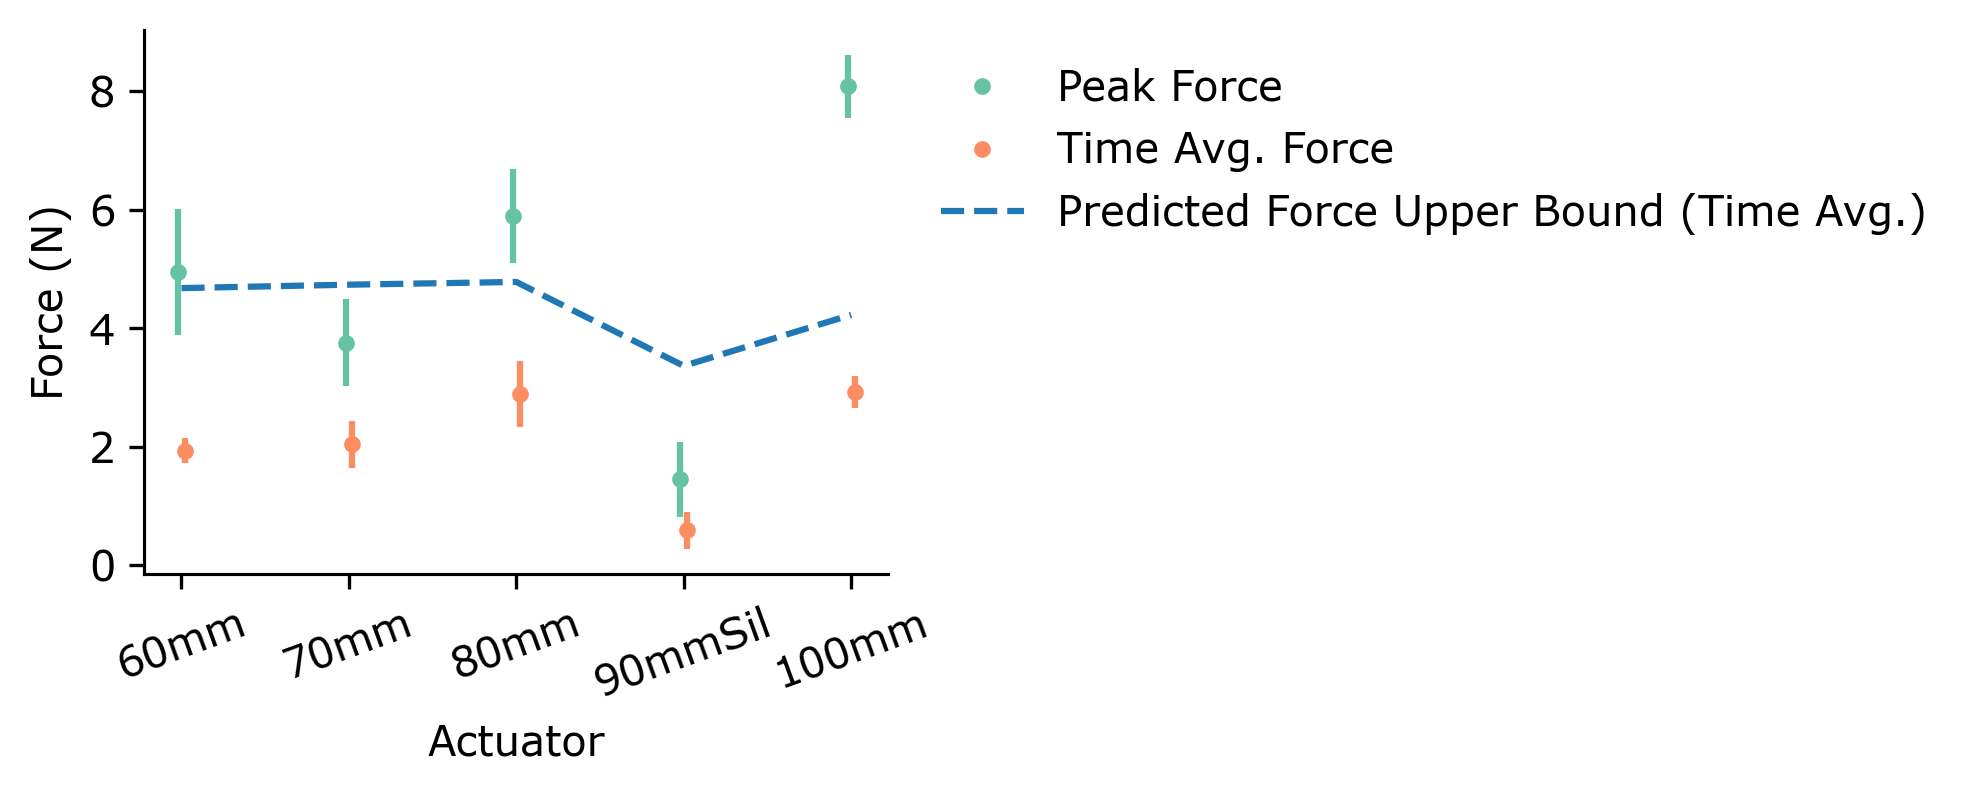

In [18]:
''' Compare biotac measurement against the energy model prediction - cTime 0.4sec'''
simData = pd.read_csv("./data/EnModelResult0816.csv") # Data from model simulation
# simData = simData[7:] # Keep only relevant data

simPFull = np.array(simData['PFull_Pa'].values, dtype=np.float64)
print(simData['CondiName']);print(simPFull);

''' Convert pressure prediction to force assuming a contact area the same as the tip surface '''
tipRadius = 7.6 # (mm) Radius of the actuator tip 
tipAreaMeter = np.pi * (tipRadius*1e-3)**2
simForce = simPFull * tipAreaMeter



fig1, ax1 = plt.subplots(dpi=300, figsize=figSize_inch)

colors = sns.color_palette('Set2', n_colors=2)
x = np.arange(len(labels))    
style = '.'
xLabel = 'Actuator'
yLabelStr = ['Peak Force', 'Time Avg. Force', 'Predicted Force Upper Bound (Time Avg.)']
zLabel = 'Force (N)'

pltHandles = []
pltHandles.append(ax1.plot(x-0.02, meanPeakF, style, c=colors[0])[0])    
ax1.errorbar(x-0.02, meanPeakF, yerr=stdPeakF, fmt='none', ecolor=colors[0], capsize=0)

pltHandles.append(ax1.plot(x+0.02, meanAvgF, style, c=colors[1])[0])    
ax1.errorbar(x+0.02, meanAvgF, yerr=stdAvgF, fmt='none', ecolor=colors[1], capsize=0)
    
ax1.set_xlabel(xLabel)
ax1.set_xticklabels(labels, rotation=20);
ax1.set_xticks(x);
ax1.set_ylabel(zLabel, color='k')
ax1.tick_params(axis='y', labelcolor='k')
ax1.spines['bottom'].set_color('k')
ax1.spines['top'].set_color('k') 
ax1.spines['right'].set_color('k')
ax1.spines['left'].set_color('k')

pltHandles.append(ax1.plot(x, simForce, '--', color='tab:blue')[0])

ax1.legend(handles=(pltHandles), labels=(yLabelStr), frameon=False, bbox_to_anchor=(1.02, 1.0), loc='upper left');

